In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import math
import random

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import set_random_seed
from tensorflow.python.client import device_lib
import datetime as dt
import os
# from pandas._testing import assert_frame_equal

Using TensorFlow backend.


In [3]:
tf.__version__

'1.13.1'

In [31]:
kfolds = 5

saved_model_dir = "saved_model/corss_val/general_model/hp_seq_len/"
if not os.path.exists(saved_model_dir):
    os.makedirs(saved_model_dir)
tf.reset_default_graph()

saving_dir = "cross_validation/general_model/hp_seq_len/"
if not os.path.exists(saving_dir):
    os.makedirs(saving_dir)

# fix random seed for reproducibility
np.random.seed(7)
set_random_seed(7)

NUM_LAYERS = 1
HIDDEN_SIZE = 64
TRAIN_EPOCHS = 300

print_iter = 50
TRAIN_BATCHES = 2048

In [32]:
seq_lengths_to_evaluate = [2,3,4,5,6,7,8,9,10,11,12]

saving_dirs = []
for s in seq_lengths_to_evaluate:
    cur_saving_dir = os.path.join(saving_dir, str(s))
    print(cur_saving_dir)
    saving_dirs.append(cur_saving_dir)
    if not os.path.exists(cur_saving_dir):
        os.makedirs(cur_saving_dir)

cross_validation/general_model/hp_seq_len/2
cross_validation/general_model/hp_seq_len/3
cross_validation/general_model/hp_seq_len/4
cross_validation/general_model/hp_seq_len/5
cross_validation/general_model/hp_seq_len/6
cross_validation/general_model/hp_seq_len/7
cross_validation/general_model/hp_seq_len/8
cross_validation/general_model/hp_seq_len/9
cross_validation/general_model/hp_seq_len/10
cross_validation/general_model/hp_seq_len/11
cross_validation/general_model/hp_seq_len/12


In [33]:
saving_dirs

['cross_validation/general_model/hp_seq_len/2',
 'cross_validation/general_model/hp_seq_len/3',
 'cross_validation/general_model/hp_seq_len/4',
 'cross_validation/general_model/hp_seq_len/5',
 'cross_validation/general_model/hp_seq_len/6',
 'cross_validation/general_model/hp_seq_len/7',
 'cross_validation/general_model/hp_seq_len/8',
 'cross_validation/general_model/hp_seq_len/9',
 'cross_validation/general_model/hp_seq_len/10',
 'cross_validation/general_model/hp_seq_len/11',
 'cross_validation/general_model/hp_seq_len/12']

# results from py script

In [87]:
# Train results for seq=2 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/2\\fold0/----average train accuracy:0.69743776---- highest train accuracy:0.70319057',
#  'saved_model/corss_val/general_model/hp_seq_len/2\\fold1/----average train accuracy:0.6968444---- highest train accuracy:0.7018483',
#  'saved_model/corss_val/general_model/hp_seq_len/2\\fold2/----average train accuracy:0.69579965---- highest train accuracy:0.7007949',
#  'saved_model/corss_val/general_model/hp_seq_len/2\\fold3/----average train accuracy:0.69462276---- highest train accuracy:0.69909346',
#  'saved_model/corss_val/general_model/hp_seq_len/2\\fold4/----average train accuracy:0.7064296---- highest train accuracy:0.7098457']


test_seq_2=['saved_model/corss_val/general_model/hp_seq_len/2\\fold0/----average test accuracy:0.70266396---- highest test accuracy:0.7265625',
 'saved_model/corss_val/general_model/hp_seq_len/2\\fold1/----average test accuracy:0.70789534---- highest test accuracy:0.7246094',
 'saved_model/corss_val/general_model/hp_seq_len/2\\fold2/----average test accuracy:0.70961267---- highest test accuracy:0.71875',
 'saved_model/corss_val/general_model/hp_seq_len/2\\fold3/----average test accuracy:0.7126808---- highest test accuracy:0.7265625',
 'saved_model/corss_val/general_model/hp_seq_len/2\\fold4/----average test accuracy:0.6702833---- highest test accuracy:0.72527474']

# Train results for seq=3 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/3\\fold0/----average train accuracy:0.7186975---- highest train accuracy:0.7270199',
#  'saved_model/corss_val/general_model/hp_seq_len/3\\fold1/----average train accuracy:0.71829903---- highest train accuracy:0.7276714',
#  'saved_model/corss_val/general_model/hp_seq_len/3\\fold2/----average train accuracy:0.7188148---- highest train accuracy:0.726138',
#  'saved_model/corss_val/general_model/hp_seq_len/3\\fold3/----average train accuracy:0.71595603---- highest train accuracy:0.72585255',
#  'saved_model/corss_val/general_model/hp_seq_len/3\\fold4/----average train accuracy:0.72719127---- highest train accuracy:0.7359394']


test_seq_3=['saved_model/corss_val/general_model/hp_seq_len/3\\fold0/----average test accuracy:0.7215673---- highest test accuracy:0.7319336',
 'saved_model/corss_val/general_model/hp_seq_len/3\\fold1/----average test accuracy:0.72080886---- highest test accuracy:0.7441406',
 'saved_model/corss_val/general_model/hp_seq_len/3\\fold2/----average test accuracy:0.72347707---- highest test accuracy:0.73828125',
 'saved_model/corss_val/general_model/hp_seq_len/3\\fold3/----average test accuracy:0.72951066---- highest test accuracy:0.7524414',
 'saved_model/corss_val/general_model/hp_seq_len/3\\fold4/----average test accuracy:0.685962---- highest test accuracy:0.7026367']


# Train results for seq=4 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/4\\fold0/----average train accuracy:0.7343996---- highest train accuracy:0.7466801',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold1/----average train accuracy:0.73457426---- highest train accuracy:0.74807006',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold2/----average train accuracy:0.7334012---- highest train accuracy:0.7467825',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold3/----average train accuracy:0.73097575---- highest train accuracy:0.7449482',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold4/----average train accuracy:0.74191767---- highest train accuracy:0.7547348']


# test_seq_4=['saved_model/corss_val/general_model/hp_seq_len/4\\fold0/----average test accuracy:0.7284037---- highest test accuracy:0.7495117',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold1/----average test accuracy:0.7292933---- highest test accuracy:0.7504883',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold2/----average test accuracy:0.72721666---- highest test accuracy:0.7529297',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold3/----average test accuracy:0.7387695---- highest test accuracy:0.7602539',
#  'saved_model/corss_val/general_model/hp_seq_len/4\\fold4/----average test accuracy:0.69093317---- highest test accuracy:0.70751953']

# older CV model for seq=4
test_seq_4=['saved_model/corss_val/general_model/fold0/----average test accuracy:0.72938126---- highest test accuracy:0.7518657',
 'saved_model/corss_val/general_model/fold1/----average test accuracy:0.72858906---- highest test accuracy:0.75',
 'saved_model/corss_val/general_model/fold2/----average test accuracy:0.72914827---- highest test accuracy:0.75439453',
 'saved_model/corss_val/general_model/fold3/----average test accuracy:0.7381668---- highest test accuracy:0.74560547',
 'saved_model/corss_val/general_model/fold4/----average test accuracy:0.6931991---- highest test accuracy:0.7073892']

# Train results for seq=5 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/5\\fold0/----average train accuracy:0.74116105---- highest train accuracy:0.7572236',
#  'saved_model/corss_val/general_model/hp_seq_len/5\\fold1/----average train accuracy:0.7419613---- highest train accuracy:0.7601643', 
#  'saved_model/corss_val/general_model/hp_seq_len/5\\fold2/----average train accuracy:0.7409074---- highest train accuracy:0.75949925',
#  'saved_model/corss_val/general_model/hp_seq_len/5\\fold3/----average train accuracy:0.73863983---- highest train accuracy:0.75660086',
#  'saved_model/corss_val/general_model/hp_seq_len/5\\fold4/----average train accuracy:0.7514091---- highest train accuracy:0.76927805']


test_seq_5=['saved_model/corss_val/general_model/hp_seq_len/5\\fold0/----average test accuracy:0.73164874---- highest test accuracy:0.75341797',
 'saved_model/corss_val/general_model/hp_seq_len/5\\fold1/----average test accuracy:0.7266043---- highest test accuracy:0.73779297',
 'saved_model/corss_val/general_model/hp_seq_len/5\\fold2/----average test accuracy:0.7294124---- highest test accuracy:0.7475586', 
 'saved_model/corss_val/general_model/hp_seq_len/5\\fold3/----average test accuracy:0.73751885---- highest test accuracy:0.7519531',
 'saved_model/corss_val/general_model/hp_seq_len/5\\fold4/----average test accuracy:0.69434---- highest test accuracy:0.7138672']


# Train results for seq=6 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/6\\fold0/----average train accuracy:0.75037974---- highest train accuracy:0.76979005',
#  'saved_model/corss_val/general_model/hp_seq_len/6\\fold1/----average train accuracy:0.75209045---- highest train accuracy:0.7719154', 'saved_model/corss_val/general_model/hp_seq_len/6\\fold2/----average train accuracy:0.7478511---- highest train accuracy:0.7678787', 'saved_model/corss_val/general_model/hp_seq_len/6\\fold3/----average train accuracy:0.74656516---- highest train accuracy:0.76814365', 'saved_model/corss_val/general_model/hp_seq_len/6\\fold4/----average train accuracy:0.757038---- highest train accuracy:0.77707523']


test_seq_6 = ['saved_model/corss_val/general_model/hp_seq_len/6\\fold0/----average test accuracy:0.7317986---- highest test accuracy:0.7470703',
 'saved_model/corss_val/general_model/hp_seq_len/6\\fold1/----average test accuracy:0.728501---- highest test accuracy:0.7504883',
 'saved_model/corss_val/general_model/hp_seq_len/6\\fold2/----average test accuracy:0.7357544---- highest test accuracy:0.7741935',
 'saved_model/corss_val/general_model/hp_seq_len/6\\fold3/----average test accuracy:0.7461369---- highest test accuracy:0.75634766',
 'saved_model/corss_val/general_model/hp_seq_len/6\\fold4/----average test accuracy:0.69994736---- highest test accuracy:0.72021484']


# Train results for seq=7 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/7\\fold0/----average train accuracy:0.7522943---- highest train accuracy:0.7737942',
#  'saved_model/corss_val/general_model/hp_seq_len/7\\fold1/----average train accuracy:0.75565237---- highest train accuracy:0.7769185', 
#  'saved_model/corss_val/general_model/hp_seq_len/7\\fold2/----average train accuracy:0.75333977---- highest train accuracy:0.7765465',
#  'saved_model/corss_val/general_model/hp_seq_len/7\\fold3/----average train accuracy:0.75095135---- highest train accuracy:0.7730789',
#  'saved_model/corss_val/general_model/hp_seq_len/7\\fold4/----average train accuracy:0.7621781---- highest train accuracy:0.783765']


test_seq_7 =['saved_model/corss_val/general_model/hp_seq_len/7\\fold0/----average test accuracy:0.7358662---- highest test accuracy:0.74902344',
 'saved_model/corss_val/general_model/hp_seq_len/7\\fold1/----average test accuracy:0.72893196---- highest test accuracy:0.74365234',
 'saved_model/corss_val/general_model/hp_seq_len/7\\fold2/----average test accuracy:0.7350679---- highest test accuracy:0.75341797',
 'saved_model/corss_val/general_model/hp_seq_len/7\\fold3/----average test accuracy:0.7492309---- highest test accuracy:0.76123047', 
 'saved_model/corss_val/general_model/hp_seq_len/7\\fold4/----average test accuracy:0.6973817---- highest test accuracy:0.71728516']


# Train results for seq=8 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/8\\fold0/----average train accuracy:0.75805044---- highest train accuracy:0.77919793', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold1/----average train accuracy:0.75813943---- highest train accuracy:0.78034276', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold2/----average train accuracy:0.75631887---- highest train accuracy:0.7791558', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold3/----average train accuracy:0.75399435---- highest train accuracy:0.77680844', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold4/----average train accuracy:0.76602054---- highest train accuracy:0.78694063']


test_seq_8=['saved_model/corss_val/general_model/hp_seq_len/8\\fold0/----average test accuracy:0.738746---- highest test accuracy:0.75097656', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold1/----average test accuracy:0.73174924---- highest test accuracy:0.74609375', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold2/----average test accuracy:0.7376924---- highest test accuracy:0.7647059', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold3/----average test accuracy:0.75172704---- highest test accuracy:0.76953125', 'saved_model/corss_val/general_model/hp_seq_len/8\\fold4/----average test accuracy:0.7006884---- highest test accuracy:0.71484375']


# Train results for seq=9 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/9\\fold0/----average train accuracy:0.76169103---- highest train accuracy:0.7840254',
#  'saved_model/corss_val/general_model/hp_seq_len/9\\fold1/----average train accuracy:0.7538542---- highest train accuracy:0.7769306',
#  'saved_model/corss_val/general_model/hp_seq_len/9\\fold2/----average train accuracy:0.75991976---- highest train accuracy:0.7841459',
#  'saved_model/corss_val/general_model/hp_seq_len/9\\fold3/----average train accuracy:0.7540679---- highest train accuracy:0.7770223', 
#  'saved_model/corss_val/general_model/hp_seq_len/9\\fold4/----average train accuracy:0.76865643---- highest train accuracy:0.7912821']


test_seq_9=['saved_model/corss_val/general_model/hp_seq_len/9\\fold0/----average test accuracy:0.73685265---- highest test accuracy:0.75490195',
 'saved_model/corss_val/general_model/hp_seq_len/9\\fold1/----average test accuracy:0.7458005---- highest test accuracy:0.8518519', 
 'saved_model/corss_val/general_model/hp_seq_len/9\\fold2/----average test accuracy:0.7371143---- highest test accuracy:0.7470703', 
 'saved_model/corss_val/general_model/hp_seq_len/9\\fold3/----average test accuracy:0.74993384---- highest test accuracy:0.76953125',
 'saved_model/corss_val/general_model/hp_seq_len/9\\fold4/----average test accuracy:0.7048274---- highest test accuracy:0.73209304']


# Train results for seq=10 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/10\\fold0/----average train accuracy:0.7596463---- highest train accuracy:0.7809559',
#  'saved_model/corss_val/general_model/hp_seq_len/10\\fold1/----average train accuracy:0.7633804---- highest train accuracy:0.7860405',
#  'saved_model/corss_val/general_model/hp_seq_len/10\\fold2/----average train accuracy:0.75945324---- highest train accuracy:0.77971345',
#  'saved_model/corss_val/general_model/hp_seq_len/10\\fold3/----average train accuracy:0.75683284---- highest train accuracy:0.78232044',
#  'saved_model/corss_val/general_model/hp_seq_len/10\\fold4/----average train accuracy:0.76879555---- highest train accuracy:0.79256886']



test_seq_10=['saved_model/corss_val/general_model/hp_seq_len/10\\fold0/----average test accuracy:0.7379746---- highest test accuracy:0.7583008',
 'saved_model/corss_val/general_model/hp_seq_len/10\\fold1/----average test accuracy:0.7361965---- highest test accuracy:0.75',
 'saved_model/corss_val/general_model/hp_seq_len/10\\fold2/----average test accuracy:0.7373353---- highest test accuracy:0.76171875',
 'saved_model/corss_val/general_model/hp_seq_len/10\\fold3/----average test accuracy:0.7539257---- highest test accuracy:0.7663657',
 'saved_model/corss_val/general_model/hp_seq_len/10\\fold4/----average test accuracy:0.71008486---- highest test accuracy:0.729638']


# Train results for seq=11 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/11\\fold0/----average train accuracy:0.7628429---- highest train accuracy:0.7867328',
#  'saved_model/corss_val/general_model/hp_seq_len/11\\fold1/----average train accuracy:0.7640018---- highest train accuracy:0.7850241',
#  'saved_model/corss_val/general_model/hp_seq_len/11\\fold2/----average train accuracy:0.7617712---- highest train accuracy:0.7829552',
#  'saved_model/corss_val/general_model/hp_seq_len/11\\fold3/----average train accuracy:0.76002616---- highest train accuracy:0.7833906',
#  'saved_model/corss_val/general_model/hp_seq_len/11\\fold4/----average train accuracy:0.770157---- highest train accuracy:0.7919311']


test_seq_11=['saved_model/corss_val/general_model/hp_seq_len/11\\fold0/----average test accuracy:0.73625046---- highest test accuracy:0.7578125',
 'saved_model/corss_val/general_model/hp_seq_len/11\\fold1/----average test accuracy:0.73046845---- highest test accuracy:0.7573242',
 'saved_model/corss_val/general_model/hp_seq_len/11\\fold2/----average test accuracy:0.73876315---- highest test accuracy:0.7558594',
 'saved_model/corss_val/general_model/hp_seq_len/11\\fold3/----average test accuracy:0.7498242---- highest test accuracy:0.76220703',
 'saved_model/corss_val/general_model/hp_seq_len/11\\fold4/----average test accuracy:0.7043658---- highest test accuracy:0.72021484']

# Train results for seq=12 for all folds:
# ['saved_model/corss_val/general_model/hp_seq_len/12\\fold0/----average train accuracy:0.7640528---- highest train accuracy:0.788933',
#  'saved_model/corss_val/general_model/hp_seq_len/12\\fold1/----average train accuracy:0.76576406---- highest train accuracy:0.7905345',
#  'saved_model/corss_val/general_model/hp_seq_len/12\\fold2/----average train accuracy:0.76543844---- highest train accuracy:0.790254',
#  'saved_model/corss_val/general_model/hp_seq_len/12\\fold3/----average train accuracy:0.75844866---- highest train accuracy:0.78364414',
#  'saved_model/corss_val/general_model/hp_seq_len/12\\fold4/----average train accuracy:0.76989377---- highest train accuracy:0.79227644']

test_seq_12 = ['saved_model/corss_val/general_model/hp_seq_len/12\\fold0/----average test accuracy:0.73803675---- highest test accuracy:0.7636719',
 'saved_model/corss_val/general_model/hp_seq_len/12\\fold1/----average test accuracy:0.7320703---- highest test accuracy:0.74853516',
 'saved_model/corss_val/general_model/hp_seq_len/12\\fold2/----average test accuracy:0.73679644---- highest test accuracy:0.7519531',
 'saved_model/corss_val/general_model/hp_seq_len/12\\fold3/----average test accuracy:0.7538846---- highest test accuracy:0.76660156',
 'saved_model/corss_val/general_model/hp_seq_len/12\\fold4/----average test accuracy:0.7113206---- highest test accuracy:0.7549801']


In [88]:
def annoying_str_to_float(one_fold_res_str):
    tmp = one_fold_res_str[one_fold_res_str.find("average test accuracy:"):]
    tmp = tmp[:tmp.find("-")]
    res = float(tmp[tmp.find(":")+1:])
    return res

In [89]:
def get_seq_mean(all_folds_res):
    test_res = []
    for fold_res in all_folds_res:
        test_res.append(annoying_str_to_float(fold_res))
    return np.mean(test_res)

In [90]:
all_seqs = [test_seq_2,test_seq_3,test_seq_4,test_seq_5,test_seq_6,test_seq_7,test_seq_8,test_seq_9,test_seq_10,test_seq_11,test_seq_12]

In [91]:
means = []
for seq in all_seqs:
    means.append(get_seq_mean(seq))

In [92]:
means

[0.7006272139999999,
 0.716265178,
 0.723696898,
 0.7239048579999999,
 0.7284276519999999,
 0.729295732,
 0.7321206160000001,
 0.7349057379999999,
 0.7351033920000001,
 0.731934412,
 0.7344217380000001]

In [96]:
{i:j for i,j in zip(seq_lengths_to_evaluate, means)}

{2: 0.7006272139999999,
 3: 0.716265178,
 4: 0.723696898,
 5: 0.7239048579999999,
 6: 0.7284276519999999,
 7: 0.729295732,
 8: 0.7321206160000001,
 9: 0.7349057379999999,
 10: 0.7351033920000001,
 11: 0.731934412,
 12: 0.7344217380000001}

In [104]:
seq_lengths_to_evaluate

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [107]:
np.arange(2,12,0.5)

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
        7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5])

Text(0, 0.5, 'accuracy')

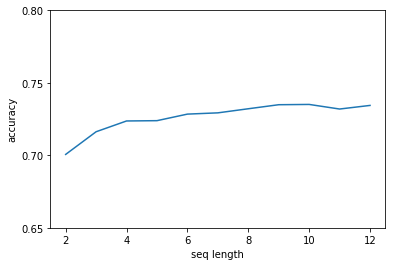

In [135]:
plt.figsize=(20,12)
plt.plot(seq_lengths_to_evaluate, np.array(means))
plt.yticks(np.arange(0.65, 0.8, step=0.05))
plt.xlabel("seq length")
plt.ylabel("accuracy")

In [17]:
saving_models = []
for s in seq_lengths_to_evaluate:
    cur_saving_dir = os.path.join(saved_model_dir, str(s))
    print(cur_saving_dir)
    saving_models.append(cur_saving_dir)
    if not os.path.exists(cur_saving_dir):
        os.makedirs(cur_saving_dir)

saved_model/corss_val/general_model/hp_seq_len/2
saved_model/corss_val/general_model/hp_seq_len/3
saved_model/corss_val/general_model/hp_seq_len/4
saved_model/corss_val/general_model/hp_seq_len/5
saved_model/corss_val/general_model/hp_seq_len/6
saved_model/corss_val/general_model/hp_seq_len/7
saved_model/corss_val/general_model/hp_seq_len/8
saved_model/corss_val/general_model/hp_seq_len/9
saved_model/corss_val/general_model/hp_seq_len/10
saved_model/corss_val/general_model/hp_seq_len/11
saved_model/corss_val/general_model/hp_seq_len/12


In [5]:
with open('pd_list_full_with_rewards_original_seq4.pkl', 'rb') as f:
    pd_list = pickle.load(f)

In [6]:
pd_list[0]

,user,choice,reward,time,payoff_structure,reward_1,reward_2,reward_3,reward_4,orig_choice_num,prev_choice,prev_reward
1,1,2,90,1076.0,2,90,90,46,18,1,1,84
2,1,3,53,612.0,2,80,84,53,28,2,2,90
3,1,4,24,742.0,2,87,81,50,24,3,3,53
4,1,2,92,927.0,2,86,92,61,28,4,4,24
5,1,2,78,966.0,2,75,78,55,30,5,2,92
6,1,1,71,637.0,2,71,78,50,34,6,2,78
7,1,1,75,644.0,2,75,83,58,43,7,1,71
8,1,2,80,640.0,2,77,80,52,30,8,1,75
9,1,2,80,1161.0,2,70,80,43,28,9,2,80
10,1,2,91,953.0,2,65,91,49,29,10,2,80


In [7]:

# TRAIN_NUM_STEPS = 4
# seq_length = 4

In [8]:
# use previous seq of 4's to be consistent  
with open('huge_pd_shuffled_with_rewards_original_seq4_SHUFFLED.pkl', 'rb') as f:
    huge_pd = pickle.load(f)

with open('cross_validation/diff_seq_lengths/all_huge_pd_shuffled_with_rewards_original_seq2_to_seq12_SHUFFLED_LIST.pkl', 'rb') as f:
    huge_pd_hp_list = pickle.load(f)

In [24]:
len(huge_pd.user.unique())

965

In [11]:
# load the kfolded pars
with open('cross_validation/payoff2_train_participants_5fold_list.pkl', 'rb') as f:
    payoff2_train_participants_5fold_list = pickle.load(f)

with open('cross_validation/payoff2_test_participants_5fold_list.pkl', 'rb') as f:
    payoff2_test_participants_5fold_list = pickle.load(f)

with open('cross_validation/payoff3_train_participants_5fold_list.pkl', 'rb') as f:
    payoff3_train_participants_5fold_list = pickle.load(f)

with open('cross_validation/payoff3_test_participants_5fold_list.pkl', 'rb') as f:
    payoff3_test_participants_5fold_list = pickle.load(f)

with open('cross_validation/payoff4_train_participants_5fold_list.pkl', 'rb') as f:
    payoff4_train_participants_5fold_list = pickle.load(f)
    
with open('cross_validation/payoff4_test_participants_5fold_list.pkl', 'rb') as f:
    payoff4_test_participants_5fold_list = pickle.load(f)

In [14]:
def my_kfold_split(huge_pd, kfold_train_payoff2, kfold_train_payoff3, kfold_train_payoff4, kfold_test_payoff2, kfold_test_payoff3, kfold_test_payoff4, k=5):
    """
    gets all the folding (trains and tests pars) and returns (train_data, test_data) in the same amount of folds (if theres 5 folds then 5 train_data etc)
    indices are corresponding ! ([0] in train comes with [0] in test)
    """
    train_data = []
    test_data = []
    for i in range(k):
        train_data.append(huge_pd[(huge_pd['user'].isin(kfold_train_payoff2[i]))|
                                (huge_pd['user'].isin(kfold_train_payoff3[i]))|
                                (huge_pd['user'].isin(kfold_train_payoff4[i]))].copy())
        
        test_data.append(huge_pd[(huge_pd['user'].isin(kfold_test_payoff2[i]))|
                                (huge_pd['user'].isin(kfold_test_payoff3[i]))|
                                (huge_pd['user'].isin(kfold_test_payoff4[i]))].copy())
    return train_data, test_data

In [11]:
cur_data = huge_pd.copy()
cur_data['choice'] = cur_data.choice.apply(lambda x: x - 1)
cur_data['prev_choice'] = cur_data.prev_choice.apply(lambda x: x - 1)

In [12]:
train_data, test_data = my_kfold_split(cur_data, 
                                       payoff2_train_participants_5fold_list,
                                       payoff3_train_participants_5fold_list,
                                       payoff4_train_participants_5fold_list,
                                       payoff2_test_participants_5fold_list,
                                       payoff3_test_participants_5fold_list,
                                       payoff4_test_participants_5fold_list,
                                       )
# sanity checks
assert(train_data[0].shape!=train_data[1].shape)
assert(train_data[0].shape!=train_data[2].shape)
assert(train_data[0].shape!=train_data[3].shape)
assert(train_data[0].shape!=train_data[4].shape)

assert(train_data[1].shape!=train_data[3].shape)
assert(train_data[1].shape!=train_data[4].shape)

assert(train_data[2].shape!=train_data[4].shape)

In [13]:
def get_train_test_data(train_data, test_data, seq_length):
    fold_X_train = []
    fold_y_train = []
    fold_X_test = []
    fold_y_test = []

    for train, test in zip(train_data, test_data):
        X = train.drop(columns=['index', 'choice', 'user', 'time', 'reward', 'payoff_structure', 'reward_1', 'reward_2', 'reward_3', 'reward_4'])
        X_prev = to_categorical(X.prev_choice, dtype='int64')
        y = train.choice
        num_of_classes = len(y.unique())
        y_train = to_categorical(y, dtype='int64')
        new_X = []
        for prev_choice, prev_reward in zip(X_prev, X.prev_reward):
            new_i = np.append(prev_choice, prev_reward)
            new_X.append(new_i)
        X_train = np.array(new_X)

        possible_samples_train = int(X_train.shape[0] / seq_length)
        possible_labels_train = int(y_train.shape[0] / seq_length)


        # reshape X to be [samples, time steps, features]
        X_train = np.reshape(X_train, (possible_samples_train, seq_length, X_train.shape[1]))
        fold_X_train.append(X_train)
        y_cat_train = np.reshape(y_train, (possible_samples_train, seq_length, y_train.shape[1]))
        fold_y_train.append(y_cat_train)

        ########################################################################
        ### TEST ###############################################

        X = test.drop(columns=['index', 'choice', 'user', 'time', 'reward', 'payoff_structure', 'reward_1', 'reward_2', 'reward_3', 'reward_4'])
        X_prev = to_categorical(X.prev_choice, dtype='int64')
        y = test.choice
        num_of_classes = len(y.unique())
        y_test = to_categorical(y, dtype='int64')
        new_X = []
        for prev_choice, prev_reward in zip(X_prev, X.prev_reward):
            new_i = np.append(prev_choice, prev_reward)
            new_X.append(new_i)
        X_test = np.array(new_X)

        possible_labels_test = int(y_test.shape[0] / seq_length)
        possible_samples_test = int(X_test.shape[0] / seq_length)

        X_test = np.reshape(X_test, (possible_samples_test, seq_length, X_test.shape[1]))
        fold_X_test.append(X_test)
        y_cat_test = np.reshape(y_test, (possible_labels_test, seq_length, y_test.shape[1]))
        fold_y_test.append(y_cat_test)

    
    return  fold_X_train, fold_y_train, fold_X_test, fold_y_test

In [9]:
class Model(object):
    def __init__(self,all_x,all_y, is_training, output_size, dropout=1.0, batch_size=TRAIN_BATCHES, return_seqence=False):

        # self.x = tf.placeholder(dtype=tf.int32, shape=[None, 4, 5], name='X_placeholder')
        # self.y = tf.placeholder(dtype=tf.int32, shape=[None, 4], name='Y_placeholder')

        # A dataset from a tensor
        dataset = tf.data.Dataset.from_tensor_slices(all_x)
        # Divide the dataset into batches. Once you reach the last batch which won't be 512, the dataset will know exactly which elements remain and should be passed as a batch.
        dataset = dataset.batch(TRAIN_BATCHES)
        # An iterator that can be reinitialized over and over again, therefore having a new shuffle of the data each time
        self.iterator = dataset.make_initializable_iterator()
        # A node that can be run to obtain the next element in the dataset. However, this node will be linked in the model so obtaining the next element will be done automatically
        self.data_X = self.iterator.get_next()

        labels = tf.data.Dataset.from_tensor_slices(all_y)
        # Shuffle the dataset with some arbitrary buffer size
        # dataset = dataset.shuffle(buffer_size=10)
        # Divide the dataset into batches. Once you reach the last batch which won't be 512, the dataset will know exactly which elements remain and should be passed as a batch.
        labels = labels.batch(TRAIN_BATCHES)
        # An iterator that can be reinitialized over and over again, therefore having a new shuffle of the data each time
        self.labels_iterator = labels.make_initializable_iterator()
        # A node that can be run to obtain the next element in the dataset. However, this node will be linked in the model so obtaining the next element will be done automatically
        self.data_Y = self.labels_iterator.get_next()



        self.seq_len = tf.placeholder(dtype=tf.int32,name='sequence_len')


        cell = tf.nn.rnn_cell.LSTMCell(HIDDEN_SIZE)
        self.current_batch_size = tf.shape(self.data_X)[0]
        init_state = cell.zero_state(self.current_batch_size, tf.float32)
        self.output, self.states = tf.nn.dynamic_rnn(cell=cell, inputs=tf.cast(self.data_X, tf.float32), initial_state=init_state)

        # tf.keras.layers.Dense(output_size, activation=tf.nn.softmax)

        # reshape to (batch_size * num_steps, HIDDEN_SIZE)
        output = tf.reshape(self.output, [-1, HIDDEN_SIZE])

        softmax_w = tf.Variable(tf.random_uniform([HIDDEN_SIZE, output_size]))
        softmax_b = tf.Variable(tf.random_uniform([output_size]))

        self.logits = tf.nn.xw_plus_b(output, softmax_w, softmax_b)
        # Reshape logits to be a 3-D tensor for sequence loss
        # if return_seqence:
        self.logits_reshaped = tf.reshape(self.logits, [self.current_batch_size, self.seq_len, output_size])[:,-1,:]

        # TODO: I need return_sequence false , which means I only needs the last output/hidden state
        self.softmax_out = tf.nn.softmax(self.logits)
        self.softmax_out_reshaped = tf.reshape(self.softmax_out, [self.current_batch_size,seq_length,output_size])[:,-1,:]

        loss = tf.keras.losses.categorical_crossentropy(tf.cast(self.data_Y,tf.float32), self.logits_reshaped,from_logits=True)


        self.cost = tf.reduce_sum(loss)

        # TODO: continue
        # get the prediction accuracy
        self.predict = tf.cast(tf.argmax(self.softmax_out, axis=1), tf.int64)
        self.predict_return_sequence_false = tf.cast(tf.argmax(self.softmax_out_reshaped, axis=1), tf.int64)

        # self.correct_prediction = tf.equal(tf.argmax(self.predict , 1), tf.argmax(self.data_Y, 1))
        self.correct_prediction = tf.equal(self.predict, tf.reshape(self.data_Y, [-1]))
        self.correct_prediction_return_sequence_false = tf.equal(self.predict_return_sequence_false, tf.argmax(self.data_Y, 1))

        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
        self.accuracy_return_sequence_false = tf.reduce_mean(tf.cast(self.correct_prediction_return_sequence_false, tf.float32))
        # tf.keras.metrics.categorical_accuracy(y_true,y_pred)

        if not is_training:
            return

        # self.optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        self.optimizer = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.9999).minimize(self.cost)


In [10]:
class SinglesModel(object):
    def __init__(self,is_training, output_size, dropout=1.0, batch_size=TRAIN_BATCHES, return_seqence=False, single_test=False):

        self.data_X = tf.placeholder(dtype=tf.int64, shape=[1, 4, 5], name='X_placeholder')
        self.data_Y = tf.placeholder(dtype=tf.int64, shape=[1, 4], name='Y_placeholder')
        
        self.seq_len = tf.placeholder(dtype=tf.int32,name='sequence_len')


        cell = tf.nn.rnn_cell.LSTMCell(HIDDEN_SIZE)
        self.current_batch_size = tf.shape(self.data_X)[0]
        init_state = cell.zero_state(self.current_batch_size, tf.float32)
        self.output, self.states = tf.nn.dynamic_rnn(cell=cell, inputs=tf.cast(self.data_X, tf.float32), initial_state=init_state)

        output = tf.reshape(self.output, [-1, HIDDEN_SIZE])

        softmax_w = tf.Variable(tf.random_uniform([HIDDEN_SIZE, output_size]))
        softmax_b = tf.Variable(tf.random_uniform([output_size]))

        self.logits = tf.nn.xw_plus_b(output, softmax_w, softmax_b)
        # Reshape logits to be a 3-D tensor for sequence loss
        # if return_seqence:
        self.logits_reshaped = tf.reshape(self.logits, [self.current_batch_size, self.seq_len, output_size])[:,-1,:]

        # TODO: I need return_sequence false , which means I only needs the last output/hidden state
        self.softmax_out = tf.nn.softmax(self.logits)
        self.softmax_out_reshaped = tf.reshape(self.softmax_out, [self.current_batch_size,seq_length,output_size])[:,-1,:]


        loss = tf.keras.losses.categorical_crossentropy(tf.cast(self.data_Y,tf.float32), self.logits_reshaped,from_logits=True)


        self.cost = tf.reduce_sum(loss)

        # TODO: continue
        # get the prediction accuracy
        self.predict = tf.cast(tf.argmax(self.softmax_out, axis=1), tf.int64)
        self.predict_return_sequence_false = tf.cast(tf.argmax(self.softmax_out_reshaped, axis=1), tf.int64)

        # self.correct_prediction = tf.equal(tf.argmax(self.predict , 1), tf.argmax(self.data_Y, 1))
        self.correct_prediction = tf.equal(self.predict, tf.reshape(self.data_Y, [-1]))
        self.correct_prediction_return_sequence_false = tf.equal(self.predict_return_sequence_false, tf.argmax(self.data_Y, 1))

        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
        self.accuracy_return_sequence_false = tf.reduce_mean(tf.cast(self.correct_prediction_return_sequence_false, tf.float32))
        # tf.keras.metrics.categorical_accuracy(y_true,y_pred)

        if not is_training:
            return
        # self.optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        self.optimizer = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.9999).minimize(self.cost)
    
    def test_single(self,all_x, all_y, model_path, output_size=4, print_iter=50, print_results=True):
        # setup data and models
    #     Model(all_x,all_y,is_training=False, output_size=4, batch_size=TRAIN_BATCHES, test_single=True)
#         m = model
        init_op = tf.global_variables_initializer()
        saver = tf.train.Saver()

        with tf.Session() as sess:
            sess.run([init_op])
            saver.restore(sess, model_path)
            counter = 0
            # print("will run for {} steps in total".format(len(all_x)))
            accs_over_batches = []
            loss_over_batches = []
            predictions_over_batches = []
            correct_predictions = []
            hidden_states = []
            logits_list = []
            softmaxes = []
            outputs = []
            output, states, \
            logits, logits_reshaped, softmax_out, softmax_out_reshaped,\
            predict, predict_return_sequence_false, correct_prediction, correct_prediction_return_sequence_false,\
            accuracy, accuracy_return_sequence_false,\
                cost = sess.run(
                [
                 self.output, self.states,
                 self.logits, self.logits_reshaped, self.softmax_out, self.softmax_out_reshaped,
                 self.predict, self.predict_return_sequence_false, self.correct_prediction, self.correct_prediction_return_sequence_false,
                 self.accuracy, self.accuracy_return_sequence_false,
                 self.cost],
                feed_dict={
                           self.seq_len: TRAIN_NUM_STEPS, self.data_X:all_x, self.data_Y:all_y
                           })
            # print()
            counter = counter + 1
            accs_over_batches.append(accuracy_return_sequence_false)
            loss_over_batches.append(cost)
            predictions_over_batches.append(predict_return_sequence_false)
            correct_predictions.append(correct_prediction_return_sequence_false)
            hidden_states.append(states)
            logits_list.append(logits_reshaped)
            softmaxes.append(softmax_out_reshaped)
            outputs.append(output)

            if print_results:
                print("---------------------------------------------------------------")
                # print(accs_over_batches[-1])
                print(np.mean(accs_over_batches))
                print("loss:")
                # print(loss_over_batches[-1])
                print(np.mean(loss_over_batches))
            # do a final save
            # saver.save(sess, save_path)

            return accs_over_batches, loss_over_batches, predictions_over_batches, correct_predictions, hidden_states, logits_list, softmaxes, outputs


In [11]:
def train(all_x, all_y, save_path, output_size=4, print_iter=50):
    # setup data and models
    m = Model(all_x,all_y,is_training=True, output_size=4, batch_size=TRAIN_BATCHES)
    init_op = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run([init_op])
        saver = tf.train.Saver()
        accs_over_epochs = []
        loss_over_epochs = []
        counter = 0
        # print("will run for {} steps in total".format(len(all_x)))
        for epoch in range(TRAIN_EPOCHS):
            accs_over_batches = []
            loss_over_batches = []
            sess.run([m.iterator.initializer, m.labels_iterator.initializer])
            try:
                # As long as there are elements execute the block below
                while True:
                    """
                    xs and ys are the current batches
                    output and states are the returned values of tf.nn.dynamic_rnn
                    """
                    xs,ys, \
                    output, states, \
                    logits, logits_reshaped, softmax_out, softmax_out_reshaped,\
                    predict, predict_return_sequence_false, correct_prediction, correct_prediction_return_sequence_false,\
                    accuracy, accuracy_return_sequence_false,\
                        cost, _= sess.run(
                        [m.data_X,m.data_Y,
                         m.output, m.states,
                         m.logits, m.logits_reshaped, m.softmax_out, m.softmax_out_reshaped,
                         m.predict, m.predict_return_sequence_false, m.correct_prediction, m.correct_prediction_return_sequence_false,
                         m.accuracy, m.accuracy_return_sequence_false,
                         m.cost,
                         m.optimizer],
                        feed_dict={
                                   m.seq_len: TRAIN_NUM_STEPS
                                   })
                    # print()
                    counter = counter +1
                    accs_over_batches.append(accuracy_return_sequence_false)
                    loss_over_batches.append(cost)
            except tf.errors.OutOfRangeError:
                print("finished epoc {}, acc {} loss {}".format(epoch, np.mean(accs_over_batches),np.mean(loss_over_batches)))
                accs_over_epochs.append(np.mean(accs_over_batches))
                loss_over_epochs.append(np.mean(loss_over_batches))
                print(accs_over_batches)
                pass
        print("---------------------------------------------------------------")
        print(accs_over_epochs[-1])
        print(np.mean(accs_over_epochs))
        print("loss:")
        print(loss_over_epochs[-1])
        print(np.mean(loss_over_epochs))
        # do a final save
        saver.save(sess, save_path)

        return accs_over_epochs, loss_over_epochs

In [12]:
def test(all_x, all_y, model_path, output_size=4, print_iter=50, print_results=True):
    # setup data and models
    m = Model(all_x,all_y,is_training=False, output_size=4, batch_size=TRAIN_BATCHES)
    init_op = tf.global_variables_initializer()
    saver = tf.train.Saver()

    with tf.Session() as sess:
        sess.run([init_op])
        saver.restore(sess, model_path)
        counter = 0
        # print("will run for {} steps in total".format(len(all_x)))
        accs_over_batches = []
        loss_over_batches = []
        predictions_over_batches = []
        correct_predictions = []
        hidden_states = []
        logits_list = []
        softmaxes = []
        outputs = []
        sess.run([m.iterator.initializer, m.labels_iterator.initializer])
        try:
            # As long as there are elements execute the block below
            while True:
                """
                xs and ys are the current batches
                output and states are the returned values of tf.nn.dynamic_rnn
                """
                xs,ys, \
                output, states, \
                logits, logits_reshaped, softmax_out, softmax_out_reshaped,\
                predict, predict_return_sequence_false, correct_prediction, correct_prediction_return_sequence_false,\
                accuracy, accuracy_return_sequence_false,\
                    cost = sess.run(
                    [m.data_X,m.data_Y,
                     m.output, m.states,
                     m.logits, m.logits_reshaped, m.softmax_out, m.softmax_out_reshaped,
                     m.predict, m.predict_return_sequence_false, m.correct_prediction, m.correct_prediction_return_sequence_false,
                     m.accuracy, m.accuracy_return_sequence_false,
                     m.cost],
                    feed_dict={
                               m.seq_len: TRAIN_NUM_STEPS
                               })
                # print()
                counter = counter + 1
                accs_over_batches.append(accuracy_return_sequence_false)
                loss_over_batches.append(cost)
                predictions_over_batches.append(predict_return_sequence_false)
                correct_predictions.append(correct_prediction_return_sequence_false)
                hidden_states.append(states)
                logits_list.append(logits_reshaped)
                softmaxes.append(softmax_out_reshaped)
                outputs.append(output)
        except tf.errors.OutOfRangeError:
            if print_results:
                print("finished testing, acc {} loss {}".format(np.mean(accs_over_batches),np.mean(loss_over_batches)))
                print(accs_over_batches)
            pass
        if print_results:
            print("---------------------------------------------------------------")
            # print(accs_over_batches[-1])
            print(np.mean(accs_over_batches))
            print("loss:")
            # print(loss_over_batches[-1])
            print(np.mean(loss_over_batches))
        # do a final save
        # saver.save(sess, save_path)

        return accs_over_batches, loss_over_batches, predictions_over_batches, correct_predictions, hidden_states, logits_list, softmaxes, outputs


In [25]:
# generate saving path for each model in cross validation, for each seq_length
saving_paths_per_seq_for_model = []
saving_paths_per_seq_for_results = []
for i, saved_model_per_seq in enumerate(saving_models):
    saving_paths = []
    saving_dirs = []
    for i in range(kfolds):
        save_dir = os.path.join(saved_model_per_seq, 'fold{}/'.format(i))
        saving_dirs.append(save_dir)
        saving_paths.append(os.path.join(save_dir, 'model_with_keras_batch{}'.format(TRAIN_BATCHES)))
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
    saving_paths_per_seq_for_results.append(saving_dirs)
    saving_paths_per_seq_for_model.append(saving_paths)

In [28]:
save_dir

'saved_model/corss_val/general_model/hp_seq_len/12\\fold4/'

In [23]:
saving_paths_per_seq_for_model

[['saved_model/corss_val/general_model/hp_seq_len/2\\fold0/model_with_keras_batch2048',
  'saved_model/corss_val/general_model/hp_seq_len/2\\fold1/model_with_keras_batch2048',
  'saved_model/corss_val/general_model/hp_seq_len/2\\fold2/model_with_keras_batch2048',
  'saved_model/corss_val/general_model/hp_seq_len/2\\fold3/model_with_keras_batch2048',
  'saved_model/corss_val/general_model/hp_seq_len/2\\fold4/model_with_keras_batch2048'],
 ['saved_model/corss_val/general_model/hp_seq_len/3\\fold0/model_with_keras_batch2048',
  'saved_model/corss_val/general_model/hp_seq_len/3\\fold1/model_with_keras_batch2048',
  'saved_model/corss_val/general_model/hp_seq_len/3\\fold2/model_with_keras_batch2048',
  'saved_model/corss_val/general_model/hp_seq_len/3\\fold3/model_with_keras_batch2048',
  'saved_model/corss_val/general_model/hp_seq_len/3\\fold4/model_with_keras_batch2048'],
 ['saved_model/corss_val/general_model/hp_seq_len/4\\fold0/model_with_keras_batch2048',
  'saved_model/corss_val/gener

In [26]:
saving_paths_per_seq_for_results

[['saved_model/corss_val/general_model/hp_seq_len/2\\fold0/',
  'saved_model/corss_val/general_model/hp_seq_len/2\\fold1/',
  'saved_model/corss_val/general_model/hp_seq_len/2\\fold2/',
  'saved_model/corss_val/general_model/hp_seq_len/2\\fold3/',
  'saved_model/corss_val/general_model/hp_seq_len/2\\fold4/'],
 ['saved_model/corss_val/general_model/hp_seq_len/3\\fold0/',
  'saved_model/corss_val/general_model/hp_seq_len/3\\fold1/',
  'saved_model/corss_val/general_model/hp_seq_len/3\\fold2/',
  'saved_model/corss_val/general_model/hp_seq_len/3\\fold3/',
  'saved_model/corss_val/general_model/hp_seq_len/3\\fold4/'],
 ['saved_model/corss_val/general_model/hp_seq_len/4\\fold0/',
  'saved_model/corss_val/general_model/hp_seq_len/4\\fold1/',
  'saved_model/corss_val/general_model/hp_seq_len/4\\fold2/',
  'saved_model/corss_val/general_model/hp_seq_len/4\\fold3/',
  'saved_model/corss_val/general_model/hp_seq_len/4\\fold4/'],
 ['saved_model/corss_val/general_model/hp_seq_len/5\\fold0/',
  'sa

In [19]:
saving_models

['saved_model/corss_val/general_model/hp_seq_len/2',
 'saved_model/corss_val/general_model/hp_seq_len/3',
 'saved_model/corss_val/general_model/hp_seq_len/4',
 'saved_model/corss_val/general_model/hp_seq_len/5',
 'saved_model/corss_val/general_model/hp_seq_len/6',
 'saved_model/corss_val/general_model/hp_seq_len/7',
 'saved_model/corss_val/general_model/hp_seq_len/8',
 'saved_model/corss_val/general_model/hp_seq_len/9',
 'saved_model/corss_val/general_model/hp_seq_len/10',
 'saved_model/corss_val/general_model/hp_seq_len/11',
 'saved_model/corss_val/general_model/hp_seq_len/12']

In [20]:
saving_dirs

['cross_validation/general_model/hp_seq_len/2',
 'cross_validation/general_model/hp_seq_len/3',
 'cross_validation/general_model/hp_seq_len/4',
 'cross_validation/general_model/hp_seq_len/5',
 'cross_validation/general_model/hp_seq_len/6',
 'cross_validation/general_model/hp_seq_len/7',
 'cross_validation/general_model/hp_seq_len/8',
 'cross_validation/general_model/hp_seq_len/9',
 'cross_validation/general_model/hp_seq_len/10',
 'cross_validation/general_model/hp_seq_len/11',
 'cross_validation/general_model/hp_seq_len/12']

In [15]:
saving_paths

['saved_model/corss_val/general_model/fold0/model_with_keras_batch2048',
 'saved_model/corss_val/general_model/fold1/model_with_keras_batch2048',
 'saved_model/corss_val/general_model/fold2/model_with_keras_batch2048',
 'saved_model/corss_val/general_model/fold3/model_with_keras_batch2048',
 'saved_model/corss_val/general_model/fold4/model_with_keras_batch2048']

In [17]:
def train_cv(saving_paths, saving_dirs, fold_X_train, fold_y_train):
    # train all folds and save results
    """
    saving_paths : saving dirs for model per sequence
    saving_dirs : saving dirs for results per sequence
    """
    full_train_results = []
    train_results_strings = []
    for path, cur_save_dir, X_train, y_cat_train in zip(saving_paths, saving_dirs, fold_X_train, fold_y_train):
        tf.reset_default_graph()
        accuracies_per_epoch, losses_per_epoch = train(X_train, y_cat_train[:,-1,:], save_path=path)
        train_results = accuracies_per_epoch, losses_per_epoch
        with open(os.path.join(cur_save_dir, 'train_results.pkl'.format(TRAIN_BATCHES)), 'wb') as handle:
            pickle.dump(train_results, handle)
        full_train_results.append(train_results)
        print("##################################################################")
        print("##################################################################")
        print("##################################################################")
        print(cur_save_dir, "----average train accuracy:",np.average(accuracies_per_epoch), "---- highest train accuracy:", np.sort(accuracies_per_epoch)[-1])
        train_results_strings.append("".join([cur_save_dir, "----average train accuracy:",str(np.average(accuracies_per_epoch)), "---- highest train accuracy:", str(np.sort(accuracies_per_epoch)[-1])]))
        print("##################################################################")
        print("##################################################################")
        print("##################################################################")
    
    return train_results_strings, full_train_results


train_results_strings, full_train_results = train_cv


with open(os.path.join(saved_model_dir, 'train_results_strings.pkl'), 'wb') as handle:
        pickle.dump(train_results_strings, handle)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
finished epoc 0, acc 0.481511652469635 loss 2456.8828125
[0.34277344, 0.39208984, 0.40576172, 0.42822266, 0.4194336, 0.42089844, 0.40234375, 0.4013672, 0.40234375, 0.42382812, 0.41357422, 0.41210938, 0.4033203, 0.43115234, 0.4165039, 0.46777344, 0.47216797, 0.46533203, 0.44726562, 0.47460938, 0.43847656, 0.43847656, 0.43945312, 0.43359375, 0.42382812, 0.42382812, 0.45361328, 0.4477539, 0.43896484, 0.41552734, 0.4165039, 0.40771484, 0.43554688, 0.45166016, 0.4892578, 0.55371094, 0.5678711, 0.58203125, 0.5810547, 0.5908203, 0.5888672, 0.56884766, 0.5727539, 0.54345703, 0.5683594, 0.5571289, 0.5966797, 0.6044922, 0.60009766, 0.6064453, 0.6225586, 0.6044922, 0.6133787]
finished epoc 1, acc 0.625154

finished epoc 11, acc 0.7013699412345886 loss 1637.4395751953125
[0.7060547, 0.69921875, 0.69921875, 0.7084961, 0.6894531, 0.7138672, 0.69140625, 0.69433594, 0.68896484, 0.7036133, 0.7060547, 0.70166016, 0.6982422, 0.7006836, 0.69970703, 0.6923828, 0.72998047, 0.70214844, 0.7080078, 0.70410156, 0.7060547, 0.7036133, 0.7080078, 0.6977539, 0.7026367, 0.6982422, 0.70751953, 0.6923828, 0.7109375, 0.6928711, 0.70166016, 0.6845703, 0.70654297, 0.68896484, 0.71240234, 0.7001953, 0.6958008, 0.69921875, 0.6801758, 0.7084961, 0.69677734, 0.69970703, 0.7114258, 0.68896484, 0.70214844, 0.68896484, 0.7026367, 0.69677734, 0.6923828, 0.7084961, 0.7211914, 0.7109375, 0.7165533]
finished epoc 12, acc 0.7036684155464172 loss 1627.396484375
[0.70410156, 0.69873047, 0.70410156, 0.7138672, 0.6894531, 0.7158203, 0.6958008, 0.6958008, 0.6923828, 0.7050781, 0.7080078, 0.7050781, 0.69970703, 0.7026367, 0.70214844, 0.69677734, 0.73291016, 0.7036133, 0.70751953, 0.70654297, 0.70751953, 0.7055664, 0.7080078, 0.70

finished epoc 24, acc 0.7186107039451599 loss 1559.7900390625
[0.71533203, 0.7192383, 0.7207031, 0.7246094, 0.6972656, 0.73583984, 0.71533203, 0.7109375, 0.7060547, 0.71728516, 0.7270508, 0.7285156, 0.7089844, 0.72021484, 0.72314453, 0.71533203, 0.7470703, 0.7182617, 0.7163086, 0.73095703, 0.72216797, 0.7182617, 0.72753906, 0.7294922, 0.7104492, 0.71484375, 0.7319336, 0.71191406, 0.7368164, 0.7036133, 0.71777344, 0.71728516, 0.7246094, 0.7104492, 0.7211914, 0.71728516, 0.71484375, 0.71533203, 0.6977539, 0.71972656, 0.7128906, 0.7036133, 0.72558594, 0.7026367, 0.7163086, 0.6972656, 0.7236328, 0.7133789, 0.7080078, 0.72314453, 0.7416992, 0.72802734, 0.72845805]
finished epoc 25, acc 0.7193569540977478 loss 1557.0433349609375
[0.71533203, 0.7207031, 0.71875, 0.7265625, 0.7001953, 0.7368164, 0.71777344, 0.70947266, 0.70996094, 0.7207031, 0.72753906, 0.7285156, 0.7104492, 0.7211914, 0.72265625, 0.7128906, 0.74609375, 0.71728516, 0.7167969, 0.7324219, 0.72216797, 0.7182617, 0.7260742, 0.7314

finished epoc 37, acc 0.7243544459342957 loss 1533.90283203125
[0.72314453, 0.7260742, 0.7241211, 0.72558594, 0.7026367, 0.7475586, 0.7270508, 0.71533203, 0.72021484, 0.72558594, 0.72998047, 0.7368164, 0.71875, 0.7207031, 0.72753906, 0.71777344, 0.7441406, 0.72021484, 0.7211914, 0.73535156, 0.72314453, 0.7260742, 0.7290039, 0.7368164, 0.71728516, 0.71484375, 0.74365234, 0.7236328, 0.7338867, 0.71191406, 0.7236328, 0.71777344, 0.73535156, 0.71728516, 0.7290039, 0.7294922, 0.71728516, 0.7211914, 0.7128906, 0.71875, 0.71484375, 0.7089844, 0.72802734, 0.7109375, 0.7246094, 0.70410156, 0.7265625, 0.71728516, 0.71728516, 0.7314453, 0.75, 0.73046875, 0.7335601]
finished epoc 38, acc 0.7246876358985901 loss 1532.5196533203125
[0.72314453, 0.72753906, 0.7246094, 0.72509766, 0.7036133, 0.74853516, 0.72802734, 0.71533203, 0.7211914, 0.72558594, 0.73046875, 0.7363281, 0.71875, 0.72216797, 0.72802734, 0.71875, 0.7441406, 0.72021484, 0.7216797, 0.7363281, 0.72265625, 0.7260742, 0.7294922, 0.73779297

finished epoc 50, acc 0.7271385192871094 loss 1519.5440673828125
[0.7246094, 0.7294922, 0.72753906, 0.7285156, 0.7050781, 0.75097656, 0.7290039, 0.72021484, 0.7211914, 0.73046875, 0.7338867, 0.7416992, 0.7246094, 0.7246094, 0.7285156, 0.72021484, 0.7480469, 0.7192383, 0.7270508, 0.734375, 0.72558594, 0.72998047, 0.73095703, 0.7416992, 0.7211914, 0.71533203, 0.74365234, 0.72802734, 0.73828125, 0.7163086, 0.7285156, 0.72216797, 0.7397461, 0.7182617, 0.73095703, 0.7270508, 0.7207031, 0.72314453, 0.71435547, 0.72021484, 0.71240234, 0.71435547, 0.7290039, 0.7104492, 0.72753906, 0.71191406, 0.73095703, 0.7265625, 0.72021484, 0.73291016, 0.75097656, 0.7348633, 0.73072565]
finished epoc 51, acc 0.7273979783058167 loss 1518.6915283203125
[0.7241211, 0.7290039, 0.7290039, 0.7290039, 0.7050781, 0.75097656, 0.72998047, 0.7216797, 0.7211914, 0.73095703, 0.73291016, 0.7416992, 0.7246094, 0.72558594, 0.7294922, 0.72021484, 0.7480469, 0.71777344, 0.72753906, 0.7338867, 0.72509766, 0.72998047, 0.729980

finished epoc 63, acc 0.7289044260978699 loss 1509.78173828125
[0.7290039, 0.7285156, 0.72802734, 0.72802734, 0.70654297, 0.75097656, 0.72802734, 0.7211914, 0.7211914, 0.7294922, 0.73339844, 0.7426758, 0.7265625, 0.72802734, 0.72998047, 0.7241211, 0.7480469, 0.7207031, 0.73046875, 0.7373047, 0.72558594, 0.73046875, 0.72998047, 0.7470703, 0.7241211, 0.7207031, 0.7421875, 0.7290039, 0.7402344, 0.71972656, 0.72753906, 0.7246094, 0.7416992, 0.71972656, 0.7338867, 0.73046875, 0.71875, 0.7319336, 0.7133789, 0.7241211, 0.7138672, 0.71777344, 0.72998047, 0.7167969, 0.73339844, 0.7128906, 0.7363281, 0.72509766, 0.7236328, 0.7348633, 0.7524414, 0.73779297, 0.72959185]
finished epoc 64, acc 0.7291454672813416 loss 1509.1077880859375
[0.7290039, 0.7294922, 0.7294922, 0.72802734, 0.70654297, 0.75097656, 0.7285156, 0.7207031, 0.7216797, 0.72998047, 0.7324219, 0.74316406, 0.7260742, 0.72802734, 0.72998047, 0.72558594, 0.7475586, 0.7207031, 0.72998047, 0.7373047, 0.7265625, 0.7314453, 0.7294922, 0.747

finished epoc 76, acc 0.7306025624275208 loss 1501.723876953125
[0.7294922, 0.7290039, 0.72753906, 0.73095703, 0.70996094, 0.75390625, 0.72998047, 0.72216797, 0.7241211, 0.7324219, 0.734375, 0.74609375, 0.7290039, 0.7260742, 0.73046875, 0.72509766, 0.7495117, 0.72216797, 0.72998047, 0.74365234, 0.7290039, 0.7338867, 0.73095703, 0.7470703, 0.7260742, 0.72753906, 0.7446289, 0.7314453, 0.7373047, 0.7211914, 0.73095703, 0.72753906, 0.74365234, 0.7207031, 0.73779297, 0.73828125, 0.7207031, 0.73291016, 0.7133789, 0.72558594, 0.7158203, 0.7211914, 0.73095703, 0.7163086, 0.7338867, 0.71484375, 0.7324219, 0.72753906, 0.72558594, 0.73291016, 0.7529297, 0.7402344, 0.73072565]
finished epoc 77, acc 0.7308174967765808 loss 1501.1669921875
[0.7294922, 0.7290039, 0.7270508, 0.7314453, 0.70996094, 0.75390625, 0.72998047, 0.7216797, 0.7246094, 0.73339844, 0.734375, 0.74609375, 0.7294922, 0.72753906, 0.73046875, 0.72509766, 0.75, 0.7236328, 0.72998047, 0.74316406, 0.72998047, 0.734375, 0.73046875, 0.747

finished epoc 89, acc 0.7320442199707031 loss 1495.0772705078125
[0.72998047, 0.7348633, 0.72753906, 0.734375, 0.7084961, 0.7548828, 0.7324219, 0.7216797, 0.72314453, 0.7348633, 0.7363281, 0.7475586, 0.7319336, 0.72802734, 0.73046875, 0.7265625, 0.75146484, 0.7241211, 0.73535156, 0.74365234, 0.73339844, 0.73535156, 0.7314453, 0.7504883, 0.72558594, 0.7290039, 0.74902344, 0.73291016, 0.73583984, 0.71728516, 0.7338867, 0.72558594, 0.74365234, 0.72265625, 0.74072266, 0.73779297, 0.72558594, 0.73291016, 0.7128906, 0.7294922, 0.71484375, 0.7211914, 0.73535156, 0.7211914, 0.73583984, 0.71728516, 0.73095703, 0.73046875, 0.72558594, 0.73535156, 0.7548828, 0.7397461, 0.7324263]
finished epoc 90, acc 0.7323206067085266 loss 1494.6136474609375
[0.73095703, 0.73583984, 0.72753906, 0.734375, 0.70947266, 0.7553711, 0.7324219, 0.72314453, 0.72216797, 0.7348633, 0.7363281, 0.7480469, 0.7324219, 0.7290039, 0.73095703, 0.7260742, 0.7519531, 0.7241211, 0.73535156, 0.74316406, 0.7338867, 0.73535156, 0.731

finished epoc 102, acc 0.7336487770080566 loss 1489.4892578125
[0.73291016, 0.73535156, 0.7270508, 0.734375, 0.71240234, 0.7553711, 0.7348633, 0.72314453, 0.72265625, 0.7392578, 0.74121094, 0.7495117, 0.73339844, 0.7290039, 0.7338867, 0.7270508, 0.75390625, 0.72753906, 0.7348633, 0.74316406, 0.73828125, 0.73535156, 0.73291016, 0.7519531, 0.7319336, 0.7348633, 0.7495117, 0.7363281, 0.7363281, 0.7182617, 0.734375, 0.7265625, 0.7426758, 0.7236328, 0.74365234, 0.73828125, 0.7265625, 0.7314453, 0.7163086, 0.73095703, 0.7133789, 0.72216797, 0.73535156, 0.72314453, 0.7392578, 0.72314453, 0.73291016, 0.73046875, 0.7285156, 0.7348633, 0.7558594, 0.7402344, 0.7329932]
finished epoc 103, acc 0.7336734533309937 loss 1489.095947265625
[0.73339844, 0.73535156, 0.72753906, 0.734375, 0.71191406, 0.7553711, 0.73535156, 0.7236328, 0.72265625, 0.7392578, 0.7416992, 0.74902344, 0.73339844, 0.7285156, 0.7338867, 0.7265625, 0.75439453, 0.72753906, 0.7348633, 0.74316406, 0.7373047, 0.73535156, 0.7324219, 0.7

finished epoc 115, acc 0.7349474430084229 loss 1484.7099609375
[0.73583984, 0.73876953, 0.7285156, 0.7363281, 0.71533203, 0.75634766, 0.73876953, 0.7241211, 0.72314453, 0.73583984, 0.7451172, 0.7475586, 0.7338867, 0.72753906, 0.73535156, 0.7294922, 0.75341797, 0.7285156, 0.7363281, 0.7421875, 0.7416992, 0.73339844, 0.73291016, 0.75341797, 0.7368164, 0.73828125, 0.75146484, 0.7373047, 0.7368164, 0.72216797, 0.7368164, 0.7246094, 0.7421875, 0.7246094, 0.7416992, 0.74121094, 0.7246094, 0.73583984, 0.72314453, 0.7324219, 0.7133789, 0.7246094, 0.73828125, 0.7216797, 0.7421875, 0.72216797, 0.73291016, 0.7324219, 0.72998047, 0.73583984, 0.75927734, 0.7392578, 0.7363946]
finished epoc 116, acc 0.7351163029670715 loss 1484.3651123046875
[0.7363281, 0.7392578, 0.72802734, 0.7368164, 0.71533203, 0.75634766, 0.7392578, 0.7246094, 0.72314453, 0.73583984, 0.7451172, 0.7475586, 0.7338867, 0.72753906, 0.7348633, 0.7294922, 0.75439453, 0.7285156, 0.7363281, 0.7426758, 0.74121094, 0.734375, 0.7324219, 0

finished epoc 128, acc 0.7358116507530212 loss 1480.3232421875
[0.7392578, 0.73779297, 0.7265625, 0.73779297, 0.71728516, 0.7553711, 0.7373047, 0.7246094, 0.72265625, 0.7373047, 0.74609375, 0.74658203, 0.73291016, 0.7294922, 0.73535156, 0.7338867, 0.75927734, 0.72802734, 0.73779297, 0.7441406, 0.74072266, 0.73583984, 0.7348633, 0.75390625, 0.74072266, 0.7397461, 0.75146484, 0.73779297, 0.7373047, 0.72314453, 0.7363281, 0.7246094, 0.74072266, 0.72509766, 0.7421875, 0.7397461, 0.72558594, 0.7348633, 0.72265625, 0.734375, 0.7133789, 0.7290039, 0.7397461, 0.72314453, 0.74121094, 0.7260742, 0.73339844, 0.73339844, 0.73095703, 0.7363281, 0.75927734, 0.7416992, 0.739229]
finished epoc 129, acc 0.7358039021492004 loss 1479.989501953125
[0.73828125, 0.73779297, 0.7260742, 0.73828125, 0.71728516, 0.7553711, 0.73828125, 0.7241211, 0.72265625, 0.7373047, 0.74609375, 0.74658203, 0.7324219, 0.7290039, 0.73583984, 0.7338867, 0.7597656, 0.72802734, 0.73779297, 0.7441406, 0.74072266, 0.73583984, 0.7353

finished epoc 141, acc 0.7364131212234497 loss 1476.014892578125
[0.73779297, 0.7368164, 0.72509766, 0.7402344, 0.71728516, 0.75341797, 0.7397461, 0.72216797, 0.72558594, 0.7402344, 0.7475586, 0.74902344, 0.7348633, 0.72998047, 0.7368164, 0.73535156, 0.7602539, 0.7285156, 0.73779297, 0.7451172, 0.7421875, 0.73535156, 0.73779297, 0.7504883, 0.73828125, 0.74121094, 0.75390625, 0.7368164, 0.7368164, 0.7236328, 0.7373047, 0.7265625, 0.7426758, 0.72558594, 0.74365234, 0.7416992, 0.72753906, 0.734375, 0.71972656, 0.73339844, 0.71240234, 0.72998047, 0.74072266, 0.72509766, 0.74121094, 0.7260742, 0.7348633, 0.7324219, 0.72998047, 0.7368164, 0.76171875, 0.7421875, 0.74376416]
finished epoc 142, acc 0.7364529967308044 loss 1475.68603515625
[0.73779297, 0.7373047, 0.72558594, 0.7402344, 0.71777344, 0.7524414, 0.7402344, 0.7216797, 0.72509766, 0.7402344, 0.7475586, 0.74902344, 0.73535156, 0.7290039, 0.7368164, 0.73583984, 0.7602539, 0.7285156, 0.7373047, 0.7441406, 0.7426758, 0.73583984, 0.7377929

finished epoc 154, acc 0.737133264541626 loss 1471.7781982421875
[0.7373047, 0.7368164, 0.7241211, 0.7421875, 0.7192383, 0.7548828, 0.73876953, 0.72265625, 0.72802734, 0.74072266, 0.7480469, 0.74902344, 0.7338867, 0.7314453, 0.73779297, 0.73828125, 0.7602539, 0.7324219, 0.73779297, 0.7416992, 0.7446289, 0.7363281, 0.7392578, 0.75097656, 0.7402344, 0.7426758, 0.7524414, 0.73779297, 0.73779297, 0.72314453, 0.7392578, 0.73095703, 0.74658203, 0.72802734, 0.7451172, 0.7402344, 0.7290039, 0.73583984, 0.72021484, 0.73339844, 0.7167969, 0.7260742, 0.73779297, 0.7260742, 0.74072266, 0.72753906, 0.73535156, 0.7294922, 0.73291016, 0.73828125, 0.7607422, 0.7426758, 0.74433106]
finished epoc 155, acc 0.7372744083404541 loss 1471.4566650390625
[0.73779297, 0.7368164, 0.72509766, 0.7416992, 0.7192383, 0.7553711, 0.7397461, 0.72314453, 0.72753906, 0.7402344, 0.7470703, 0.74902344, 0.734375, 0.7319336, 0.73828125, 0.73828125, 0.7607422, 0.7324219, 0.73876953, 0.7416992, 0.7446289, 0.7363281, 0.7392578,

finished epoc 167, acc 0.7384657859802246 loss 1467.6746826171875
[0.7426758, 0.7373047, 0.72558594, 0.7421875, 0.71972656, 0.7573242, 0.7397461, 0.7246094, 0.7290039, 0.74072266, 0.7480469, 0.74853516, 0.73779297, 0.73291016, 0.74316406, 0.73779297, 0.76220703, 0.7338867, 0.74072266, 0.7421875, 0.7451172, 0.73828125, 0.7368164, 0.75390625, 0.7421875, 0.7451172, 0.7548828, 0.73876953, 0.73828125, 0.7246094, 0.74121094, 0.72998047, 0.74609375, 0.7290039, 0.74658203, 0.7426758, 0.73095703, 0.7397461, 0.72021484, 0.7338867, 0.71777344, 0.7285156, 0.73779297, 0.72753906, 0.74072266, 0.73046875, 0.73828125, 0.73046875, 0.73339844, 0.7392578, 0.7602539, 0.74316406, 0.74659866]
finished epoc 168, acc 0.7385210990905762 loss 1467.365966796875
[0.74316406, 0.73876953, 0.7265625, 0.74316406, 0.71875, 0.7573242, 0.7402344, 0.7246094, 0.7285156, 0.7402344, 0.7480469, 0.74853516, 0.73779297, 0.73291016, 0.74316406, 0.73828125, 0.76220703, 0.734375, 0.74072266, 0.7421875, 0.7451172, 0.73828125, 0.73

finished epoc 180, acc 0.7393701672554016 loss 1463.7298583984375
[0.74316406, 0.7402344, 0.7290039, 0.74365234, 0.7207031, 0.7578125, 0.7426758, 0.72558594, 0.72802734, 0.7402344, 0.7504883, 0.74902344, 0.74121094, 0.73291016, 0.74316406, 0.7363281, 0.76123047, 0.7373047, 0.74121094, 0.7446289, 0.74609375, 0.7397461, 0.7368164, 0.7558594, 0.7426758, 0.7441406, 0.75634766, 0.74121094, 0.7392578, 0.72998047, 0.7421875, 0.7290039, 0.7451172, 0.73046875, 0.74658203, 0.7426758, 0.73291016, 0.7397461, 0.72216797, 0.7338867, 0.7207031, 0.7285156, 0.73779297, 0.7265625, 0.74121094, 0.73095703, 0.7397461, 0.7319336, 0.73291016, 0.73779297, 0.76171875, 0.7441406, 0.74716556]
finished epoc 181, acc 0.739423930644989 loss 1463.431640625
[0.7441406, 0.7402344, 0.7285156, 0.7441406, 0.72021484, 0.7583008, 0.74316406, 0.7260742, 0.7290039, 0.7397461, 0.7504883, 0.74853516, 0.74121094, 0.73291016, 0.74316406, 0.7363281, 0.76123047, 0.7373047, 0.74121094, 0.7446289, 0.74609375, 0.7397461, 0.7363281, 0

finished epoc 193, acc 0.7400688529014587 loss 1459.9249267578125
[0.7446289, 0.73876953, 0.72998047, 0.7446289, 0.7216797, 0.7597656, 0.74365234, 0.7294922, 0.7290039, 0.74072266, 0.75097656, 0.7480469, 0.7416992, 0.7324219, 0.7421875, 0.7368164, 0.7607422, 0.7368164, 0.74121094, 0.74658203, 0.7470703, 0.7392578, 0.73876953, 0.7548828, 0.74365234, 0.7451172, 0.7553711, 0.7416992, 0.73828125, 0.73291016, 0.7402344, 0.7319336, 0.7451172, 0.73339844, 0.7495117, 0.7441406, 0.73291016, 0.74121094, 0.72314453, 0.7338867, 0.7236328, 0.72998047, 0.73779297, 0.72509766, 0.74316406, 0.73339844, 0.7416992, 0.7338867, 0.7324219, 0.73876953, 0.75927734, 0.74560547, 0.74659866]
finished epoc 194, acc 0.7401440739631653 loss 1459.638916015625
[0.7446289, 0.7392578, 0.73046875, 0.74609375, 0.7216797, 0.75927734, 0.7446289, 0.7294922, 0.7290039, 0.74072266, 0.75097656, 0.7480469, 0.7416992, 0.7324219, 0.7426758, 0.7363281, 0.7607422, 0.7373047, 0.7416992, 0.74658203, 0.7470703, 0.7392578, 0.73876953, 

finished epoc 206, acc 0.7408992052078247 loss 1456.2725830078125
[0.74609375, 0.73876953, 0.7319336, 0.7470703, 0.72265625, 0.7602539, 0.74609375, 0.7314453, 0.73095703, 0.74072266, 0.75146484, 0.74902344, 0.7392578, 0.7319336, 0.74365234, 0.73583984, 0.76171875, 0.7373047, 0.7416992, 0.74853516, 0.7480469, 0.7392578, 0.74316406, 0.75390625, 0.7441406, 0.74365234, 0.75341797, 0.74121094, 0.73779297, 0.73339844, 0.7416992, 0.73339844, 0.7446289, 0.7338867, 0.74902344, 0.7451172, 0.7319336, 0.74365234, 0.72558594, 0.734375, 0.72558594, 0.7324219, 0.73876953, 0.7265625, 0.74609375, 0.734375, 0.7416992, 0.73828125, 0.7314453, 0.7397461, 0.7573242, 0.7470703, 0.7505669]
finished epoc 207, acc 0.7409821152687073 loss 1455.997314453125
[0.74609375, 0.73876953, 0.7319336, 0.7470703, 0.72265625, 0.7602539, 0.74560547, 0.7314453, 0.73046875, 0.74072266, 0.75146484, 0.74902344, 0.7392578, 0.7324219, 0.7441406, 0.7363281, 0.76171875, 0.7373047, 0.7421875, 0.74853516, 0.74853516, 0.7392578, 0.7436

finished epoc 219, acc 0.7416086196899414 loss 1452.7520751953125
[0.7441406, 0.7397461, 0.7324219, 0.7480469, 0.72265625, 0.76220703, 0.7475586, 0.73095703, 0.73095703, 0.7421875, 0.75146484, 0.75097656, 0.74121094, 0.72998047, 0.7426758, 0.7397461, 0.7636719, 0.7368164, 0.7421875, 0.74853516, 0.7495117, 0.7416992, 0.74365234, 0.75390625, 0.74316406, 0.74316406, 0.75390625, 0.74121094, 0.73876953, 0.7338867, 0.74121094, 0.73291016, 0.7441406, 0.73291016, 0.7519531, 0.7470703, 0.73291016, 0.7421875, 0.72558594, 0.7363281, 0.72753906, 0.73339844, 0.74121094, 0.7290039, 0.74560547, 0.73583984, 0.74316406, 0.73876953, 0.7324219, 0.7416992, 0.75878906, 0.74902344, 0.7505669]
finished epoc 220, acc 0.7418035268783569 loss 1452.48583984375
[0.7441406, 0.74072266, 0.7319336, 0.74853516, 0.7236328, 0.7631836, 0.7475586, 0.73095703, 0.73095703, 0.7426758, 0.7519531, 0.75146484, 0.7416992, 0.72998047, 0.74316406, 0.7402344, 0.7631836, 0.7373047, 0.7421875, 0.74853516, 0.74902344, 0.7421875, 0.74

finished epoc 232, acc 0.7421948909759521 loss 1449.34228515625
[0.7451172, 0.7426758, 0.73291016, 0.75, 0.72509766, 0.76171875, 0.7480469, 0.73046875, 0.73339844, 0.7441406, 0.75, 0.7529297, 0.7426758, 0.73095703, 0.7421875, 0.74316406, 0.7626953, 0.73779297, 0.74121094, 0.7480469, 0.75, 0.7441406, 0.7451172, 0.7519531, 0.7446289, 0.7451172, 0.75683594, 0.7416992, 0.74121094, 0.7324219, 0.7392578, 0.73095703, 0.74609375, 0.7324219, 0.7495117, 0.7470703, 0.73095703, 0.7446289, 0.7246094, 0.7392578, 0.7314453, 0.7338867, 0.7416992, 0.7270508, 0.7475586, 0.734375, 0.74365234, 0.73876953, 0.7314453, 0.7426758, 0.75927734, 0.74853516, 0.75283444]
finished epoc 233, acc 0.7422671318054199 loss 1449.083984375
[0.74560547, 0.7426758, 0.7324219, 0.7495117, 0.72509766, 0.76220703, 0.7480469, 0.73095703, 0.734375, 0.7441406, 0.75, 0.7529297, 0.7426758, 0.7314453, 0.7416992, 0.74316406, 0.7626953, 0.73828125, 0.74121094, 0.74853516, 0.75, 0.7446289, 0.7451172, 0.75146484, 0.7446289, 0.7446289, 0.

finished epoc 245, acc 0.7430038452148438 loss 1446.038330078125
[0.74658203, 0.7451172, 0.7348633, 0.75, 0.7236328, 0.76171875, 0.7495117, 0.7314453, 0.7338867, 0.7470703, 0.7519531, 0.7524414, 0.7441406, 0.7314453, 0.7426758, 0.7441406, 0.7631836, 0.73876953, 0.7446289, 0.74902344, 0.74853516, 0.74365234, 0.74560547, 0.7524414, 0.74560547, 0.74609375, 0.7597656, 0.7421875, 0.7421875, 0.73339844, 0.74072266, 0.7294922, 0.74853516, 0.73046875, 0.74853516, 0.75097656, 0.73046875, 0.7451172, 0.7260742, 0.73828125, 0.7324219, 0.73583984, 0.7426758, 0.7265625, 0.74853516, 0.73779297, 0.7441406, 0.7402344, 0.7314453, 0.74365234, 0.7578125, 0.7480469, 0.75566894]
finished epoc 246, acc 0.7430959939956665 loss 1445.7890625
[0.74658203, 0.74609375, 0.7348633, 0.75, 0.72314453, 0.76220703, 0.74902344, 0.7314453, 0.73535156, 0.74658203, 0.7519531, 0.7524414, 0.7446289, 0.7314453, 0.7421875, 0.7441406, 0.7631836, 0.73876953, 0.7451172, 0.74853516, 0.74853516, 0.74365234, 0.74609375, 0.7524414, 0.

finished epoc 258, acc 0.7439082264900208 loss 1442.8514404296875
[0.7446289, 0.74658203, 0.7363281, 0.75146484, 0.72314453, 0.7607422, 0.7495117, 0.73291016, 0.7363281, 0.7480469, 0.7519531, 0.75439453, 0.7470703, 0.73583984, 0.7426758, 0.7451172, 0.7626953, 0.73876953, 0.74609375, 0.7504883, 0.7475586, 0.7446289, 0.7446289, 0.75097656, 0.7475586, 0.7480469, 0.75927734, 0.7451172, 0.74072266, 0.73339844, 0.74072266, 0.7314453, 0.75097656, 0.72998047, 0.7504883, 0.75097656, 0.73095703, 0.7451172, 0.7265625, 0.73876953, 0.734375, 0.7363281, 0.7441406, 0.72802734, 0.75097656, 0.7373047, 0.7495117, 0.74072266, 0.73583984, 0.74316406, 0.7578125, 0.75, 0.75623584]
finished epoc 259, acc 0.7439925670623779 loss 1442.611083984375
[0.74609375, 0.74658203, 0.7363281, 0.75146484, 0.72265625, 0.7607422, 0.75, 0.73291016, 0.7363281, 0.7475586, 0.7519531, 0.75341797, 0.7475586, 0.7363281, 0.7421875, 0.7451172, 0.7626953, 0.73876953, 0.74609375, 0.7504883, 0.7470703, 0.7446289, 0.74560547, 0.7509765

finished epoc 271, acc 0.7450598478317261 loss 1439.780029296875
[0.7451172, 0.7441406, 0.7368164, 0.75146484, 0.7246094, 0.76123047, 0.75, 0.7338867, 0.73828125, 0.74853516, 0.75146484, 0.7548828, 0.7495117, 0.7363281, 0.7416992, 0.74560547, 0.765625, 0.74121094, 0.7480469, 0.7504883, 0.74853516, 0.7470703, 0.7441406, 0.75097656, 0.75097656, 0.75, 0.75878906, 0.74658203, 0.7421875, 0.7338867, 0.74121094, 0.7319336, 0.75097656, 0.73095703, 0.75097656, 0.75439453, 0.73291016, 0.7441406, 0.7285156, 0.74121094, 0.73779297, 0.73828125, 0.7470703, 0.7324219, 0.75390625, 0.74121094, 0.74658203, 0.7397461, 0.73779297, 0.7451172, 0.76220703, 0.7504883, 0.75623584]
finished epoc 272, acc 0.7451257705688477 loss 1439.548583984375
[0.7451172, 0.7441406, 0.7368164, 0.75146484, 0.7246094, 0.7607422, 0.7495117, 0.73339844, 0.73828125, 0.7480469, 0.7519531, 0.75439453, 0.74902344, 0.73535156, 0.7421875, 0.74560547, 0.7661133, 0.7416992, 0.74853516, 0.7504883, 0.74853516, 0.7470703, 0.7446289, 0.75097

finished epoc 284, acc 0.7455079555511475 loss 1436.8077392578125
[0.7451172, 0.7441406, 0.73779297, 0.7504883, 0.7246094, 0.7626953, 0.75146484, 0.7319336, 0.7397461, 0.74853516, 0.75341797, 0.7553711, 0.7475586, 0.7373047, 0.74121094, 0.7451172, 0.76708984, 0.7416992, 0.74853516, 0.7495117, 0.7495117, 0.7480469, 0.74609375, 0.7524414, 0.7519531, 0.75, 0.7602539, 0.7470703, 0.74560547, 0.73535156, 0.7416992, 0.73095703, 0.75, 0.73046875, 0.7504883, 0.75341797, 0.73339844, 0.7451172, 0.7260742, 0.74072266, 0.73828125, 0.7402344, 0.7470703, 0.73095703, 0.7548828, 0.7421875, 0.7475586, 0.7392578, 0.74072266, 0.74560547, 0.76416016, 0.7504883, 0.7585034]
finished epoc 285, acc 0.7454802989959717 loss 1436.5810546875
[0.7446289, 0.7446289, 0.7373047, 0.7504883, 0.7246094, 0.7626953, 0.7504883, 0.7319336, 0.7397461, 0.7495117, 0.75341797, 0.7553711, 0.7475586, 0.7373047, 0.7402344, 0.7446289, 0.76708984, 0.74121094, 0.74853516, 0.75, 0.7495117, 0.7480469, 0.74658203, 0.7524414, 0.7519531, 0

finished epoc 297, acc 0.7465015053749084 loss 1433.835693359375
[0.74609375, 0.7470703, 0.7392578, 0.7519531, 0.72509766, 0.7626953, 0.7504883, 0.7363281, 0.74121094, 0.75, 0.7558594, 0.7558594, 0.7480469, 0.73779297, 0.74121094, 0.7451172, 0.7680664, 0.74316406, 0.75146484, 0.75341797, 0.75097656, 0.75097656, 0.7475586, 0.75390625, 0.7504883, 0.7495117, 0.7597656, 0.74609375, 0.7470703, 0.7373047, 0.7421875, 0.7348633, 0.75146484, 0.73095703, 0.75, 0.7558594, 0.73583984, 0.74658203, 0.7265625, 0.74072266, 0.7363281, 0.7416992, 0.74853516, 0.7319336, 0.7558594, 0.74121094, 0.7475586, 0.73876953, 0.7421875, 0.7470703, 0.7661133, 0.7504883, 0.75793654]
finished epoc 298, acc 0.7466120719909668 loss 1433.6038818359375
[0.7470703, 0.7470703, 0.73876953, 0.7519531, 0.72509766, 0.7626953, 0.7504883, 0.73583984, 0.74121094, 0.7504883, 0.7558594, 0.7558594, 0.74853516, 0.73876953, 0.74121094, 0.7451172, 0.7680664, 0.74316406, 0.7519531, 0.7529297, 0.75097656, 0.75146484, 0.7470703, 0.7548828,

finished epoc 9, acc 0.6921878457069397 loss 1678.7821044921875
[0.69189453, 0.6777344, 0.6845703, 0.7055664, 0.67871094, 0.7104492, 0.6738281, 0.69433594, 0.68359375, 0.6977539, 0.6899414, 0.68310547, 0.6923828, 0.6928711, 0.68359375, 0.70166016, 0.70751953, 0.68652344, 0.6899414, 0.7036133, 0.6933594, 0.69189453, 0.69091797, 0.70214844, 0.703125, 0.6796875, 0.7036133, 0.68310547, 0.69970703, 0.70458984, 0.6904297, 0.6801758, 0.7006836, 0.68652344, 0.7114258, 0.69628906, 0.6894531, 0.69677734, 0.67089844, 0.69384766, 0.69140625, 0.69140625, 0.6948242, 0.6958008, 0.6826172, 0.67578125, 0.68359375, 0.6953125, 0.68066406, 0.6845703, 0.70703125, 0.70214844, 0.7025557]
finished epoc 10, acc 0.6963778138160706 loss 1659.7462158203125
[0.6928711, 0.6821289, 0.6904297, 0.7133789, 0.6826172, 0.70996094, 0.67871094, 0.69921875, 0.6875, 0.7006836, 0.69433594, 0.6845703, 0.7001953, 0.6982422, 0.6879883, 0.70166016, 0.7167969, 0.6933594, 0.69873047, 0.70214844, 0.69433594, 0.6923828, 0.6982422, 0.

finished epoc 22, acc 0.7198839783668518 loss 1558.545654296875
[0.71484375, 0.7026367, 0.71777344, 0.7294922, 0.7114258, 0.73339844, 0.70751953, 0.7246094, 0.71533203, 0.7368164, 0.7216797, 0.72265625, 0.71533203, 0.7246094, 0.7128906, 0.72998047, 0.7363281, 0.7060547, 0.71875, 0.72265625, 0.7246094, 0.7236328, 0.72509766, 0.72558594, 0.7265625, 0.7084961, 0.7270508, 0.7207031, 0.72753906, 0.71972656, 0.7138672, 0.7114258, 0.7246094, 0.7104492, 0.73291016, 0.7241211, 0.71875, 0.72509766, 0.70410156, 0.72265625, 0.7216797, 0.70703125, 0.7138672, 0.7192383, 0.7163086, 0.70410156, 0.70996094, 0.71484375, 0.7006836, 0.71533203, 0.7402344, 0.7363281, 0.7324633]
finished epoc 23, acc 0.7205820679664612 loss 1555.235107421875
[0.7133789, 0.703125, 0.7182617, 0.7285156, 0.70947266, 0.7348633, 0.70751953, 0.7241211, 0.71484375, 0.7368164, 0.72216797, 0.7246094, 0.7163086, 0.72802734, 0.71533203, 0.72998047, 0.7368164, 0.7060547, 0.7211914, 0.7246094, 0.72509766, 0.7241211, 0.7260742, 0.7285156

finished epoc 35, acc 0.725851833820343 loss 1531.2237548828125
[0.7163086, 0.70751953, 0.7241211, 0.7338867, 0.7128906, 0.7373047, 0.7104492, 0.7246094, 0.7246094, 0.7416992, 0.7236328, 0.72753906, 0.7207031, 0.7363281, 0.7241211, 0.72998047, 0.7470703, 0.7114258, 0.7265625, 0.7270508, 0.7368164, 0.72753906, 0.7319336, 0.73583984, 0.73583984, 0.71484375, 0.7319336, 0.72753906, 0.7290039, 0.7211914, 0.71972656, 0.71728516, 0.7319336, 0.7207031, 0.7416992, 0.7260742, 0.7260742, 0.7324219, 0.71435547, 0.72558594, 0.7314453, 0.71533203, 0.72021484, 0.7211914, 0.7246094, 0.71972656, 0.7158203, 0.7158203, 0.70458984, 0.72021484, 0.75, 0.74365234, 0.73137575]
finished epoc 36, acc 0.7262572050094604 loss 1529.971435546875
[0.7182617, 0.7089844, 0.7270508, 0.73535156, 0.7114258, 0.73828125, 0.71191406, 0.7260742, 0.7241211, 0.7421875, 0.7241211, 0.7265625, 0.72021484, 0.73779297, 0.7241211, 0.72998047, 0.74658203, 0.7109375, 0.7285156, 0.7265625, 0.7373047, 0.72509766, 0.7324219, 0.7348633, 0

finished epoc 48, acc 0.7283720970153809 loss 1517.304931640625
[0.71777344, 0.71875, 0.7285156, 0.7363281, 0.71533203, 0.7402344, 0.7167969, 0.72216797, 0.7236328, 0.7441406, 0.7314453, 0.7285156, 0.7270508, 0.73095703, 0.7285156, 0.7290039, 0.7519531, 0.7109375, 0.7294922, 0.7290039, 0.73779297, 0.73095703, 0.72998047, 0.73779297, 0.7402344, 0.7138672, 0.7319336, 0.73095703, 0.72802734, 0.7260742, 0.7192383, 0.71875, 0.73583984, 0.72021484, 0.74072266, 0.7260742, 0.73095703, 0.73535156, 0.71972656, 0.7241211, 0.7314453, 0.71875, 0.72509766, 0.7236328, 0.73046875, 0.7216797, 0.72216797, 0.7192383, 0.71435547, 0.7241211, 0.7553711, 0.7441406, 0.7340946]
finished epoc 49, acc 0.7285216450691223 loss 1516.3994140625
[0.71728516, 0.71777344, 0.72753906, 0.73583984, 0.71533203, 0.74072266, 0.7158203, 0.72265625, 0.7241211, 0.7446289, 0.73046875, 0.72802734, 0.7270508, 0.7314453, 0.7285156, 0.7285156, 0.75097656, 0.7104492, 0.7294922, 0.7290039, 0.73779297, 0.73046875, 0.73095703, 0.7382812

finished epoc 61, acc 0.730400025844574 loss 1507.130859375
[0.72021484, 0.7207031, 0.7265625, 0.73779297, 0.7138672, 0.7446289, 0.71875, 0.72265625, 0.72558594, 0.74560547, 0.73095703, 0.7324219, 0.7285156, 0.7348633, 0.7290039, 0.73046875, 0.7519531, 0.71484375, 0.73339844, 0.7319336, 0.74121094, 0.7348633, 0.734375, 0.73876953, 0.7363281, 0.71777344, 0.72998047, 0.73046875, 0.73339844, 0.7294922, 0.72216797, 0.7236328, 0.7338867, 0.7241211, 0.7397461, 0.73535156, 0.7324219, 0.73876953, 0.72216797, 0.7236328, 0.7319336, 0.72509766, 0.7285156, 0.72509766, 0.7285156, 0.7216797, 0.7246094, 0.7265625, 0.71777344, 0.72998047, 0.7553711, 0.7441406, 0.7346384]
finished epoc 62, acc 0.7304840087890625 loss 1506.4566650390625
[0.7192383, 0.7207031, 0.7265625, 0.7392578, 0.71435547, 0.7441406, 0.72021484, 0.72314453, 0.7236328, 0.74658203, 0.7319336, 0.7314453, 0.7290039, 0.7338867, 0.7290039, 0.7314453, 0.7519531, 0.71533203, 0.73535156, 0.73291016, 0.74072266, 0.73535156, 0.7348633, 0.738281

finished epoc 74, acc 0.7317830324172974 loss 1499.1639404296875
[0.72314453, 0.72021484, 0.7294922, 0.74072266, 0.71435547, 0.74609375, 0.72558594, 0.7265625, 0.7236328, 0.7470703, 0.73339844, 0.7324219, 0.7285156, 0.734375, 0.73046875, 0.73095703, 0.75390625, 0.7167969, 0.73876953, 0.73339844, 0.73876953, 0.73583984, 0.73779297, 0.7397461, 0.7392578, 0.71875, 0.7338867, 0.7338867, 0.73339844, 0.7294922, 0.72558594, 0.72509766, 0.73828125, 0.72314453, 0.7392578, 0.7363281, 0.7319336, 0.7373047, 0.7241211, 0.7236328, 0.73291016, 0.7246094, 0.73291016, 0.7265625, 0.73046875, 0.72021484, 0.72558594, 0.7285156, 0.72021484, 0.7285156, 0.7558594, 0.7475586, 0.73518217]
finished epoc 75, acc 0.7318659424781799 loss 1498.613037109375
[0.7236328, 0.7207031, 0.7290039, 0.74072266, 0.7133789, 0.7475586, 0.72558594, 0.7260742, 0.7241211, 0.74853516, 0.73339844, 0.7324219, 0.7285156, 0.7348633, 0.73095703, 0.73046875, 0.75439453, 0.7158203, 0.73876953, 0.73339844, 0.73779297, 0.73583984, 0.7382812

finished epoc 87, acc 0.7329376935958862 loss 1492.494384765625
[0.72509766, 0.72509766, 0.7319336, 0.7397461, 0.71484375, 0.75146484, 0.72802734, 0.72314453, 0.72753906, 0.7480469, 0.7348633, 0.73291016, 0.72998047, 0.7338867, 0.73095703, 0.73291016, 0.75341797, 0.7192383, 0.7397461, 0.73535156, 0.7368164, 0.7368164, 0.7392578, 0.74316406, 0.7397461, 0.7216797, 0.73291016, 0.7324219, 0.7290039, 0.73095703, 0.7294922, 0.7270508, 0.73779297, 0.72509766, 0.7451172, 0.73779297, 0.73291016, 0.7402344, 0.72265625, 0.7290039, 0.73046875, 0.7246094, 0.7324219, 0.7290039, 0.7324219, 0.7211914, 0.72802734, 0.7290039, 0.71728516, 0.7285156, 0.7578125, 0.75, 0.7368135]
finished epoc 88, acc 0.7330472469329834 loss 1492.0191650390625
[0.7260742, 0.72558594, 0.7319336, 0.7397461, 0.71533203, 0.75146484, 0.72753906, 0.7236328, 0.7285156, 0.7480469, 0.73583984, 0.73291016, 0.72998047, 0.73339844, 0.7314453, 0.73339844, 0.75341797, 0.71972656, 0.7397461, 0.73583984, 0.7373047, 0.7373047, 0.73876953, 0

finished epoc 100, acc 0.7342715263366699 loss 1486.654296875
[0.7290039, 0.7270508, 0.73291016, 0.7392578, 0.71533203, 0.75146484, 0.7270508, 0.7236328, 0.73046875, 0.74853516, 0.73583984, 0.7324219, 0.73095703, 0.734375, 0.73535156, 0.7324219, 0.7524414, 0.7246094, 0.7421875, 0.73779297, 0.7402344, 0.73779297, 0.7416992, 0.7446289, 0.74121094, 0.7241211, 0.734375, 0.73583984, 0.7294922, 0.7314453, 0.7319336, 0.72558594, 0.7416992, 0.7290039, 0.74902344, 0.7363281, 0.734375, 0.7373047, 0.72558594, 0.7290039, 0.73095703, 0.7294922, 0.73291016, 0.73046875, 0.73095703, 0.7236328, 0.7294922, 0.7294922, 0.7211914, 0.73046875, 0.75878906, 0.74902344, 0.73572594]
finished epoc 101, acc 0.7343288660049438 loss 1486.2335205078125
[0.7290039, 0.7270508, 0.73291016, 0.7402344, 0.7163086, 0.75146484, 0.7270508, 0.7236328, 0.73046875, 0.7480469, 0.73535156, 0.7319336, 0.7314453, 0.734375, 0.7363281, 0.73291016, 0.7524414, 0.7246094, 0.7421875, 0.73779297, 0.7402344, 0.7363281, 0.7421875, 0.7446289

finished epoc 113, acc 0.7355665564537048 loss 1481.470458984375
[0.7324219, 0.7294922, 0.7324219, 0.74316406, 0.7163086, 0.75, 0.7294922, 0.7265625, 0.7319336, 0.7475586, 0.73535156, 0.73095703, 0.73339844, 0.73583984, 0.73779297, 0.73583984, 0.75439453, 0.7285156, 0.7441406, 0.73779297, 0.7402344, 0.7363281, 0.7421875, 0.7470703, 0.7416992, 0.72265625, 0.73583984, 0.73535156, 0.73046875, 0.73339844, 0.7319336, 0.73046875, 0.74365234, 0.7285156, 0.7524414, 0.73535156, 0.73779297, 0.73828125, 0.7324219, 0.7265625, 0.7324219, 0.7324219, 0.7324219, 0.73095703, 0.7294922, 0.7270508, 0.7319336, 0.7314453, 0.7216797, 0.73046875, 0.75927734, 0.75097656, 0.7384448]
finished epoc 114, acc 0.7356587052345276 loss 1481.0970458984375
[0.7319336, 0.72998047, 0.7324219, 0.74316406, 0.7167969, 0.75, 0.7294922, 0.7260742, 0.7314453, 0.7480469, 0.73535156, 0.73046875, 0.73339844, 0.73535156, 0.73828125, 0.73535156, 0.75439453, 0.72802734, 0.7446289, 0.7373047, 0.74072266, 0.7363281, 0.7426758, 0.74755

finished epoc 126, acc 0.7366147041320801 loss 1476.86767578125
[0.734375, 0.7338867, 0.73046875, 0.74609375, 0.71777344, 0.75, 0.73095703, 0.7265625, 0.7319336, 0.7470703, 0.7368164, 0.7324219, 0.73535156, 0.7338867, 0.73876953, 0.7363281, 0.75439453, 0.72802734, 0.74853516, 0.7397461, 0.7421875, 0.73779297, 0.7421875, 0.74902344, 0.7421875, 0.72509766, 0.73828125, 0.73583984, 0.7314453, 0.7324219, 0.7368164, 0.734375, 0.74316406, 0.7319336, 0.7529297, 0.73339844, 0.73828125, 0.7397461, 0.73095703, 0.72753906, 0.73095703, 0.73095703, 0.73046875, 0.73535156, 0.73095703, 0.7290039, 0.73095703, 0.73095703, 0.72314453, 0.73583984, 0.76220703, 0.75341797, 0.73735726]
finished epoc 127, acc 0.7365942001342773 loss 1476.5343017578125
[0.734375, 0.734375, 0.73046875, 0.74658203, 0.7182617, 0.7495117, 0.7314453, 0.7265625, 0.7319336, 0.7475586, 0.7373047, 0.7324219, 0.73583984, 0.7338867, 0.7392578, 0.7368164, 0.75439453, 0.7285156, 0.7480469, 0.7397461, 0.7421875, 0.7363281, 0.7416992, 0.7475

finished epoc 139, acc 0.7372504472732544 loss 1472.656494140625
[0.73583984, 0.73046875, 0.73339844, 0.7504883, 0.7192383, 0.7519531, 0.7324219, 0.72558594, 0.734375, 0.74658203, 0.73828125, 0.734375, 0.73339844, 0.73535156, 0.74072266, 0.7373047, 0.75390625, 0.7290039, 0.7475586, 0.7402344, 0.74121094, 0.73779297, 0.74072266, 0.74853516, 0.7426758, 0.72558594, 0.74121094, 0.7368164, 0.72998047, 0.7324219, 0.734375, 0.73291016, 0.74316406, 0.7314453, 0.75341797, 0.73779297, 0.74072266, 0.7416992, 0.7319336, 0.7290039, 0.73339844, 0.73046875, 0.72802734, 0.73828125, 0.7319336, 0.7319336, 0.72998047, 0.7324219, 0.72509766, 0.734375, 0.7607422, 0.75634766, 0.73735726]
finished epoc 140, acc 0.7373875379562378 loss 1472.3369140625
[0.73535156, 0.73095703, 0.73339844, 0.7504883, 0.72021484, 0.75146484, 0.7319336, 0.72558594, 0.7348633, 0.7470703, 0.73876953, 0.734375, 0.73339844, 0.73535156, 0.74121094, 0.7373047, 0.75390625, 0.7294922, 0.7470703, 0.74072266, 0.7416992, 0.7392578, 0.740722

finished epoc 152, acc 0.7384306788444519 loss 1468.430908203125
[0.7348633, 0.72998047, 0.7324219, 0.7519531, 0.72021484, 0.7524414, 0.7363281, 0.72558594, 0.7368164, 0.74609375, 0.74365234, 0.734375, 0.7338867, 0.7402344, 0.7426758, 0.73828125, 0.75634766, 0.7324219, 0.7495117, 0.73876953, 0.74121094, 0.74316406, 0.7421875, 0.7519531, 0.7421875, 0.7294922, 0.7421875, 0.7363281, 0.73046875, 0.73535156, 0.7319336, 0.7324219, 0.7426758, 0.73583984, 0.7519531, 0.73876953, 0.74121094, 0.7421875, 0.7348633, 0.7324219, 0.7319336, 0.7324219, 0.73095703, 0.7397461, 0.73291016, 0.73291016, 0.72998047, 0.73583984, 0.72265625, 0.73535156, 0.7607422, 0.7578125, 0.73790103]
finished epoc 153, acc 0.7384317517280579 loss 1468.10009765625
[0.734375, 0.73095703, 0.73291016, 0.75146484, 0.72021484, 0.7524414, 0.73535156, 0.72558594, 0.73779297, 0.74609375, 0.74365234, 0.734375, 0.7338867, 0.7392578, 0.7426758, 0.73828125, 0.75634766, 0.7324219, 0.75, 0.73828125, 0.7416992, 0.74316406, 0.7426758, 0.752

finished epoc 165, acc 0.7395178079605103 loss 1464.127197265625
[0.7373047, 0.7319336, 0.7338867, 0.75, 0.7192383, 0.7548828, 0.73779297, 0.73046875, 0.7373047, 0.74853516, 0.7441406, 0.7373047, 0.73339844, 0.7421875, 0.74316406, 0.73779297, 0.75683594, 0.7324219, 0.7529297, 0.7363281, 0.7446289, 0.74560547, 0.74658203, 0.7519531, 0.7421875, 0.73046875, 0.7441406, 0.73779297, 0.734375, 0.7348633, 0.73339844, 0.73339844, 0.74072266, 0.73583984, 0.75146484, 0.7426758, 0.74365234, 0.7426758, 0.7348633, 0.73339844, 0.7324219, 0.73339844, 0.73095703, 0.74121094, 0.7373047, 0.72998047, 0.73046875, 0.73583984, 0.7260742, 0.7373047, 0.7607422, 0.7583008, 0.73790103]
finished epoc 166, acc 0.739573061466217 loss 1463.798828125
[0.7373047, 0.7324219, 0.7338867, 0.7504883, 0.7192383, 0.7548828, 0.73828125, 0.7314453, 0.7373047, 0.74853516, 0.7446289, 0.7373047, 0.73339844, 0.7421875, 0.7421875, 0.73876953, 0.75634766, 0.7324219, 0.7529297, 0.7363281, 0.7446289, 0.74560547, 0.74609375, 0.7524414,

finished epoc 178, acc 0.7402027249336243 loss 1459.925537109375
[0.7397461, 0.734375, 0.73583984, 0.74853516, 0.7182617, 0.7578125, 0.74072266, 0.7319336, 0.73828125, 0.74853516, 0.7451172, 0.73828125, 0.734375, 0.74316406, 0.7416992, 0.7392578, 0.75878906, 0.734375, 0.7558594, 0.73535156, 0.74560547, 0.7451172, 0.74658203, 0.75341797, 0.7402344, 0.7294922, 0.74560547, 0.7373047, 0.73291016, 0.73828125, 0.734375, 0.7324219, 0.74121094, 0.73828125, 0.7524414, 0.7421875, 0.74316406, 0.7426758, 0.7363281, 0.73583984, 0.73046875, 0.73583984, 0.73339844, 0.7402344, 0.7368164, 0.73046875, 0.73046875, 0.73535156, 0.73046875, 0.73779297, 0.7583008, 0.7578125, 0.73953235]
finished epoc 179, acc 0.740257978439331 loss 1459.6094970703125
[0.7397461, 0.734375, 0.7363281, 0.74902344, 0.7182617, 0.7578125, 0.74072266, 0.7314453, 0.73876953, 0.74853516, 0.7451172, 0.73876953, 0.7348633, 0.74365234, 0.74121094, 0.7392578, 0.75878906, 0.734375, 0.7558594, 0.73535156, 0.74609375, 0.7451172, 0.7470703, 

finished epoc 191, acc 0.741036057472229 loss 1455.8729248046875
[0.74072266, 0.7338867, 0.73583984, 0.7519531, 0.72021484, 0.75683594, 0.74316406, 0.73583984, 0.7373047, 0.74658203, 0.7470703, 0.73828125, 0.7348633, 0.7426758, 0.7426758, 0.74121094, 0.7597656, 0.73583984, 0.7548828, 0.73583984, 0.7480469, 0.74316406, 0.74609375, 0.7553711, 0.7421875, 0.72802734, 0.7504883, 0.7392578, 0.7319336, 0.74121094, 0.73583984, 0.7348633, 0.7421875, 0.7392578, 0.7553711, 0.7441406, 0.74316406, 0.7416992, 0.7363281, 0.7373047, 0.7324219, 0.73779297, 0.7338867, 0.73828125, 0.7363281, 0.7314453, 0.73339844, 0.7363281, 0.7319336, 0.73535156, 0.7578125, 0.75683594, 0.74170744]
finished epoc 192, acc 0.7412234544754028 loss 1455.5648193359375
[0.74121094, 0.734375, 0.73535156, 0.7519531, 0.72021484, 0.75683594, 0.74316406, 0.73583984, 0.7373047, 0.74658203, 0.74658203, 0.73876953, 0.73535156, 0.74316406, 0.7426758, 0.7421875, 0.7602539, 0.73583984, 0.7548828, 0.73583984, 0.7480469, 0.7441406, 0.74609

finished epoc 204, acc 0.7418888807296753 loss 1452.007080078125
[0.74121094, 0.734375, 0.73535156, 0.75439453, 0.7216797, 0.7573242, 0.7426758, 0.7373047, 0.7397461, 0.74658203, 0.7470703, 0.7397461, 0.7348633, 0.7426758, 0.7426758, 0.74365234, 0.7607422, 0.73876953, 0.75439453, 0.73828125, 0.7495117, 0.7446289, 0.7446289, 0.7553711, 0.7416992, 0.7285156, 0.7519531, 0.74072266, 0.734375, 0.74316406, 0.7348633, 0.73339844, 0.7446289, 0.73583984, 0.7583008, 0.7446289, 0.7446289, 0.74560547, 0.7363281, 0.7392578, 0.7319336, 0.74072266, 0.7319336, 0.7392578, 0.73828125, 0.7319336, 0.73535156, 0.7368164, 0.73095703, 0.7348633, 0.75927734, 0.75878906, 0.7444263]
finished epoc 205, acc 0.7419359683990479 loss 1451.7197265625
[0.74121094, 0.734375, 0.7348633, 0.75390625, 0.72216797, 0.75683594, 0.7421875, 0.73779297, 0.7397461, 0.74609375, 0.7470703, 0.7392578, 0.734375, 0.7426758, 0.7426758, 0.74365234, 0.76123047, 0.7392578, 0.7529297, 0.73876953, 0.7495117, 0.7446289, 0.7446289, 0.7548828,

finished epoc 217, acc 0.7426608800888062 loss 1448.3951416015625
[0.74365234, 0.73535156, 0.7363281, 0.75341797, 0.7241211, 0.75878906, 0.7421875, 0.73779297, 0.73779297, 0.74658203, 0.7480469, 0.7421875, 0.73779297, 0.7426758, 0.7446289, 0.74560547, 0.7626953, 0.74121094, 0.75341797, 0.7402344, 0.75097656, 0.74609375, 0.74658203, 0.7529297, 0.74121094, 0.72753906, 0.7529297, 0.74072266, 0.7348633, 0.7421875, 0.7338867, 0.734375, 0.74658203, 0.7368164, 0.7602539, 0.74316406, 0.7441406, 0.7475586, 0.73583984, 0.74121094, 0.73339844, 0.7392578, 0.734375, 0.7421875, 0.73828125, 0.7319336, 0.73583984, 0.7373047, 0.73095703, 0.73583984, 0.76171875, 0.7573242, 0.7482327]
finished epoc 218, acc 0.7427161335945129 loss 1448.129150390625
[0.7441406, 0.7363281, 0.7373047, 0.75341797, 0.7236328, 0.75878906, 0.7421875, 0.73779297, 0.73779297, 0.7470703, 0.7480469, 0.7421875, 0.73779297, 0.74316406, 0.7446289, 0.74658203, 0.7626953, 0.74121094, 0.7529297, 0.74072266, 0.75097656, 0.74560547, 0.7475

finished epoc 230, acc 0.7432535886764526 loss 1445.09814453125
[0.74560547, 0.7373047, 0.73828125, 0.7548828, 0.7236328, 0.7602539, 0.73876953, 0.7397461, 0.73779297, 0.74902344, 0.7480469, 0.7416992, 0.74072266, 0.7451172, 0.74560547, 0.74658203, 0.7626953, 0.74121094, 0.75341797, 0.7421875, 0.7504883, 0.74853516, 0.74902344, 0.75390625, 0.7416992, 0.72802734, 0.75390625, 0.7416992, 0.734375, 0.7402344, 0.73291016, 0.734375, 0.74902344, 0.73779297, 0.7597656, 0.74316406, 0.74365234, 0.74609375, 0.73535156, 0.7416992, 0.72998047, 0.74121094, 0.7348633, 0.7416992, 0.73779297, 0.73291016, 0.7363281, 0.7397461, 0.734375, 0.7338867, 0.76464844, 0.75683594, 0.74986404]
finished epoc 231, acc 0.7433364987373352 loss 1444.85986328125
[0.74609375, 0.73779297, 0.73779297, 0.7548828, 0.7236328, 0.7607422, 0.73828125, 0.7402344, 0.73779297, 0.74902344, 0.7480469, 0.7416992, 0.74072266, 0.7451172, 0.74560547, 0.74658203, 0.7631836, 0.74121094, 0.75341797, 0.7416992, 0.75097656, 0.74853516, 0.7495

finished epoc 243, acc 0.7436579465866089 loss 1442.1221923828125
[0.7441406, 0.73876953, 0.7402344, 0.75634766, 0.7241211, 0.7583008, 0.7392578, 0.7426758, 0.7402344, 0.75097656, 0.7475586, 0.7421875, 0.7421875, 0.7446289, 0.74609375, 0.74609375, 0.7636719, 0.7421875, 0.7519531, 0.7392578, 0.7504883, 0.74609375, 0.75146484, 0.75390625, 0.7441406, 0.73046875, 0.7519531, 0.74121094, 0.7392578, 0.7397461, 0.73535156, 0.7348633, 0.75, 0.74121094, 0.7583008, 0.7480469, 0.7426758, 0.7470703, 0.7338867, 0.7402344, 0.73046875, 0.74316406, 0.7338867, 0.7416992, 0.73779297, 0.7319336, 0.73828125, 0.7373047, 0.73339844, 0.7338867, 0.76708984, 0.75439453, 0.74932027]
finished epoc 244, acc 0.7437040209770203 loss 1441.896728515625
[0.7446289, 0.73876953, 0.7392578, 0.75683594, 0.7236328, 0.7578125, 0.7397461, 0.7421875, 0.7402344, 0.75097656, 0.7475586, 0.7421875, 0.7421875, 0.74560547, 0.74658203, 0.74560547, 0.76416016, 0.7426758, 0.7524414, 0.73876953, 0.7504883, 0.74560547, 0.7519531, 0.75341

finished epoc 256, acc 0.7443326115608215 loss 1438.94482421875
[0.74560547, 0.73779297, 0.73876953, 0.7548828, 0.7236328, 0.7583008, 0.74121094, 0.7421875, 0.7421875, 0.7529297, 0.75, 0.74316406, 0.74316406, 0.74609375, 0.7446289, 0.7441406, 0.765625, 0.74072266, 0.7524414, 0.7368164, 0.75439453, 0.7446289, 0.7529297, 0.7548828, 0.7470703, 0.734375, 0.75146484, 0.7441406, 0.73876953, 0.74121094, 0.73583984, 0.7373047, 0.75439453, 0.73876953, 0.7578125, 0.75097656, 0.7402344, 0.74609375, 0.73339844, 0.7397461, 0.7338867, 0.74121094, 0.73291016, 0.74316406, 0.7397461, 0.7368164, 0.73876953, 0.7348633, 0.73339844, 0.73828125, 0.76904297, 0.75439453, 0.7504078]
finished epoc 257, acc 0.7443499565124512 loss 1438.6719970703125
[0.74609375, 0.73779297, 0.7392578, 0.7553711, 0.72314453, 0.7583008, 0.7416992, 0.7416992, 0.7416992, 0.7529297, 0.7504883, 0.74316406, 0.7446289, 0.74609375, 0.7446289, 0.7426758, 0.7651367, 0.74121094, 0.7529297, 0.7368164, 0.75439453, 0.7441406, 0.7529297, 0.7558

finished epoc 269, acc 0.7450888752937317 loss 1435.259521484375
[0.74560547, 0.74121094, 0.7416992, 0.7558594, 0.72216797, 0.75927734, 0.7426758, 0.7392578, 0.74072266, 0.75146484, 0.75439453, 0.74560547, 0.7451172, 0.7441406, 0.74609375, 0.74316406, 0.76464844, 0.7446289, 0.75146484, 0.7392578, 0.7558594, 0.7441406, 0.75341797, 0.7583008, 0.7475586, 0.7368164, 0.7529297, 0.7451172, 0.7397461, 0.7441406, 0.73828125, 0.73535156, 0.7529297, 0.7426758, 0.7607422, 0.75097656, 0.7421875, 0.7446289, 0.73583984, 0.7416992, 0.7348633, 0.74316406, 0.7319336, 0.7426758, 0.74121094, 0.74072266, 0.73779297, 0.7319336, 0.7319336, 0.73828125, 0.7714844, 0.7558594, 0.7460576]
finished epoc 270, acc 0.7451073527336121 loss 1434.9735107421875
[0.74560547, 0.74121094, 0.7416992, 0.7558594, 0.72216797, 0.7597656, 0.7426758, 0.7392578, 0.7416992, 0.75146484, 0.75439453, 0.7451172, 0.7451172, 0.7441406, 0.74609375, 0.74365234, 0.76464844, 0.7446289, 0.75146484, 0.7392578, 0.75634766, 0.7441406, 0.75390625

finished epoc 282, acc 0.7456724047660828 loss 1431.6119384765625
[0.74609375, 0.74072266, 0.74365234, 0.75634766, 0.7236328, 0.76171875, 0.7441406, 0.74121094, 0.7416992, 0.75390625, 0.7529297, 0.74316406, 0.7470703, 0.74560547, 0.7475586, 0.74658203, 0.76708984, 0.7441406, 0.7548828, 0.74121094, 0.7558594, 0.74365234, 0.75390625, 0.7607422, 0.7480469, 0.73535156, 0.75341797, 0.7441406, 0.74072266, 0.7441406, 0.73876953, 0.7363281, 0.7548828, 0.7421875, 0.7602539, 0.7480469, 0.7426758, 0.7446289, 0.7348633, 0.7416992, 0.73583984, 0.7392578, 0.73339844, 0.74316406, 0.74072266, 0.74316406, 0.73876953, 0.7338867, 0.73339844, 0.7368164, 0.7709961, 0.7558594, 0.74768895]
finished epoc 283, acc 0.7457819581031799 loss 1431.3387451171875
[0.74658203, 0.7402344, 0.7446289, 0.75683594, 0.7236328, 0.76123047, 0.7441406, 0.7416992, 0.7416992, 0.75390625, 0.7529297, 0.74365234, 0.7475586, 0.74560547, 0.7475586, 0.74658203, 0.7680664, 0.74365234, 0.75439453, 0.7416992, 0.7558594, 0.74365234, 0.753

finished epoc 295, acc 0.7467861771583557 loss 1428.1436767578125
[0.7480469, 0.7402344, 0.7446289, 0.75927734, 0.7236328, 0.76123047, 0.7441406, 0.7441406, 0.74072266, 0.7553711, 0.75390625, 0.7441406, 0.7480469, 0.7441406, 0.7475586, 0.7480469, 0.76904297, 0.7441406, 0.7578125, 0.7451172, 0.7578125, 0.74365234, 0.75683594, 0.7636719, 0.74902344, 0.7363281, 0.75341797, 0.74560547, 0.7441406, 0.74365234, 0.7402344, 0.73876953, 0.75683594, 0.74121094, 0.7631836, 0.74902344, 0.7421875, 0.7451172, 0.7368164, 0.74072266, 0.73779297, 0.7392578, 0.734375, 0.7441406, 0.74365234, 0.74560547, 0.7416992, 0.73339844, 0.73339844, 0.7373047, 0.7734375, 0.75683594, 0.7471452]
finished epoc 296, acc 0.7468782663345337 loss 1427.8841552734375
[0.7480469, 0.74072266, 0.7446289, 0.7597656, 0.7241211, 0.76123047, 0.74365234, 0.74365234, 0.74121094, 0.7558594, 0.7548828, 0.7446289, 0.74853516, 0.74365234, 0.74853516, 0.7475586, 0.76904297, 0.7446289, 0.7578125, 0.7446289, 0.7578125, 0.74365234, 0.75683594

finished epoc 7, acc 0.6867693662643433 loss 1706.0438232421875
[0.68603516, 0.6791992, 0.6660156, 0.69091797, 0.6855469, 0.69140625, 0.6694336, 0.6899414, 0.6816406, 0.6845703, 0.6875, 0.69433594, 0.6899414, 0.68310547, 0.6894531, 0.6923828, 0.69873047, 0.6796875, 0.6723633, 0.68066406, 0.6879883, 0.69921875, 0.6972656, 0.6982422, 0.69677734, 0.6767578, 0.69384766, 0.6791992, 0.69433594, 0.7089844, 0.67578125, 0.6821289, 0.67626953, 0.6669922, 0.6899414, 0.69873047, 0.68310547, 0.68408203, 0.6743164, 0.69433594, 0.69677734, 0.69091797, 0.6870117, 0.6826172, 0.68066406, 0.6616211, 0.68310547, 0.68310547, 0.69091797, 0.6977539, 0.69677734, 0.7006836, 0.6956522]
finished epoc 8, acc 0.6899570822715759 loss 1688.353759765625
[0.6923828, 0.6826172, 0.66748047, 0.6958008, 0.68896484, 0.6948242, 0.67626953, 0.69189453, 0.6894531, 0.6855469, 0.6894531, 0.69970703, 0.69140625, 0.68603516, 0.69433594, 0.6933594, 0.7050781, 0.6821289, 0.67529297, 0.68408203, 0.6923828, 0.7001953, 0.69873047, 0.7

finished epoc 20, acc 0.714859664440155 loss 1573.859375
[0.70947266, 0.7084961, 0.70751953, 0.7246094, 0.70947266, 0.7246094, 0.70751953, 0.7080078, 0.70751953, 0.71972656, 0.71777344, 0.72265625, 0.71240234, 0.72021484, 0.7128906, 0.7260742, 0.74121094, 0.7006836, 0.71191406, 0.69921875, 0.71435547, 0.7216797, 0.7241211, 0.7133789, 0.71777344, 0.70703125, 0.72558594, 0.7207031, 0.72753906, 0.71875, 0.6972656, 0.7114258, 0.7182617, 0.69921875, 0.7089844, 0.7270508, 0.7133789, 0.7158203, 0.6977539, 0.71728516, 0.72802734, 0.7138672, 0.71728516, 0.7163086, 0.69189453, 0.68847656, 0.7158203, 0.70458984, 0.71435547, 0.71728516, 0.73339844, 0.73291016, 0.7239863]
finished epoc 21, acc 0.7159375548362732 loss 1570.265869140625
[0.7109375, 0.7080078, 0.7089844, 0.72558594, 0.7109375, 0.72509766, 0.70703125, 0.7089844, 0.70947266, 0.7211914, 0.7182617, 0.72265625, 0.7138672, 0.72314453, 0.7133789, 0.7265625, 0.7402344, 0.7026367, 0.71435547, 0.70214844, 0.71533203, 0.72314453, 0.7246094, 0.71

finished epoc 33, acc 0.7233723402023315 loss 1541.5489501953125
[0.72265625, 0.7167969, 0.7192383, 0.7290039, 0.7182617, 0.7319336, 0.7236328, 0.71875, 0.72314453, 0.72802734, 0.72265625, 0.72998047, 0.71777344, 0.7270508, 0.7260742, 0.7348633, 0.7416992, 0.70654297, 0.7192383, 0.7138672, 0.7241211, 0.7324219, 0.7290039, 0.73095703, 0.7265625, 0.7138672, 0.7397461, 0.7241211, 0.7324219, 0.73046875, 0.7080078, 0.71972656, 0.7294922, 0.7026367, 0.71484375, 0.73583984, 0.7260742, 0.7241211, 0.7109375, 0.7241211, 0.7314453, 0.7192383, 0.7207031, 0.7216797, 0.70996094, 0.7050781, 0.72021484, 0.7167969, 0.72216797, 0.71728516, 0.73583984, 0.74316406, 0.72447485]
finished epoc 34, acc 0.7238329648971558 loss 1539.95654296875
[0.72265625, 0.7158203, 0.71972656, 0.7285156, 0.71875, 0.73291016, 0.72314453, 0.71972656, 0.7260742, 0.7285156, 0.7216797, 0.72998047, 0.72021484, 0.7285156, 0.7260742, 0.7373047, 0.7402344, 0.7084961, 0.7192383, 0.7138672, 0.7246094, 0.7324219, 0.72998047, 0.73046875,

finished epoc 46, acc 0.726283609867096 loss 1525.5633544921875
[0.72998047, 0.72021484, 0.71777344, 0.7319336, 0.7167969, 0.73291016, 0.7158203, 0.71972656, 0.7319336, 0.73046875, 0.72314453, 0.7319336, 0.7270508, 0.72802734, 0.72753906, 0.7363281, 0.7397461, 0.7133789, 0.7246094, 0.7182617, 0.73339844, 0.73828125, 0.73583984, 0.7324219, 0.7319336, 0.7133789, 0.7416992, 0.7236328, 0.73583984, 0.73583984, 0.7080078, 0.72753906, 0.7338867, 0.70751953, 0.7236328, 0.734375, 0.7246094, 0.72558594, 0.7133789, 0.72216797, 0.73095703, 0.7265625, 0.7207031, 0.72509766, 0.71777344, 0.70996094, 0.7207031, 0.7182617, 0.72509766, 0.7236328, 0.73779297, 0.74853516, 0.72740597]
finished epoc 47, acc 0.7265323400497437 loss 1524.6151123046875
[0.7314453, 0.72216797, 0.71777344, 0.7319336, 0.7167969, 0.7319336, 0.7167969, 0.71972656, 0.7319336, 0.73046875, 0.72216797, 0.7319336, 0.7290039, 0.7290039, 0.7270508, 0.73535156, 0.7402344, 0.71435547, 0.7241211, 0.7182617, 0.73339844, 0.73876953, 0.73535156

finished epoc 59, acc 0.728172242641449 loss 1515.366943359375
[0.7324219, 0.7241211, 0.71777344, 0.7314453, 0.71728516, 0.7348633, 0.71972656, 0.7207031, 0.72998047, 0.7324219, 0.7265625, 0.73046875, 0.7290039, 0.7290039, 0.7294922, 0.73535156, 0.74365234, 0.7167969, 0.7294922, 0.7211914, 0.7338867, 0.7363281, 0.73583984, 0.7338867, 0.73291016, 0.71435547, 0.7441406, 0.7285156, 0.74121094, 0.74072266, 0.7080078, 0.7319336, 0.734375, 0.7084961, 0.72314453, 0.73535156, 0.72558594, 0.73095703, 0.71728516, 0.72558594, 0.7319336, 0.7285156, 0.7265625, 0.7260742, 0.7167969, 0.7133789, 0.71972656, 0.7241211, 0.73046875, 0.71972656, 0.74316406, 0.75, 0.728383]
finished epoc 60, acc 0.728264331817627 loss 1514.71533203125
[0.73339844, 0.7246094, 0.7182617, 0.7319336, 0.71728516, 0.734375, 0.72021484, 0.72021484, 0.72998047, 0.7319336, 0.7265625, 0.73046875, 0.7285156, 0.72998047, 0.7294922, 0.7348633, 0.7426758, 0.7167969, 0.7290039, 0.7211914, 0.734375, 0.73779297, 0.7373047, 0.734375, 0.7324

finished epoc 72, acc 0.7298305630683899 loss 1507.5943603515625
[0.73095703, 0.72998047, 0.71875, 0.73046875, 0.7192383, 0.73779297, 0.72216797, 0.71875, 0.7319336, 0.7294922, 0.7290039, 0.73339844, 0.72802734, 0.7324219, 0.7314453, 0.7324219, 0.74560547, 0.71728516, 0.7363281, 0.7246094, 0.7363281, 0.73876953, 0.73828125, 0.73535156, 0.73339844, 0.7163086, 0.7451172, 0.73339844, 0.7416992, 0.73779297, 0.70947266, 0.73291016, 0.73583984, 0.7109375, 0.72753906, 0.7397461, 0.7260742, 0.73535156, 0.7211914, 0.72509766, 0.73535156, 0.73095703, 0.7314453, 0.7241211, 0.7167969, 0.7211914, 0.7207031, 0.7260742, 0.7265625, 0.72265625, 0.74072266, 0.75341797, 0.7303371]
finished epoc 73, acc 0.7300148606300354 loss 1507.0411376953125
[0.73095703, 0.73046875, 0.7192383, 0.73046875, 0.71875, 0.73779297, 0.7216797, 0.7182617, 0.7319336, 0.73046875, 0.7294922, 0.73339844, 0.7285156, 0.73291016, 0.7319336, 0.7324219, 0.7451172, 0.71728516, 0.7368164, 0.72509766, 0.7373047, 0.7392578, 0.73876953, 0.

finished epoc 85, acc 0.7311019897460938 loss 1500.835205078125
[0.73339844, 0.73291016, 0.72314453, 0.73291016, 0.72216797, 0.7373047, 0.7246094, 0.71972656, 0.7324219, 0.7290039, 0.7285156, 0.7363281, 0.73095703, 0.7319336, 0.73291016, 0.7338867, 0.7451172, 0.71875, 0.73583984, 0.7246094, 0.73583984, 0.74072266, 0.7397461, 0.7348633, 0.7368164, 0.72265625, 0.74609375, 0.7363281, 0.7416992, 0.7363281, 0.71435547, 0.72998047, 0.73583984, 0.7167969, 0.73095703, 0.7397461, 0.7246094, 0.73828125, 0.71972656, 0.7265625, 0.7319336, 0.7294922, 0.7314453, 0.7270508, 0.7207031, 0.7216797, 0.72509766, 0.7265625, 0.7260742, 0.7207031, 0.7397461, 0.7553711, 0.7381534]
finished epoc 86, acc 0.7311941385269165 loss 1500.360107421875
[0.73339844, 0.73291016, 0.7246094, 0.7314453, 0.72314453, 0.73828125, 0.72509766, 0.7192383, 0.73291016, 0.7290039, 0.72802734, 0.73535156, 0.7314453, 0.73291016, 0.73291016, 0.7348633, 0.74560547, 0.7182617, 0.7368164, 0.72509766, 0.7368164, 0.74121094, 0.7392578, 0.7

finished epoc 98, acc 0.7324287295341492 loss 1495.2491455078125
[0.73583984, 0.73339844, 0.7241211, 0.7363281, 0.7241211, 0.7392578, 0.7285156, 0.71875, 0.73535156, 0.72753906, 0.72753906, 0.73583984, 0.73291016, 0.734375, 0.7348633, 0.73535156, 0.74609375, 0.7211914, 0.7363281, 0.7290039, 0.7373047, 0.7426758, 0.7397461, 0.73779297, 0.7416992, 0.7241211, 0.7495117, 0.7348633, 0.74316406, 0.73779297, 0.7133789, 0.7319336, 0.734375, 0.7167969, 0.73095703, 0.7416992, 0.7270508, 0.7392578, 0.7211914, 0.72802734, 0.73339844, 0.7294922, 0.7324219, 0.7290039, 0.72021484, 0.72216797, 0.72753906, 0.72753906, 0.72753906, 0.72314453, 0.7416992, 0.7558594, 0.7386419]
finished epoc 99, acc 0.7324748039245605 loss 1494.864990234375
[0.73583984, 0.73291016, 0.7236328, 0.7373047, 0.7241211, 0.74072266, 0.7290039, 0.71972656, 0.7338867, 0.7285156, 0.7294922, 0.7348633, 0.73291016, 0.7338867, 0.734375, 0.7348633, 0.7470703, 0.7211914, 0.7363281, 0.7290039, 0.7373047, 0.7426758, 0.73828125, 0.73779297,

finished epoc 111, acc 0.7339211702346802 loss 1490.0914306640625
[0.73828125, 0.73339844, 0.72314453, 0.7397461, 0.72509766, 0.7421875, 0.7290039, 0.72216797, 0.7368164, 0.73095703, 0.73046875, 0.73876953, 0.734375, 0.73095703, 0.7348633, 0.73828125, 0.7495117, 0.7211914, 0.7368164, 0.7319336, 0.73779297, 0.74072266, 0.74072266, 0.7416992, 0.7426758, 0.72509766, 0.74853516, 0.73828125, 0.74609375, 0.73828125, 0.7133789, 0.73583984, 0.7368164, 0.71728516, 0.73291016, 0.7426758, 0.72509766, 0.73876953, 0.72021484, 0.7324219, 0.73535156, 0.7319336, 0.7348633, 0.72998047, 0.72265625, 0.72265625, 0.7338867, 0.7294922, 0.7290039, 0.72314453, 0.7441406, 0.75683594, 0.740596]
finished epoc 112, acc 0.7340225577354431 loss 1489.677734375
[0.73779297, 0.73291016, 0.72314453, 0.7402344, 0.72558594, 0.74316406, 0.72998047, 0.72216797, 0.7368164, 0.7319336, 0.7314453, 0.73876953, 0.7338867, 0.73095703, 0.73535156, 0.7392578, 0.7495117, 0.7211914, 0.7373047, 0.7314453, 0.73828125, 0.73828125, 0.741

finished epoc 124, acc 0.7354965806007385 loss 1484.8734130859375
[0.73828125, 0.734375, 0.7236328, 0.7426758, 0.7294922, 0.7451172, 0.7319336, 0.72509766, 0.7402344, 0.73339844, 0.7368164, 0.73779297, 0.7324219, 0.7285156, 0.73339844, 0.7416992, 0.75097656, 0.7216797, 0.74072266, 0.73095703, 0.73779297, 0.73876953, 0.7451172, 0.7421875, 0.74121094, 0.72802734, 0.7495117, 0.73876953, 0.7470703, 0.7397461, 0.7163086, 0.73535156, 0.73535156, 0.7182617, 0.7338867, 0.74658203, 0.7236328, 0.74121094, 0.72265625, 0.73583984, 0.7373047, 0.7348633, 0.7373047, 0.7324219, 0.72509766, 0.72558594, 0.7324219, 0.73339844, 0.73291016, 0.72802734, 0.7470703, 0.75683594, 0.74157304]
finished epoc 125, acc 0.7356624007225037 loss 1484.4901123046875
[0.7392578, 0.734375, 0.7241211, 0.74365234, 0.7290039, 0.7451172, 0.7324219, 0.7260742, 0.7402344, 0.734375, 0.7368164, 0.73828125, 0.7324219, 0.7285156, 0.73339844, 0.7416992, 0.7504883, 0.7216797, 0.74072266, 0.73095703, 0.7373047, 0.73876953, 0.7451172, 0

finished epoc 137, acc 0.736749529838562 loss 1480.0906982421875
[0.7397461, 0.7363281, 0.7270508, 0.7451172, 0.7285156, 0.74609375, 0.73535156, 0.7265625, 0.7397461, 0.7348633, 0.7373047, 0.7402344, 0.734375, 0.73339844, 0.734375, 0.7421875, 0.75146484, 0.7211914, 0.74072266, 0.734375, 0.73828125, 0.73828125, 0.74316406, 0.7441406, 0.7441406, 0.7294922, 0.7495117, 0.7392578, 0.7475586, 0.7416992, 0.71875, 0.7348633, 0.7368164, 0.7216797, 0.7363281, 0.74609375, 0.7236328, 0.7416992, 0.7236328, 0.7373047, 0.73779297, 0.734375, 0.7373047, 0.73535156, 0.7294922, 0.7260742, 0.73339844, 0.734375, 0.7319336, 0.7324219, 0.74902344, 0.7578125, 0.7430386]
finished epoc 138, acc 0.7369153499603271 loss 1479.7391357421875
[0.7392578, 0.73779297, 0.72753906, 0.7451172, 0.7285156, 0.74609375, 0.73583984, 0.7265625, 0.7402344, 0.734375, 0.73876953, 0.7397461, 0.7338867, 0.7338867, 0.734375, 0.7426758, 0.7519531, 0.7216797, 0.7397461, 0.734375, 0.73828125, 0.73779297, 0.74365234, 0.7446289, 0.7446289

finished epoc 150, acc 0.7379011511802673 loss 1475.6712646484375
[0.7392578, 0.7397461, 0.7270508, 0.7451172, 0.72998047, 0.7451172, 0.7373047, 0.72998047, 0.74365234, 0.73779297, 0.7402344, 0.7397461, 0.7338867, 0.73339844, 0.73583984, 0.74072266, 0.7524414, 0.72021484, 0.74121094, 0.7348633, 0.7416992, 0.7392578, 0.74560547, 0.7470703, 0.7451172, 0.72998047, 0.75, 0.7402344, 0.75, 0.74316406, 0.7182617, 0.7348633, 0.73535156, 0.72216797, 0.73583984, 0.7475586, 0.72509766, 0.74072266, 0.7285156, 0.7397461, 0.7392578, 0.7368164, 0.73828125, 0.73828125, 0.7290039, 0.7265625, 0.7338867, 0.73779297, 0.73535156, 0.73339844, 0.7475586, 0.75927734, 0.7454812]
finished epoc 151, acc 0.7380117177963257 loss 1475.343994140625
[0.73876953, 0.74072266, 0.7270508, 0.7451172, 0.72998047, 0.7446289, 0.73779297, 0.7294922, 0.74316406, 0.73828125, 0.7402344, 0.7397461, 0.7338867, 0.73339844, 0.73535156, 0.74121094, 0.7529297, 0.72021484, 0.74121094, 0.73583984, 0.7421875, 0.7397461, 0.74658203, 0.747

finished epoc 163, acc 0.7386290431022644 loss 1471.530517578125
[0.7402344, 0.7446289, 0.7285156, 0.74609375, 0.7314453, 0.7480469, 0.73535156, 0.72753906, 0.7451172, 0.73779297, 0.7426758, 0.73876953, 0.7348633, 0.73535156, 0.73583984, 0.7402344, 0.75146484, 0.71972656, 0.7451172, 0.7373047, 0.7421875, 0.7392578, 0.75, 0.7475586, 0.74560547, 0.7265625, 0.7504883, 0.73876953, 0.7519531, 0.7441406, 0.7192383, 0.73779297, 0.7348633, 0.72216797, 0.7368164, 0.74658203, 0.7246094, 0.73828125, 0.7285156, 0.7397461, 0.74316406, 0.73779297, 0.7397461, 0.7392578, 0.72753906, 0.7260742, 0.73583984, 0.7402344, 0.7363281, 0.7363281, 0.7470703, 0.75927734, 0.7474353]
finished epoc 164, acc 0.7387211918830872 loss 1471.2161865234375
[0.7402344, 0.7446289, 0.7285156, 0.74609375, 0.7319336, 0.7475586, 0.73583984, 0.72802734, 0.74609375, 0.73828125, 0.7426758, 0.73876953, 0.734375, 0.73535156, 0.7363281, 0.7402344, 0.75146484, 0.72021484, 0.7451172, 0.73779297, 0.7421875, 0.7397461, 0.75, 0.7475586, 0

finished epoc 176, acc 0.7397437691688538 loss 1467.5704345703125
[0.74365234, 0.7451172, 0.7270508, 0.74902344, 0.7324219, 0.74902344, 0.7373047, 0.7314453, 0.7470703, 0.7402344, 0.74365234, 0.7416992, 0.73828125, 0.73876953, 0.7368164, 0.7416992, 0.75341797, 0.72265625, 0.7451172, 0.73583984, 0.74316406, 0.73876953, 0.74902344, 0.75097656, 0.74560547, 0.72998047, 0.7524414, 0.73779297, 0.7519531, 0.7446289, 0.71972656, 0.7392578, 0.73828125, 0.7241211, 0.73779297, 0.74609375, 0.72314453, 0.7402344, 0.72998047, 0.74121094, 0.7441406, 0.7402344, 0.7363281, 0.7416992, 0.7270508, 0.72509766, 0.73583984, 0.7392578, 0.73583984, 0.7373047, 0.7480469, 0.7597656, 0.7513434]
finished epoc 177, acc 0.7397806644439697 loss 1467.2767333984375
[0.7451172, 0.7451172, 0.72753906, 0.74853516, 0.7319336, 0.74902344, 0.7373047, 0.7319336, 0.7475586, 0.7397461, 0.74365234, 0.7416992, 0.73876953, 0.73876953, 0.7363281, 0.7421875, 0.75341797, 0.72314453, 0.7446289, 0.73535156, 0.74365234, 0.73828125, 0.74

finished epoc 189, acc 0.7402320504188538 loss 1463.8475341796875
[0.7470703, 0.7451172, 0.7294922, 0.74853516, 0.73583984, 0.74853516, 0.7373047, 0.73095703, 0.7470703, 0.74072266, 0.7426758, 0.74316406, 0.7397461, 0.73828125, 0.734375, 0.74365234, 0.7529297, 0.7246094, 0.7441406, 0.73828125, 0.7451172, 0.7402344, 0.74853516, 0.7529297, 0.7470703, 0.73095703, 0.7548828, 0.73828125, 0.7495117, 0.7441406, 0.7192383, 0.7392578, 0.7392578, 0.72509766, 0.73828125, 0.7441406, 0.72314453, 0.7402344, 0.73095703, 0.7441406, 0.7446289, 0.7416992, 0.73583984, 0.7416992, 0.7290039, 0.7236328, 0.73583984, 0.73828125, 0.7348633, 0.73876953, 0.74658203, 0.7607422, 0.752809]
finished epoc 190, acc 0.7402504682540894 loss 1463.5694580078125
[0.7470703, 0.7451172, 0.7294922, 0.74902344, 0.7363281, 0.74853516, 0.73779297, 0.73095703, 0.7470703, 0.7402344, 0.7426758, 0.7426758, 0.7392578, 0.73876953, 0.7338867, 0.74316406, 0.75341797, 0.7241211, 0.74365234, 0.73779297, 0.74560547, 0.7397461, 0.74853516, 

finished epoc 202, acc 0.7409783005714417 loss 1460.3326416015625
[0.75097656, 0.74365234, 0.73046875, 0.7495117, 0.73583984, 0.74853516, 0.7368164, 0.7290039, 0.75, 0.7426758, 0.7446289, 0.7451172, 0.7402344, 0.74072266, 0.7348633, 0.7446289, 0.7553711, 0.72314453, 0.7451172, 0.7368164, 0.74658203, 0.74072266, 0.74853516, 0.7548828, 0.7495117, 0.7314453, 0.7578125, 0.7392578, 0.74658203, 0.7470703, 0.71972656, 0.73779297, 0.7402344, 0.7270508, 0.7392578, 0.74560547, 0.7216797, 0.7416992, 0.7314453, 0.74365234, 0.7426758, 0.7402344, 0.7368164, 0.7426758, 0.7290039, 0.72558594, 0.73779297, 0.74121094, 0.7368164, 0.7402344, 0.7480469, 0.7597656, 0.75232047]
finished epoc 203, acc 0.7410520315170288 loss 1460.0716552734375
[0.7524414, 0.7441406, 0.73046875, 0.75, 0.7363281, 0.74902344, 0.7373047, 0.7294922, 0.7495117, 0.7426758, 0.7446289, 0.7446289, 0.7402344, 0.74121094, 0.73535156, 0.7441406, 0.7553711, 0.72265625, 0.7441406, 0.7368164, 0.74609375, 0.74072266, 0.7480469, 0.75439453, 0.

finished epoc 215, acc 0.7417061924934387 loss 1457.0577392578125
[0.75097656, 0.7421875, 0.7319336, 0.75, 0.73876953, 0.75, 0.7392578, 0.73095703, 0.7475586, 0.74121094, 0.7426758, 0.74609375, 0.7416992, 0.7441406, 0.7368164, 0.7470703, 0.7553711, 0.7211914, 0.7475586, 0.7363281, 0.74658203, 0.7402344, 0.7480469, 0.7558594, 0.7524414, 0.73046875, 0.7602539, 0.7368164, 0.74658203, 0.7480469, 0.72021484, 0.73876953, 0.74121094, 0.72753906, 0.7368164, 0.7480469, 0.71875, 0.7416992, 0.734375, 0.74316406, 0.74316406, 0.7416992, 0.7368164, 0.7441406, 0.72802734, 0.7260742, 0.7392578, 0.7441406, 0.73828125, 0.7421875, 0.75341797, 0.7607422, 0.75476307]
finished epoc 216, acc 0.7416417002677917 loss 1456.8162841796875
[0.75146484, 0.7421875, 0.7324219, 0.75, 0.73876953, 0.7495117, 0.7392578, 0.7319336, 0.7470703, 0.74072266, 0.7426758, 0.74609375, 0.7416992, 0.7446289, 0.73779297, 0.74658203, 0.7558594, 0.71972656, 0.7470703, 0.73583984, 0.7475586, 0.74072266, 0.7470703, 0.75683594, 0.7509765

finished epoc 228, acc 0.7422682046890259 loss 1453.939208984375
[0.75097656, 0.74560547, 0.7294922, 0.75390625, 0.7363281, 0.75097656, 0.7397461, 0.734375, 0.74365234, 0.7416992, 0.74365234, 0.7446289, 0.7441406, 0.7421875, 0.7402344, 0.7470703, 0.7558594, 0.72265625, 0.7451172, 0.73779297, 0.7480469, 0.74121094, 0.7480469, 0.75878906, 0.75, 0.7319336, 0.7631836, 0.73828125, 0.7470703, 0.7495117, 0.72509766, 0.7397461, 0.74316406, 0.7290039, 0.73876953, 0.7470703, 0.7211914, 0.74072266, 0.73583984, 0.7402344, 0.73828125, 0.74072266, 0.73828125, 0.74658203, 0.7270508, 0.7265625, 0.7402344, 0.74121094, 0.74072266, 0.7446289, 0.75341797, 0.76123047, 0.75427455]
finished epoc 229, acc 0.7422957420349121 loss 1453.6923828125
[0.75097656, 0.74560547, 0.7294922, 0.75390625, 0.73583984, 0.75146484, 0.7402344, 0.7338867, 0.7441406, 0.7416992, 0.7441406, 0.7446289, 0.74365234, 0.74072266, 0.7402344, 0.7475586, 0.75634766, 0.7236328, 0.74560547, 0.73876953, 0.74902344, 0.74072266, 0.7470703, 0.7

finished epoc 241, acc 0.7431157231330872 loss 1450.5201416015625
[0.74853516, 0.74316406, 0.7290039, 0.7548828, 0.7392578, 0.75341797, 0.7441406, 0.7363281, 0.74316406, 0.7416992, 0.74316406, 0.74609375, 0.7470703, 0.74072266, 0.74121094, 0.74853516, 0.7597656, 0.7265625, 0.7470703, 0.73876953, 0.75097656, 0.74365234, 0.7504883, 0.7578125, 0.75, 0.73779297, 0.7573242, 0.7368164, 0.7480469, 0.7475586, 0.7265625, 0.7392578, 0.7451172, 0.7324219, 0.73828125, 0.75, 0.7241211, 0.7397461, 0.7373047, 0.74121094, 0.7368164, 0.7416992, 0.7392578, 0.7470703, 0.72998047, 0.72753906, 0.74365234, 0.74072266, 0.74365234, 0.74560547, 0.7529297, 0.7583008, 0.7508549]
finished epoc 242, acc 0.7430788278579712 loss 1450.240966796875
[0.7480469, 0.7421875, 0.7290039, 0.7553711, 0.7392578, 0.7529297, 0.7441406, 0.73583984, 0.74316406, 0.7416992, 0.74316406, 0.74658203, 0.7470703, 0.7402344, 0.7416992, 0.7495117, 0.7597656, 0.7265625, 0.7470703, 0.7397461, 0.7504883, 0.74316406, 0.75097656, 0.75683594, 0.

finished epoc 254, acc 0.7439817190170288 loss 1446.8260498046875
[0.7480469, 0.7441406, 0.7314453, 0.75683594, 0.7402344, 0.75146484, 0.7451172, 0.7338867, 0.7446289, 0.7451172, 0.7451172, 0.74853516, 0.7475586, 0.7421875, 0.74316406, 0.74853516, 0.76123047, 0.7260742, 0.74853516, 0.73779297, 0.74902344, 0.7446289, 0.75146484, 0.7573242, 0.7524414, 0.7373047, 0.7578125, 0.7397461, 0.7495117, 0.7475586, 0.7285156, 0.7416992, 0.74560547, 0.7348633, 0.7373047, 0.74902344, 0.72509766, 0.7416992, 0.7368164, 0.7421875, 0.73535156, 0.7426758, 0.74121094, 0.74853516, 0.73339844, 0.7290039, 0.74560547, 0.74121094, 0.74316406, 0.7470703, 0.7548828, 0.7583008, 0.7513434]
finished epoc 255, acc 0.7441014647483826 loss 1446.541015625
[0.7475586, 0.7441406, 0.7319336, 0.75683594, 0.74072266, 0.75146484, 0.74560547, 0.7338867, 0.7451172, 0.74560547, 0.74560547, 0.74853516, 0.7475586, 0.7416992, 0.7426758, 0.74902344, 0.76171875, 0.7265625, 0.7480469, 0.7373047, 0.74902344, 0.7446289, 0.75146484, 0.7

finished epoc 267, acc 0.745004415512085 loss 1443.157958984375
[0.7480469, 0.7451172, 0.7319336, 0.7578125, 0.7402344, 0.75, 0.74902344, 0.73535156, 0.7519531, 0.7470703, 0.74609375, 0.7475586, 0.7495117, 0.7446289, 0.7446289, 0.7480469, 0.7607422, 0.7294922, 0.74658203, 0.73779297, 0.7480469, 0.7446289, 0.75, 0.75683594, 0.7558594, 0.7373047, 0.7597656, 0.74316406, 0.74902344, 0.74853516, 0.73046875, 0.7397461, 0.7451172, 0.734375, 0.7373047, 0.75146484, 0.72753906, 0.74316406, 0.7363281, 0.74365234, 0.7397461, 0.7451172, 0.7421875, 0.7475586, 0.734375, 0.73095703, 0.7470703, 0.74072266, 0.74121094, 0.74560547, 0.7578125, 0.76123047, 0.7576942]
finished epoc 268, acc 0.7450873255729675 loss 1442.87939453125
[0.7475586, 0.74560547, 0.7324219, 0.7578125, 0.7402344, 0.75, 0.74902344, 0.73583984, 0.7524414, 0.7480469, 0.74609375, 0.7475586, 0.7495117, 0.7451172, 0.7451172, 0.7480469, 0.76123047, 0.7290039, 0.74658203, 0.73779297, 0.74902344, 0.7446289, 0.75, 0.75683594, 0.7558594, 0.7377

finished epoc 280, acc 0.7457414269447327 loss 1439.5595703125
[0.74902344, 0.7475586, 0.734375, 0.76123047, 0.7421875, 0.75, 0.7475586, 0.73779297, 0.7529297, 0.74853516, 0.7441406, 0.7480469, 0.7475586, 0.74609375, 0.74658203, 0.7470703, 0.76171875, 0.7314453, 0.7451172, 0.7363281, 0.7504883, 0.74658203, 0.7519531, 0.75683594, 0.75634766, 0.73779297, 0.7626953, 0.7470703, 0.7495117, 0.75, 0.73095703, 0.74365234, 0.74316406, 0.734375, 0.73779297, 0.75146484, 0.7260742, 0.7421875, 0.7368164, 0.74365234, 0.7397461, 0.74658203, 0.7421875, 0.74902344, 0.7338867, 0.73291016, 0.74853516, 0.7397461, 0.74072266, 0.7446289, 0.7578125, 0.7626953, 0.7611138]
finished epoc 281, acc 0.7457966804504395 loss 1439.288330078125
[0.74902344, 0.7470703, 0.734375, 0.76123047, 0.7421875, 0.75, 0.7480469, 0.73779297, 0.7524414, 0.74853516, 0.7441406, 0.7480469, 0.7475586, 0.74609375, 0.74658203, 0.7470703, 0.76171875, 0.7319336, 0.7451172, 0.7368164, 0.7504883, 0.74658203, 0.7519531, 0.75683594, 0.75683594

finished epoc 293, acc 0.746469259262085 loss 1436.0809326171875
[0.75, 0.75097656, 0.7373047, 0.76171875, 0.74316406, 0.7519531, 0.7495117, 0.7397461, 0.7529297, 0.7480469, 0.74365234, 0.7495117, 0.74853516, 0.7470703, 0.74316406, 0.7475586, 0.7631836, 0.73291016, 0.7426758, 0.7397461, 0.7519531, 0.7475586, 0.75146484, 0.7553711, 0.7573242, 0.73779297, 0.76220703, 0.74658203, 0.7495117, 0.7524414, 0.73291016, 0.74560547, 0.7426758, 0.7348633, 0.73876953, 0.7519531, 0.72802734, 0.7441406, 0.7368164, 0.74609375, 0.74072266, 0.74902344, 0.74316406, 0.7495117, 0.7324219, 0.73339844, 0.74902344, 0.74072266, 0.7421875, 0.7426758, 0.7578125, 0.76464844, 0.7601368]
finished epoc 294, acc 0.7465705871582031 loss 1435.8175048828125
[0.7504883, 0.75097656, 0.7373047, 0.76220703, 0.7426758, 0.7519531, 0.74902344, 0.7397461, 0.7529297, 0.7475586, 0.7451172, 0.7495117, 0.74853516, 0.74609375, 0.7426758, 0.7475586, 0.7631836, 0.73291016, 0.7426758, 0.7397461, 0.7519531, 0.7470703, 0.7519531, 0.75585

finished epoc 5, acc 0.6820389032363892 loss 1727.2188720703125
[0.67529297, 0.671875, 0.6767578, 0.6850586, 0.65966797, 0.68115234, 0.6586914, 0.6816406, 0.66845703, 0.6875, 0.68652344, 0.68359375, 0.6816406, 0.6826172, 0.67626953, 0.6928711, 0.6899414, 0.69384766, 0.6767578, 0.6821289, 0.6772461, 0.68847656, 0.6816406, 0.6899414, 0.68310547, 0.6791992, 0.6894531, 0.67626953, 0.6879883, 0.69433594, 0.68408203, 0.68310547, 0.68603516, 0.6826172, 0.6767578, 0.68603516, 0.68310547, 0.67578125, 0.68066406, 0.68408203, 0.68115234, 0.6928711, 0.6875, 0.67626953, 0.69091797, 0.6689453, 0.6748047, 0.6694336, 0.67333984, 0.6953125, 0.69140625, 0.68359375, 0.6904297, 0.6919192]
finished epoc 6, acc 0.6846408843994141 loss 1708.1510009765625
[0.68066406, 0.6689453, 0.6777344, 0.68652344, 0.66308594, 0.6875, 0.66064453, 0.6850586, 0.67333984, 0.69189453, 0.6875, 0.6845703, 0.68603516, 0.6870117, 0.67578125, 0.6953125, 0.6948242, 0.69677734, 0.6772461, 0.68359375, 0.6796875, 0.6904297, 0.68359375,

finished epoc 18, acc 0.7106017470359802 loss 1580.04931640625
[0.7114258, 0.7001953, 0.70947266, 0.71728516, 0.69384766, 0.7167969, 0.69433594, 0.71484375, 0.70703125, 0.72265625, 0.7089844, 0.71435547, 0.70214844, 0.7080078, 0.69873047, 0.71728516, 0.7236328, 0.70947266, 0.70410156, 0.71240234, 0.7084961, 0.7167969, 0.7163086, 0.71484375, 0.70751953, 0.7026367, 0.7246094, 0.7084961, 0.7158203, 0.71875, 0.70214844, 0.7182617, 0.7167969, 0.70751953, 0.70458984, 0.7163086, 0.7133789, 0.70166016, 0.7001953, 0.7060547, 0.71435547, 0.7133789, 0.70947266, 0.7080078, 0.71484375, 0.69873047, 0.7055664, 0.68896484, 0.7026367, 0.71777344, 0.72314453, 0.7192383, 0.72216797, 0.7260101]
finished epoc 19, acc 0.7120930552482605 loss 1575.5430908203125
[0.70996094, 0.7036133, 0.7133789, 0.71972656, 0.69433594, 0.71972656, 0.69433594, 0.71777344, 0.70751953, 0.72509766, 0.7104492, 0.71484375, 0.703125, 0.7084961, 0.7006836, 0.7192383, 0.72509766, 0.7104492, 0.7050781, 0.71240234, 0.7084961, 0.71875, 

finished epoc 31, acc 0.7187316417694092 loss 1542.685791015625
[0.7138672, 0.71191406, 0.71972656, 0.7241211, 0.70166016, 0.7236328, 0.7050781, 0.7207031, 0.7104492, 0.7290039, 0.7216797, 0.72753906, 0.7133789, 0.7138672, 0.7158203, 0.72558594, 0.7260742, 0.71240234, 0.71240234, 0.7207031, 0.7163086, 0.72021484, 0.7265625, 0.73046875, 0.7128906, 0.7104492, 0.72998047, 0.7114258, 0.7260742, 0.7236328, 0.7138672, 0.71435547, 0.72509766, 0.7104492, 0.71484375, 0.71728516, 0.7246094, 0.7114258, 0.70703125, 0.7163086, 0.72802734, 0.71875, 0.71240234, 0.7158203, 0.7211914, 0.7167969, 0.71972656, 0.7050781, 0.7109375, 0.7314453, 0.7294922, 0.72558594, 0.7285156, 0.7348485]
finished epoc 32, acc 0.7191348075866699 loss 1540.907958984375
[0.71533203, 0.7104492, 0.7216797, 0.72265625, 0.7006836, 0.72314453, 0.70654297, 0.7207031, 0.70996094, 0.72998047, 0.72265625, 0.7285156, 0.7133789, 0.7133789, 0.71533203, 0.7265625, 0.72802734, 0.71484375, 0.71191406, 0.71972656, 0.7167969, 0.72265625, 0.72

finished epoc 44, acc 0.7236393690109253 loss 1524.450927734375
[0.71972656, 0.7192383, 0.7260742, 0.72314453, 0.70214844, 0.72314453, 0.7114258, 0.7246094, 0.7158203, 0.7319336, 0.7294922, 0.73291016, 0.71972656, 0.71777344, 0.7216797, 0.734375, 0.7324219, 0.72216797, 0.71484375, 0.72753906, 0.7216797, 0.7348633, 0.73046875, 0.7348633, 0.7167969, 0.7158203, 0.73828125, 0.71191406, 0.7314453, 0.7241211, 0.72021484, 0.7163086, 0.7290039, 0.71533203, 0.72265625, 0.7192383, 0.72998047, 0.71777344, 0.7158203, 0.7241211, 0.7314453, 0.7241211, 0.7133789, 0.72314453, 0.7294922, 0.7241211, 0.7192383, 0.7104492, 0.7158203, 0.72802734, 0.73535156, 0.73046875, 0.7319336, 0.7386364]
finished epoc 45, acc 0.7239920496940613 loss 1523.3023681640625
[0.7192383, 0.71875, 0.7265625, 0.7236328, 0.70166016, 0.72265625, 0.7104492, 0.7260742, 0.7167969, 0.7324219, 0.73046875, 0.7338867, 0.71875, 0.71728516, 0.7207031, 0.7338867, 0.73291016, 0.7246094, 0.71777344, 0.7285156, 0.72265625, 0.73339844, 0.729980

finished epoc 57, acc 0.7269519567489624 loss 1511.500244140625
[0.72314453, 0.7216797, 0.7260742, 0.72509766, 0.70458984, 0.72558594, 0.71728516, 0.72802734, 0.7182617, 0.73828125, 0.7236328, 0.7402344, 0.72753906, 0.71875, 0.72265625, 0.73339844, 0.7397461, 0.7246094, 0.72509766, 0.7290039, 0.72509766, 0.73779297, 0.7290039, 0.73828125, 0.72216797, 0.7246094, 0.7421875, 0.71435547, 0.7338867, 0.72558594, 0.7236328, 0.72314453, 0.73291016, 0.7167969, 0.72558594, 0.7236328, 0.73046875, 0.71728516, 0.71875, 0.72998047, 0.72753906, 0.7241211, 0.71777344, 0.72802734, 0.7348633, 0.72509766, 0.7290039, 0.71191406, 0.71875, 0.7363281, 0.7397461, 0.7348633, 0.73583984, 0.74368685]
finished epoc 58, acc 0.7271832823753357 loss 1510.7003173828125
[0.72216797, 0.72265625, 0.72753906, 0.7246094, 0.70410156, 0.72509766, 0.71777344, 0.7294922, 0.7182617, 0.73779297, 0.7241211, 0.7397461, 0.7285156, 0.71875, 0.72265625, 0.734375, 0.7402344, 0.72558594, 0.72558594, 0.72998047, 0.7246094, 0.73828125, 

finished epoc 70, acc 0.7294619679450989 loss 1502.7396240234375
[0.7270508, 0.72314453, 0.7319336, 0.7294922, 0.70751953, 0.72509766, 0.72558594, 0.7294922, 0.7207031, 0.7426758, 0.72314453, 0.74072266, 0.7294922, 0.7236328, 0.7236328, 0.7348633, 0.73779297, 0.7285156, 0.72802734, 0.734375, 0.72558594, 0.7402344, 0.7285156, 0.7402344, 0.7211914, 0.72558594, 0.7480469, 0.7158203, 0.73535156, 0.7265625, 0.7270508, 0.72753906, 0.7368164, 0.7211914, 0.7260742, 0.7246094, 0.7290039, 0.7216797, 0.7207031, 0.7368164, 0.7294922, 0.72753906, 0.72216797, 0.72998047, 0.7324219, 0.7246094, 0.7285156, 0.7192383, 0.71777344, 0.74365234, 0.7480469, 0.73828125, 0.73876953, 0.7449495]
finished epoc 71, acc 0.7295162081718445 loss 1502.1614990234375
[0.7265625, 0.7236328, 0.73095703, 0.7294922, 0.70751953, 0.72558594, 0.7260742, 0.7294922, 0.7207031, 0.7426758, 0.7236328, 0.74072266, 0.72802734, 0.7246094, 0.7236328, 0.73535156, 0.7368164, 0.7294922, 0.7285156, 0.734375, 0.7265625, 0.7402344, 0.7294922

finished epoc 83, acc 0.7311596870422363 loss 1495.422607421875
[0.72558594, 0.7260742, 0.7324219, 0.73291016, 0.70458984, 0.7270508, 0.72998047, 0.7324219, 0.7241211, 0.74316406, 0.7260742, 0.7416992, 0.72753906, 0.7216797, 0.7260742, 0.7348633, 0.7426758, 0.7314453, 0.73046875, 0.7373047, 0.7260742, 0.7402344, 0.73095703, 0.74072266, 0.72509766, 0.72558594, 0.7470703, 0.7163086, 0.7363281, 0.73095703, 0.73046875, 0.73046875, 0.7392578, 0.72509766, 0.7270508, 0.7290039, 0.7294922, 0.7294922, 0.72021484, 0.7392578, 0.72802734, 0.72753906, 0.72558594, 0.7319336, 0.7368164, 0.72802734, 0.7285156, 0.71777344, 0.72021484, 0.74609375, 0.7446289, 0.7426758, 0.73876953, 0.7487374]
finished epoc 84, acc 0.7312320470809937 loss 1494.8934326171875
[0.7265625, 0.7260742, 0.73339844, 0.73291016, 0.70410156, 0.7270508, 0.73046875, 0.7319336, 0.7246094, 0.7421875, 0.7260742, 0.74121094, 0.72753906, 0.7216797, 0.7265625, 0.734375, 0.74316406, 0.7314453, 0.73046875, 0.7373047, 0.72509766, 0.74072266, 

finished epoc 96, acc 0.7323442101478577 loss 1488.961669921875
[0.72802734, 0.7285156, 0.73339844, 0.7348633, 0.7089844, 0.7290039, 0.7290039, 0.72998047, 0.72753906, 0.7426758, 0.72558594, 0.7397461, 0.73095703, 0.7241211, 0.72753906, 0.7338867, 0.7441406, 0.7290039, 0.73046875, 0.73828125, 0.72753906, 0.74121094, 0.734375, 0.74316406, 0.7270508, 0.72753906, 0.7480469, 0.71972656, 0.7373047, 0.7324219, 0.73339844, 0.7290039, 0.7368164, 0.72558594, 0.7285156, 0.7290039, 0.72802734, 0.73046875, 0.72314453, 0.7402344, 0.73046875, 0.7270508, 0.7265625, 0.7348633, 0.73876953, 0.7285156, 0.7290039, 0.7216797, 0.7236328, 0.74609375, 0.74853516, 0.74560547, 0.73876953, 0.7487374]
finished epoc 97, acc 0.7324075102806091 loss 1488.4969482421875
[0.7285156, 0.7285156, 0.7338867, 0.73583984, 0.7084961, 0.7290039, 0.7285156, 0.7294922, 0.7270508, 0.74365234, 0.7260742, 0.74072266, 0.73046875, 0.7241211, 0.7270508, 0.73339844, 0.7446289, 0.72998047, 0.73095703, 0.73828125, 0.72802734, 0.7426758, 

finished epoc 109, acc 0.7334617376327515 loss 1483.220947265625
[0.7319336, 0.7294922, 0.7338867, 0.7368164, 0.7084961, 0.73095703, 0.7314453, 0.7290039, 0.7285156, 0.7451172, 0.7294922, 0.73828125, 0.72753906, 0.7270508, 0.72802734, 0.73535156, 0.7446289, 0.7319336, 0.7338867, 0.73779297, 0.7294922, 0.7451172, 0.73828125, 0.74560547, 0.72753906, 0.7285156, 0.75097656, 0.72216797, 0.7363281, 0.7314453, 0.73339844, 0.7314453, 0.734375, 0.7260742, 0.7314453, 0.7294922, 0.72998047, 0.73095703, 0.72216797, 0.7426758, 0.7324219, 0.7260742, 0.72753906, 0.73583984, 0.7421875, 0.7270508, 0.7324219, 0.7207031, 0.72216797, 0.7446289, 0.7524414, 0.74853516, 0.73779297, 0.75]
finished epoc 110, acc 0.7335649132728577 loss 1482.8060302734375
[0.7319336, 0.72998047, 0.7348633, 0.7368164, 0.7089844, 0.73046875, 0.7314453, 0.7290039, 0.7285156, 0.74560547, 0.7294922, 0.73828125, 0.72802734, 0.7270508, 0.7285156, 0.73583984, 0.7441406, 0.73095703, 0.734375, 0.73828125, 0.7294922, 0.74609375, 0.7387695

finished epoc 122, acc 0.7344744801521301 loss 1478.1190185546875
[0.73291016, 0.72998047, 0.73779297, 0.73535156, 0.7128906, 0.73046875, 0.73339844, 0.73339844, 0.7285156, 0.7480469, 0.7270508, 0.7402344, 0.73095703, 0.7290039, 0.7314453, 0.73583984, 0.7446289, 0.73291016, 0.73535156, 0.74072266, 0.73095703, 0.74658203, 0.7402344, 0.7470703, 0.7260742, 0.73339844, 0.7495117, 0.7236328, 0.73876953, 0.73291016, 0.73291016, 0.7319336, 0.7373047, 0.7260742, 0.73046875, 0.72753906, 0.7294922, 0.7294922, 0.7246094, 0.74316406, 0.7324219, 0.7285156, 0.73095703, 0.7373047, 0.74072266, 0.72753906, 0.73291016, 0.7216797, 0.7236328, 0.74316406, 0.75439453, 0.7470703, 0.73828125, 0.75]
finished epoc 123, acc 0.7345377802848816 loss 1477.7510986328125
[0.73339844, 0.73095703, 0.73828125, 0.73535156, 0.7128906, 0.72998047, 0.7338867, 0.73339844, 0.7285156, 0.7480469, 0.72558594, 0.74072266, 0.73095703, 0.72802734, 0.7314453, 0.7363281, 0.74560547, 0.73291016, 0.73535156, 0.74121094, 0.73095703, 0.7

finished epoc 135, acc 0.7356175184249878 loss 1473.483642578125
[0.73583984, 0.73291016, 0.7402344, 0.7363281, 0.7182617, 0.73046875, 0.7338867, 0.7348633, 0.7285156, 0.7495117, 0.72802734, 0.7441406, 0.7314453, 0.7270508, 0.7294922, 0.7373047, 0.7475586, 0.7338867, 0.7348633, 0.74121094, 0.7314453, 0.74609375, 0.74072266, 0.74658203, 0.7294922, 0.7348633, 0.75146484, 0.72753906, 0.7373047, 0.73339844, 0.7314453, 0.7314453, 0.73779297, 0.7260742, 0.7319336, 0.72998047, 0.7324219, 0.73339844, 0.72753906, 0.7446289, 0.7324219, 0.73046875, 0.7319336, 0.7373047, 0.74365234, 0.7294922, 0.7338867, 0.7246094, 0.7260742, 0.7426758, 0.7548828, 0.74853516, 0.7373047, 0.7487374]
finished epoc 136, acc 0.7356446385383606 loss 1473.130615234375
[0.73583984, 0.7319336, 0.7402344, 0.73583984, 0.7182617, 0.7314453, 0.7338867, 0.7348633, 0.7285156, 0.74853516, 0.72753906, 0.7441406, 0.73095703, 0.72802734, 0.7290039, 0.7373047, 0.74853516, 0.7338867, 0.7348633, 0.7416992, 0.7314453, 0.74658203, 0.7407

finished epoc 148, acc 0.7361797094345093 loss 1468.857177734375
[0.73876953, 0.734375, 0.7392578, 0.7348633, 0.7158203, 0.73046875, 0.7319336, 0.73339844, 0.7294922, 0.74853516, 0.7285156, 0.74316406, 0.73046875, 0.7265625, 0.7285156, 0.7397461, 0.75, 0.73583984, 0.7363281, 0.7397461, 0.7324219, 0.7470703, 0.7421875, 0.7475586, 0.7314453, 0.73828125, 0.75097656, 0.7294922, 0.7348633, 0.7363281, 0.7324219, 0.7324219, 0.73876953, 0.72802734, 0.734375, 0.7265625, 0.73291016, 0.73535156, 0.72753906, 0.74072266, 0.7368164, 0.73339844, 0.73095703, 0.7368164, 0.74902344, 0.7285156, 0.7363281, 0.7241211, 0.72558594, 0.7421875, 0.75634766, 0.7480469, 0.73876953, 0.7512626]
finished epoc 149, acc 0.7361706495285034 loss 1468.503173828125
[0.73876953, 0.734375, 0.7392578, 0.7348633, 0.7158203, 0.72998047, 0.7314453, 0.73339844, 0.7294922, 0.7480469, 0.7290039, 0.74316406, 0.73046875, 0.7265625, 0.7290039, 0.7397461, 0.75, 0.73583984, 0.7363281, 0.7397461, 0.7324219, 0.7470703, 0.7416992, 0.74755

finished epoc 161, acc 0.7369881868362427 loss 1464.3778076171875
[0.7441406, 0.73583984, 0.7397461, 0.7348633, 0.7138672, 0.73291016, 0.73291016, 0.73339844, 0.7285156, 0.7504883, 0.73095703, 0.74316406, 0.73291016, 0.72753906, 0.7314453, 0.7416992, 0.7519531, 0.73535156, 0.73535156, 0.7421875, 0.7338867, 0.74609375, 0.7402344, 0.74658203, 0.72998047, 0.74072266, 0.7548828, 0.7285156, 0.73535156, 0.7397461, 0.73339844, 0.734375, 0.7373047, 0.7265625, 0.73583984, 0.7285156, 0.7338867, 0.73779297, 0.72802734, 0.74365234, 0.7397461, 0.73291016, 0.72998047, 0.73876953, 0.7495117, 0.72753906, 0.7348633, 0.7216797, 0.72802734, 0.74365234, 0.7583008, 0.74853516, 0.7392578, 0.75]
finished epoc 162, acc 0.7370334267616272 loss 1464.046875
[0.74365234, 0.73583984, 0.7397461, 0.7363281, 0.7138672, 0.73339844, 0.7324219, 0.73339844, 0.7285156, 0.7504883, 0.73046875, 0.74316406, 0.7338867, 0.72753906, 0.7314453, 0.7416992, 0.75097656, 0.73535156, 0.73535156, 0.7421875, 0.7348633, 0.74609375, 0.740

finished epoc 174, acc 0.7383407950401306 loss 1460.256103515625
[0.7446289, 0.73828125, 0.7397461, 0.73876953, 0.71533203, 0.73535156, 0.73339844, 0.73339844, 0.73095703, 0.7548828, 0.73291016, 0.7451172, 0.7368164, 0.72802734, 0.7319336, 0.7451172, 0.7529297, 0.7373047, 0.7368164, 0.74365234, 0.73535156, 0.75, 0.7421875, 0.74853516, 0.73095703, 0.7426758, 0.75439453, 0.73046875, 0.7373047, 0.74121094, 0.73339844, 0.734375, 0.7397461, 0.7290039, 0.7363281, 0.7294922, 0.7314453, 0.73828125, 0.7290039, 0.74316406, 0.7392578, 0.73339844, 0.734375, 0.7392578, 0.75097656, 0.7285156, 0.7338867, 0.7216797, 0.7314453, 0.74609375, 0.7578125, 0.7480469, 0.7416992, 0.7512626]
finished epoc 175, acc 0.738286554813385 loss 1459.9552001953125
[0.7441406, 0.73828125, 0.7392578, 0.73828125, 0.71533203, 0.73535156, 0.7324219, 0.73339844, 0.7314453, 0.7548828, 0.73291016, 0.74560547, 0.7373047, 0.72753906, 0.7314453, 0.7446289, 0.7529297, 0.7368164, 0.7368164, 0.7441406, 0.73535156, 0.75, 0.7426758, 0.

finished epoc 187, acc 0.738618016242981 loss 1456.4014892578125
[0.74658203, 0.73779297, 0.7392578, 0.73828125, 0.7163086, 0.7348633, 0.73339844, 0.7348633, 0.73095703, 0.75390625, 0.73339844, 0.74658203, 0.73876953, 0.7285156, 0.73095703, 0.74072266, 0.75341797, 0.7363281, 0.73779297, 0.74658203, 0.73535156, 0.75, 0.7441406, 0.75097656, 0.7338867, 0.74316406, 0.75439453, 0.7324219, 0.7363281, 0.74365234, 0.7348633, 0.73583984, 0.74121094, 0.7294922, 0.7373047, 0.7294922, 0.7319336, 0.7397461, 0.7265625, 0.7426758, 0.73876953, 0.734375, 0.73291016, 0.74121094, 0.75097656, 0.7270508, 0.73339844, 0.72216797, 0.73095703, 0.74609375, 0.7573242, 0.7495117, 0.7416992, 0.7462121]
finished epoc 188, acc 0.7387626767158508 loss 1456.0953369140625
[0.74609375, 0.7373047, 0.7397461, 0.73876953, 0.7163086, 0.73583984, 0.73339844, 0.7348633, 0.73095703, 0.75390625, 0.7348633, 0.7470703, 0.7392578, 0.72802734, 0.73095703, 0.7402344, 0.75341797, 0.7363281, 0.73779297, 0.7470703, 0.73535156, 0.751464

finished epoc 200, acc 0.739345133304596 loss 1452.2093505859375
[0.74609375, 0.73535156, 0.73876953, 0.7397461, 0.7133789, 0.73339844, 0.73291016, 0.7368164, 0.73046875, 0.7548828, 0.73779297, 0.74853516, 0.74072266, 0.7285156, 0.7324219, 0.7421875, 0.75390625, 0.73876953, 0.7368164, 0.7475586, 0.7348633, 0.7524414, 0.74560547, 0.74902344, 0.73291016, 0.74365234, 0.75390625, 0.7348633, 0.7368164, 0.7446289, 0.73535156, 0.73779297, 0.74316406, 0.73291016, 0.73828125, 0.7294922, 0.73095703, 0.7416992, 0.73095703, 0.74316406, 0.73779297, 0.7373047, 0.7348633, 0.7426758, 0.74902344, 0.7285156, 0.7363281, 0.72509766, 0.7324219, 0.7446289, 0.75878906, 0.7475586, 0.74316406, 0.7449495]
finished epoc 201, acc 0.7394264936447144 loss 1451.878662109375
[0.74609375, 0.7348633, 0.73828125, 0.7402344, 0.7138672, 0.7338867, 0.73291016, 0.7373047, 0.73095703, 0.75390625, 0.73779297, 0.74853516, 0.74072266, 0.7290039, 0.7324219, 0.7426758, 0.75439453, 0.73828125, 0.7368164, 0.7480469, 0.7348633, 0.75

finished epoc 213, acc 0.7401046752929688 loss 1447.9779052734375
[0.7451172, 0.73779297, 0.7392578, 0.7426758, 0.7138672, 0.73339844, 0.73339844, 0.73779297, 0.72998047, 0.7558594, 0.7363281, 0.7504883, 0.7402344, 0.7314453, 0.73291016, 0.7421875, 0.7548828, 0.73779297, 0.73779297, 0.74902344, 0.73535156, 0.75341797, 0.7480469, 0.7475586, 0.734375, 0.74560547, 0.7578125, 0.7338867, 0.73535156, 0.7470703, 0.73583984, 0.7392578, 0.7397461, 0.7338867, 0.74316406, 0.7319336, 0.734375, 0.7402344, 0.7294922, 0.7446289, 0.7397461, 0.7368164, 0.7363281, 0.7426758, 0.7480469, 0.72998047, 0.7368164, 0.72753906, 0.7338867, 0.7446289, 0.7602539, 0.7470703, 0.74365234, 0.7449495]
finished epoc 214, acc 0.7401499152183533 loss 1447.66015625
[0.74560547, 0.7373047, 0.73876953, 0.7426758, 0.7138672, 0.73339844, 0.73339844, 0.7373047, 0.73046875, 0.7558594, 0.7363281, 0.7504883, 0.7402344, 0.7314453, 0.7324219, 0.7426758, 0.7548828, 0.73828125, 0.73828125, 0.74902344, 0.73535156, 0.75390625, 0.7485351

finished epoc 226, acc 0.7407195568084717 loss 1443.9259033203125
[0.74658203, 0.7368164, 0.74121094, 0.7402344, 0.71435547, 0.73291016, 0.7363281, 0.7373047, 0.7294922, 0.7548828, 0.73779297, 0.75097656, 0.74121094, 0.734375, 0.73095703, 0.74121094, 0.7578125, 0.73828125, 0.74072266, 0.75097656, 0.7363281, 0.7519531, 0.74902344, 0.75390625, 0.734375, 0.7441406, 0.7583008, 0.7368164, 0.7368164, 0.74658203, 0.7368164, 0.73828125, 0.7402344, 0.7368164, 0.74609375, 0.73095703, 0.7363281, 0.7416992, 0.73095703, 0.74560547, 0.7373047, 0.73828125, 0.7338867, 0.7446289, 0.74853516, 0.7324219, 0.73779297, 0.7246094, 0.734375, 0.74316406, 0.75927734, 0.7504883, 0.7426758, 0.7449495]
finished epoc 227, acc 0.7407195568084717 loss 1443.6204833984375
[0.74658203, 0.7363281, 0.74121094, 0.7397461, 0.7138672, 0.73291016, 0.7363281, 0.7373047, 0.7294922, 0.75439453, 0.73828125, 0.75097656, 0.7416992, 0.734375, 0.7319336, 0.7421875, 0.7578125, 0.73828125, 0.74072266, 0.7504883, 0.73583984, 0.7519531, 

finished epoc 239, acc 0.7414195537567139 loss 1440.0045166015625
[0.74609375, 0.73535156, 0.74121094, 0.74072266, 0.7133789, 0.73291016, 0.7373047, 0.7392578, 0.73046875, 0.7548828, 0.7397461, 0.75390625, 0.74072266, 0.7338867, 0.7338867, 0.74316406, 0.7578125, 0.73779297, 0.7397461, 0.75097656, 0.7368164, 0.75341797, 0.7495117, 0.7578125, 0.7319336, 0.74365234, 0.7597656, 0.73535156, 0.7368164, 0.74853516, 0.73876953, 0.73828125, 0.7397461, 0.7397461, 0.7451172, 0.7338867, 0.7373047, 0.7426758, 0.7348633, 0.7475586, 0.73779297, 0.74072266, 0.7338867, 0.7451172, 0.7470703, 0.73339844, 0.73876953, 0.72558594, 0.7348633, 0.74560547, 0.7597656, 0.75146484, 0.7441406, 0.74368685]
finished epoc 240, acc 0.7414413690567017 loss 1439.706298828125
[0.74609375, 0.7348633, 0.74121094, 0.74072266, 0.7138672, 0.73291016, 0.73828125, 0.7392578, 0.73046875, 0.75439453, 0.7402344, 0.75341797, 0.74072266, 0.7338867, 0.7338867, 0.74365234, 0.7578125, 0.73779297, 0.7397461, 0.75097656, 0.7368164, 0.753

finished epoc 252, acc 0.7424247860908508 loss 1436.15869140625
[0.74658203, 0.7348633, 0.74316406, 0.7392578, 0.71484375, 0.73291016, 0.7402344, 0.7416992, 0.7324219, 0.75390625, 0.74072266, 0.7553711, 0.7421875, 0.73535156, 0.7363281, 0.74365234, 0.75878906, 0.7402344, 0.74072266, 0.7519531, 0.7373047, 0.75341797, 0.7519531, 0.75683594, 0.7319336, 0.7470703, 0.7602539, 0.7363281, 0.7368164, 0.74902344, 0.74121094, 0.73779297, 0.7402344, 0.7392578, 0.7446289, 0.7348633, 0.73583984, 0.7441406, 0.73583984, 0.7475586, 0.7402344, 0.7421875, 0.7368164, 0.74560547, 0.74658203, 0.734375, 0.73876953, 0.72998047, 0.73779297, 0.7475586, 0.75683594, 0.75341797, 0.7470703, 0.7462121]
finished epoc 253, acc 0.7423886060714722 loss 1435.8663330078125
[0.74658203, 0.7348633, 0.74316406, 0.73876953, 0.7138672, 0.73291016, 0.7397461, 0.7416992, 0.7324219, 0.75341797, 0.74072266, 0.7553711, 0.7426758, 0.73535156, 0.7363281, 0.74365234, 0.75878906, 0.74072266, 0.74121094, 0.7519531, 0.7373047, 0.7529297

finished epoc 265, acc 0.7430652379989624 loss 1432.4024658203125
[0.7480469, 0.73828125, 0.7441406, 0.7402344, 0.7163086, 0.73583984, 0.7397461, 0.74072266, 0.73291016, 0.75390625, 0.74121094, 0.75634766, 0.7421875, 0.7368164, 0.73779297, 0.74365234, 0.7578125, 0.7426758, 0.7446289, 0.75097656, 0.7368164, 0.75341797, 0.75341797, 0.7573242, 0.73535156, 0.7475586, 0.76123047, 0.7373047, 0.7373047, 0.75146484, 0.7421875, 0.7392578, 0.7402344, 0.74121094, 0.7441406, 0.734375, 0.73535156, 0.7441406, 0.73583984, 0.75, 0.7421875, 0.7421875, 0.7402344, 0.7451172, 0.74560547, 0.7348633, 0.73779297, 0.7314453, 0.7368164, 0.74902344, 0.7558594, 0.75097656, 0.7475586, 0.74368685]
finished epoc 266, acc 0.743124783039093 loss 1432.1170654296875
[0.7480469, 0.73828125, 0.74365234, 0.74072266, 0.7163086, 0.73583984, 0.7397461, 0.74121094, 0.73291016, 0.75390625, 0.74121094, 0.7558594, 0.7426758, 0.7368164, 0.73779297, 0.7441406, 0.7573242, 0.7426758, 0.7446289, 0.75097656, 0.7373047, 0.7529297, 0.75

finished epoc 278, acc 0.7439348697662354 loss 1428.7406005859375
[0.7495117, 0.74121094, 0.74365234, 0.74072266, 0.71777344, 0.7363281, 0.7392578, 0.74365234, 0.7338867, 0.7524414, 0.74316406, 0.7578125, 0.74121094, 0.7363281, 0.7373047, 0.7451172, 0.7573242, 0.7451172, 0.74609375, 0.7504883, 0.7397461, 0.75439453, 0.75439453, 0.7583008, 0.73828125, 0.7470703, 0.76123047, 0.7402344, 0.7373047, 0.75390625, 0.7421875, 0.7392578, 0.7402344, 0.74365234, 0.7446289, 0.7373047, 0.73779297, 0.7446289, 0.7373047, 0.75146484, 0.7426758, 0.7426758, 0.74121094, 0.74365234, 0.74853516, 0.73339844, 0.7368164, 0.73095703, 0.73779297, 0.75097656, 0.7578125, 0.75097656, 0.7470703, 0.7462121]
finished epoc 279, acc 0.7440124750137329 loss 1428.46337890625
[0.7495117, 0.74072266, 0.74365234, 0.7402344, 0.71777344, 0.7363281, 0.7392578, 0.74316406, 0.7338867, 0.7524414, 0.74365234, 0.7578125, 0.7416992, 0.7363281, 0.7373047, 0.7451172, 0.7578125, 0.7451172, 0.74658203, 0.7504883, 0.7397461, 0.75439453, 0

finished epoc 291, acc 0.7446364164352417 loss 1425.1849365234375
[0.74853516, 0.7402344, 0.7446289, 0.7426758, 0.7182617, 0.73779297, 0.74072266, 0.7421875, 0.7348633, 0.7524414, 0.74365234, 0.7597656, 0.74316406, 0.73779297, 0.74072266, 0.74560547, 0.7583008, 0.7446289, 0.7451172, 0.75, 0.7402344, 0.7553711, 0.7553711, 0.75927734, 0.73876953, 0.7504883, 0.7626953, 0.7402344, 0.7397461, 0.7548828, 0.7426758, 0.7392578, 0.7426758, 0.7451172, 0.74609375, 0.7373047, 0.73876953, 0.74609375, 0.7368164, 0.7504883, 0.7397461, 0.7441406, 0.7416992, 0.74072266, 0.74853516, 0.7338867, 0.7392578, 0.73046875, 0.73876953, 0.75097656, 0.75878906, 0.75439453, 0.7480469, 0.74747473]
finished epoc 292, acc 0.7447629570960999 loss 1424.9156494140625
[0.74853516, 0.74072266, 0.74560547, 0.7426758, 0.7182617, 0.73828125, 0.74072266, 0.7421875, 0.7348633, 0.7524414, 0.7446289, 0.7602539, 0.74316406, 0.7368164, 0.74072266, 0.74560547, 0.7583008, 0.7451172, 0.74560547, 0.75, 0.7402344, 0.7548828, 0.7553711,

finished epoc 3, acc 0.6879722476005554 loss 1719.843994140625
[0.6855469, 0.67626953, 0.68603516, 0.6850586, 0.67626953, 0.6899414, 0.6689453, 0.6826172, 0.6982422, 0.69189453, 0.6928711, 0.6899414, 0.6958008, 0.6772461, 0.6767578, 0.68652344, 0.703125, 0.69873047, 0.68310547, 0.6958008, 0.6826172, 0.6958008, 0.67822266, 0.68652344, 0.6953125, 0.67333984, 0.70166016, 0.6801758, 0.69873047, 0.6958008, 0.67871094, 0.70214844, 0.6850586, 0.6826172, 0.70410156, 0.7060547, 0.69628906, 0.6816406, 0.6713867, 0.6899414, 0.69384766, 0.68847656, 0.6748047, 0.68408203, 0.6879883, 0.6699219, 0.68652344, 0.6767578, 0.68115234, 0.7001953, 0.6977539, 0.69384766, 0.69970703, 0.6885856]
finished epoc 4, acc 0.6899573802947998 loss 1693.5439453125
[0.6870117, 0.67626953, 0.68408203, 0.6879883, 0.6743164, 0.6894531, 0.6660156, 0.6928711, 0.6958008, 0.6948242, 0.69628906, 0.68896484, 0.69189453, 0.68310547, 0.6767578, 0.6855469, 0.70654297, 0.69921875, 0.68408203, 0.7011719, 0.6826172, 0.7001953, 0.67773

finished epoc 16, acc 0.7178329825401306 loss 1554.73095703125
[0.71533203, 0.70751953, 0.71777344, 0.7207031, 0.71240234, 0.71728516, 0.6982422, 0.70996094, 0.7265625, 0.72265625, 0.71484375, 0.7182617, 0.71484375, 0.7055664, 0.7084961, 0.71972656, 0.7373047, 0.71972656, 0.7138672, 0.7207031, 0.70996094, 0.72265625, 0.7133789, 0.7167969, 0.72265625, 0.70703125, 0.72998047, 0.71728516, 0.7324219, 0.71875, 0.70947266, 0.73339844, 0.71777344, 0.7167969, 0.73046875, 0.7290039, 0.7270508, 0.7084961, 0.6977539, 0.7133789, 0.7260742, 0.7236328, 0.70751953, 0.7158203, 0.70996094, 0.70947266, 0.71435547, 0.7128906, 0.70947266, 0.7270508, 0.73095703, 0.71875, 0.74609375, 0.7146402]
finished epoc 17, acc 0.7195155620574951 loss 1548.8265380859375
[0.71533203, 0.7060547, 0.7211914, 0.72314453, 0.7128906, 0.72314453, 0.69970703, 0.70996094, 0.7314453, 0.7246094, 0.71728516, 0.72216797, 0.7158203, 0.7050781, 0.71240234, 0.7211914, 0.73828125, 0.72021484, 0.71533203, 0.7211914, 0.71240234, 0.7231445

finished epoc 29, acc 0.7297154664993286 loss 1507.8143310546875
[0.7236328, 0.70947266, 0.7285156, 0.73291016, 0.72314453, 0.73583984, 0.71777344, 0.7158203, 0.7373047, 0.73291016, 0.73583984, 0.7421875, 0.7260742, 0.71777344, 0.72314453, 0.7348633, 0.7441406, 0.7207031, 0.7290039, 0.7285156, 0.7270508, 0.73291016, 0.7246094, 0.73535156, 0.7319336, 0.7158203, 0.7397461, 0.72802734, 0.74658203, 0.7324219, 0.7163086, 0.7441406, 0.7319336, 0.72998047, 0.74365234, 0.74072266, 0.74365234, 0.7182617, 0.71875, 0.7241211, 0.7338867, 0.7348633, 0.7182617, 0.72021484, 0.72509766, 0.72314453, 0.73046875, 0.7236328, 0.71972656, 0.7348633, 0.74072266, 0.7363281, 0.7446289, 0.7332506]
finished epoc 30, acc 0.7301920652389526 loss 1505.736083984375
[0.72265625, 0.7109375, 0.7285156, 0.73339844, 0.72265625, 0.73535156, 0.7163086, 0.7167969, 0.7373047, 0.73291016, 0.7363281, 0.7426758, 0.7270508, 0.7182617, 0.7236328, 0.7368164, 0.7451172, 0.72265625, 0.7290039, 0.72998047, 0.7270508, 0.7338867, 0.726

finished epoc 42, acc 0.7338263392448425 loss 1487.92529296875
[0.72265625, 0.7182617, 0.73291016, 0.7373047, 0.72558594, 0.73828125, 0.72558594, 0.7207031, 0.73583984, 0.74316406, 0.74121094, 0.7441406, 0.7285156, 0.7260742, 0.73095703, 0.7373047, 0.7573242, 0.7260742, 0.7363281, 0.7402344, 0.72998047, 0.73828125, 0.73291016, 0.73583984, 0.73535156, 0.72265625, 0.7441406, 0.7314453, 0.74853516, 0.7397461, 0.7128906, 0.7451172, 0.7363281, 0.7290039, 0.7416992, 0.7426758, 0.7421875, 0.7211914, 0.72314453, 0.72998047, 0.73828125, 0.7373047, 0.72021484, 0.72314453, 0.734375, 0.72509766, 0.7319336, 0.7270508, 0.7246094, 0.7392578, 0.74316406, 0.7441406, 0.7495117, 0.7369727]
finished epoc 43, acc 0.7341066002845764 loss 1486.7916259765625
[0.7211914, 0.71875, 0.73291016, 0.73828125, 0.72558594, 0.7373047, 0.7260742, 0.7207031, 0.7368164, 0.74316406, 0.74121094, 0.7441406, 0.72802734, 0.7260742, 0.73095703, 0.7368164, 0.7573242, 0.7265625, 0.7348633, 0.7397461, 0.73095703, 0.73828125, 0.732

finished epoc 55, acc 0.736064612865448 loss 1474.8946533203125
[0.7236328, 0.7192383, 0.7363281, 0.74316406, 0.72802734, 0.7348633, 0.73095703, 0.71875, 0.74365234, 0.74560547, 0.74072266, 0.74658203, 0.7290039, 0.7290039, 0.7324219, 0.7373047, 0.7573242, 0.7290039, 0.7338867, 0.73828125, 0.72998047, 0.74316406, 0.7368164, 0.7416992, 0.73828125, 0.72509766, 0.7451172, 0.72998047, 0.74853516, 0.7446289, 0.7167969, 0.74902344, 0.7397461, 0.73095703, 0.7446289, 0.7421875, 0.7451172, 0.72558594, 0.7207031, 0.7348633, 0.7426758, 0.7392578, 0.72265625, 0.7236328, 0.73828125, 0.7270508, 0.73876953, 0.72802734, 0.72558594, 0.74316406, 0.7504883, 0.7475586, 0.75146484, 0.7382134]
finished epoc 56, acc 0.7362454533576965 loss 1474.042724609375
[0.7236328, 0.71972656, 0.73535156, 0.7421875, 0.72753906, 0.73583984, 0.7314453, 0.71972656, 0.7441406, 0.74609375, 0.74121094, 0.7470703, 0.72998047, 0.7294922, 0.7324219, 0.73779297, 0.7573242, 0.7285156, 0.7338867, 0.73779297, 0.72998047, 0.7426758, 0

finished epoc 68, acc 0.7381533980369568 loss 1465.159912109375
[0.72509766, 0.7260742, 0.73535156, 0.73828125, 0.7290039, 0.7368164, 0.734375, 0.72314453, 0.74365234, 0.74902344, 0.74658203, 0.74902344, 0.7319336, 0.7314453, 0.7324219, 0.73876953, 0.75927734, 0.73095703, 0.73828125, 0.7392578, 0.7294922, 0.74853516, 0.73779297, 0.7421875, 0.7446289, 0.73095703, 0.74658203, 0.73046875, 0.7524414, 0.74609375, 0.72216797, 0.7529297, 0.74121094, 0.73583984, 0.7475586, 0.7451172, 0.7451172, 0.7270508, 0.7211914, 0.7392578, 0.74316406, 0.7416992, 0.72314453, 0.7246094, 0.7368164, 0.72753906, 0.73876953, 0.7319336, 0.7324219, 0.74316406, 0.7524414, 0.7475586, 0.75341797, 0.7382134]
finished epoc 69, acc 0.7383384108543396 loss 1464.49365234375
[0.72509766, 0.7260742, 0.73583984, 0.73779297, 0.72998047, 0.73779297, 0.734375, 0.72314453, 0.74365234, 0.74902344, 0.7475586, 0.74853516, 0.7324219, 0.7319336, 0.7338867, 0.73828125, 0.75927734, 0.73095703, 0.73828125, 0.73876953, 0.73046875, 0.7490

finished epoc 81, acc 0.7399320006370544 loss 1457.0498046875
[0.7285156, 0.7294922, 0.73779297, 0.7397461, 0.7319336, 0.7363281, 0.73535156, 0.7246094, 0.7475586, 0.75, 0.7470703, 0.75, 0.734375, 0.7314453, 0.7368164, 0.7392578, 0.7597656, 0.73095703, 0.7451172, 0.74121094, 0.7319336, 0.7495117, 0.73828125, 0.74609375, 0.74658203, 0.7338867, 0.7519531, 0.7294922, 0.75097656, 0.74560547, 0.72314453, 0.7519531, 0.74365234, 0.7363281, 0.7495117, 0.7475586, 0.7441406, 0.73046875, 0.7207031, 0.7397461, 0.7426758, 0.74560547, 0.7265625, 0.7270508, 0.7426758, 0.72998047, 0.74072266, 0.73291016, 0.7324219, 0.7475586, 0.7529297, 0.7480469, 0.75390625, 0.7444169]
finished epoc 82, acc 0.7399632930755615 loss 1456.5010986328125
[0.7290039, 0.7294922, 0.73779297, 0.7402344, 0.7319336, 0.7368164, 0.73535156, 0.7246094, 0.7480469, 0.75, 0.74609375, 0.75, 0.7348633, 0.73095703, 0.7368164, 0.7397461, 0.7602539, 0.7314453, 0.7451172, 0.74072266, 0.7324219, 0.7495117, 0.7392578, 0.74609375, 0.74609375,

finished epoc 94, acc 0.7413384914398193 loss 1450.4989013671875
[0.7294922, 0.73583984, 0.73876953, 0.74072266, 0.7338867, 0.7392578, 0.73876953, 0.7241211, 0.7480469, 0.7529297, 0.74560547, 0.75390625, 0.73779297, 0.7319336, 0.7392578, 0.7368164, 0.7602539, 0.7348633, 0.74609375, 0.7421875, 0.7319336, 0.75146484, 0.73828125, 0.74609375, 0.74609375, 0.7373047, 0.7495117, 0.7319336, 0.75390625, 0.74658203, 0.72314453, 0.75390625, 0.7426758, 0.7368164, 0.75390625, 0.7475586, 0.7451172, 0.7338867, 0.72558594, 0.7426758, 0.74365234, 0.7451172, 0.72753906, 0.7285156, 0.74365234, 0.73095703, 0.7421875, 0.73535156, 0.7348633, 0.7470703, 0.7553711, 0.74902344, 0.75439453, 0.74565756]
finished epoc 95, acc 0.7414149641990662 loss 1449.9915771484375
[0.7294922, 0.7363281, 0.7397461, 0.7397461, 0.73339844, 0.73828125, 0.7397461, 0.7246094, 0.7475586, 0.7524414, 0.74560547, 0.75341797, 0.7368164, 0.7314453, 0.7397461, 0.7348633, 0.7602539, 0.7348633, 0.74609375, 0.7416992, 0.7319336, 0.75341797, 

finished epoc 107, acc 0.7427087426185608 loss 1444.197509765625
[0.73583984, 0.7402344, 0.7392578, 0.7426758, 0.7368164, 0.7426758, 0.7402344, 0.7246094, 0.75, 0.7524414, 0.7446289, 0.75683594, 0.73828125, 0.7290039, 0.73828125, 0.7338867, 0.7578125, 0.73876953, 0.74609375, 0.7441406, 0.73583984, 0.7504883, 0.74072266, 0.7480469, 0.7470703, 0.74121094, 0.74853516, 0.73583984, 0.7553711, 0.7470703, 0.72753906, 0.75341797, 0.74316406, 0.73876953, 0.7573242, 0.7470703, 0.7441406, 0.7368164, 0.72802734, 0.74658203, 0.7416992, 0.74316406, 0.7270508, 0.73095703, 0.7480469, 0.734375, 0.7426758, 0.7373047, 0.7338867, 0.74902344, 0.75927734, 0.7504883, 0.7558594, 0.74689823]
finished epoc 108, acc 0.7427630424499512 loss 1443.75439453125
[0.7368164, 0.7397461, 0.7397461, 0.7426758, 0.73535156, 0.7421875, 0.74072266, 0.72558594, 0.7495117, 0.7529297, 0.7451172, 0.75683594, 0.73876953, 0.72998047, 0.73779297, 0.73339844, 0.7578125, 0.73876953, 0.74609375, 0.7441406, 0.73583984, 0.7504883, 0.7407

finished epoc 120, acc 0.7437347173690796 loss 1438.8375244140625
[0.7397461, 0.7416992, 0.73876953, 0.74365234, 0.7373047, 0.74609375, 0.7416992, 0.7290039, 0.75, 0.75097656, 0.74658203, 0.7548828, 0.7397461, 0.7319336, 0.73876953, 0.73535156, 0.76123047, 0.73779297, 0.7470703, 0.74365234, 0.7363281, 0.7524414, 0.74316406, 0.7529297, 0.74658203, 0.74316406, 0.7529297, 0.73583984, 0.7558594, 0.74853516, 0.7290039, 0.75390625, 0.74365234, 0.7392578, 0.75341797, 0.74609375, 0.74365234, 0.73876953, 0.7294922, 0.74853516, 0.74316406, 0.74316406, 0.7319336, 0.7314453, 0.7480469, 0.7348633, 0.74316406, 0.73876953, 0.7363281, 0.7475586, 0.7607422, 0.7519531, 0.7553711, 0.74565756]
finished epoc 121, acc 0.7436894774436951 loss 1438.45654296875
[0.73876953, 0.74316406, 0.73876953, 0.74365234, 0.7368164, 0.74609375, 0.7426758, 0.7290039, 0.7495117, 0.7504883, 0.74658203, 0.7548828, 0.7397461, 0.7314453, 0.73876953, 0.73535156, 0.7607422, 0.7373047, 0.74658203, 0.74365234, 0.7363281, 0.75146484,

finished epoc 133, acc 0.744720995426178 loss 1434.1776123046875
[0.7416992, 0.7441406, 0.73779297, 0.74560547, 0.734375, 0.74658203, 0.74316406, 0.73339844, 0.75146484, 0.74902344, 0.74560547, 0.7583008, 0.74316406, 0.73291016, 0.7402344, 0.7363281, 0.76171875, 0.7368164, 0.7480469, 0.74316406, 0.73876953, 0.74902344, 0.74658203, 0.75439453, 0.74902344, 0.7441406, 0.7573242, 0.7363281, 0.75634766, 0.7480469, 0.7319336, 0.7548828, 0.7480469, 0.7416992, 0.75341797, 0.74560547, 0.74316406, 0.73535156, 0.73291016, 0.75097656, 0.74072266, 0.7441406, 0.73339844, 0.7319336, 0.7504883, 0.7338867, 0.74658203, 0.74121094, 0.73535156, 0.74658203, 0.7602539, 0.7548828, 0.7558594, 0.74813896]
finished epoc 134, acc 0.744720995426178 loss 1433.8447265625
[0.7416992, 0.74365234, 0.73779297, 0.74609375, 0.734375, 0.74560547, 0.74316406, 0.73339844, 0.75097656, 0.7495117, 0.74560547, 0.7583008, 0.74316406, 0.7324219, 0.74121094, 0.7363281, 0.76171875, 0.7368164, 0.7480469, 0.74316406, 0.73876953, 0.74

finished epoc 146, acc 0.745543897151947 loss 1430.1641845703125
[0.7441406, 0.7426758, 0.73828125, 0.7519531, 0.734375, 0.74560547, 0.7421875, 0.73291016, 0.74902344, 0.7519531, 0.7475586, 0.75927734, 0.7416992, 0.7314453, 0.74121094, 0.7397461, 0.76220703, 0.73535156, 0.75146484, 0.74316406, 0.7392578, 0.75097656, 0.7470703, 0.75439453, 0.7495117, 0.74365234, 0.75683594, 0.7348633, 0.7583008, 0.7495117, 0.73339844, 0.75341797, 0.75097656, 0.7441406, 0.7529297, 0.7480469, 0.74365234, 0.73779297, 0.73583984, 0.7529297, 0.7446289, 0.7441406, 0.73583984, 0.734375, 0.75, 0.7348633, 0.74658203, 0.7421875, 0.7368164, 0.74609375, 0.75927734, 0.7573242, 0.7553711, 0.74813896]
finished epoc 147, acc 0.745593249797821 loss 1429.8880615234375
[0.7441406, 0.7426758, 0.73828125, 0.75146484, 0.7338867, 0.74560547, 0.7416992, 0.73339844, 0.75, 0.75146484, 0.7475586, 0.75927734, 0.74121094, 0.7319336, 0.74072266, 0.73876953, 0.7626953, 0.7363281, 0.75146484, 0.74365234, 0.7392578, 0.75097656, 0.74755

finished epoc 159, acc 0.7466059923171997 loss 1426.9124755859375
[0.74658203, 0.7441406, 0.7368164, 0.75439453, 0.73535156, 0.74853516, 0.74316406, 0.7324219, 0.75, 0.7548828, 0.75, 0.7597656, 0.74609375, 0.7324219, 0.7421875, 0.74316406, 0.7661133, 0.7363281, 0.75439453, 0.74316406, 0.7392578, 0.7524414, 0.7470703, 0.7553711, 0.74658203, 0.7451172, 0.7583008, 0.7368164, 0.75878906, 0.7519531, 0.7314453, 0.75439453, 0.74853516, 0.7446289, 0.7529297, 0.74902344, 0.7441406, 0.7402344, 0.7373047, 0.75097656, 0.7441406, 0.7451172, 0.73828125, 0.734375, 0.74902344, 0.73583984, 0.74902344, 0.7441406, 0.7397461, 0.74560547, 0.76123047, 0.76123047, 0.75683594, 0.74689823]
finished epoc 160, acc 0.746656060218811 loss 1426.66162109375
[0.7470703, 0.74365234, 0.7363281, 0.75439453, 0.73535156, 0.7470703, 0.74365234, 0.73339844, 0.7504883, 0.7548828, 0.75, 0.7602539, 0.74609375, 0.73339844, 0.7416992, 0.74365234, 0.7661133, 0.7363281, 0.75439453, 0.74365234, 0.7392578, 0.7524414, 0.7470703, 0.75

finished epoc 172, acc 0.7478858232498169 loss 1423.02099609375
[0.7480469, 0.74316406, 0.73779297, 0.75439453, 0.7363281, 0.7529297, 0.74658203, 0.734375, 0.75097656, 0.7602539, 0.75146484, 0.76171875, 0.7475586, 0.7319336, 0.74365234, 0.7451172, 0.7675781, 0.73535156, 0.7573242, 0.7446289, 0.73828125, 0.7548828, 0.7480469, 0.7583008, 0.7475586, 0.7475586, 0.75683594, 0.7338867, 0.7602539, 0.75439453, 0.73339844, 0.75634766, 0.7519531, 0.7446289, 0.75439453, 0.75146484, 0.74560547, 0.73876953, 0.7402344, 0.75390625, 0.74560547, 0.74658203, 0.7373047, 0.7392578, 0.74902344, 0.7363281, 0.75097656, 0.7392578, 0.74121094, 0.7470703, 0.76416016, 0.76171875, 0.7573242, 0.74813896]
finished epoc 173, acc 0.7480617761611938 loss 1422.698974609375
[0.7475586, 0.7441406, 0.73779297, 0.7548828, 0.7368164, 0.7529297, 0.7470703, 0.7348633, 0.7519531, 0.7607422, 0.75146484, 0.76171875, 0.7475586, 0.7319336, 0.74365234, 0.74560547, 0.7675781, 0.73535156, 0.7578125, 0.7446289, 0.73828125, 0.7553711, 

finished epoc 185, acc 0.7486487627029419 loss 1419.0050048828125
[0.7475586, 0.7446289, 0.7392578, 0.7548828, 0.73876953, 0.75390625, 0.7480469, 0.73876953, 0.7504883, 0.7626953, 0.7519531, 0.7636719, 0.7504883, 0.73046875, 0.74365234, 0.7480469, 0.7705078, 0.7363281, 0.7578125, 0.7441406, 0.7421875, 0.75634766, 0.74853516, 0.7597656, 0.7475586, 0.74853516, 0.75634766, 0.7319336, 0.7597656, 0.7524414, 0.73339844, 0.7583008, 0.7529297, 0.7451172, 0.7553711, 0.75, 0.7446289, 0.7363281, 0.74316406, 0.75634766, 0.74658203, 0.74902344, 0.7421875, 0.7363281, 0.7475586, 0.7368164, 0.7524414, 0.7392578, 0.74121094, 0.75, 0.7680664, 0.76171875, 0.75634766, 0.7444169]
finished epoc 186, acc 0.7485945224761963 loss 1418.7127685546875
[0.7475586, 0.7446289, 0.7392578, 0.7548828, 0.73876953, 0.75390625, 0.74609375, 0.73876953, 0.75097656, 0.76220703, 0.7519531, 0.7636719, 0.7504883, 0.72998047, 0.7441406, 0.74853516, 0.7705078, 0.7373047, 0.7583008, 0.7446289, 0.7426758, 0.75634766, 0.74853516, 0.

finished epoc 198, acc 0.7491969466209412 loss 1415.3536376953125
[0.7475586, 0.74560547, 0.74121094, 0.7578125, 0.73828125, 0.7524414, 0.74658203, 0.7392578, 0.75146484, 0.7631836, 0.7519531, 0.7636719, 0.75, 0.72998047, 0.7451172, 0.74609375, 0.7734375, 0.7402344, 0.75927734, 0.7446289, 0.74365234, 0.7578125, 0.74853516, 0.7583008, 0.75, 0.75, 0.7548828, 0.7314453, 0.7626953, 0.75390625, 0.734375, 0.75878906, 0.75390625, 0.7475586, 0.7578125, 0.75097656, 0.7446289, 0.7368164, 0.7402344, 0.7553711, 0.7475586, 0.7495117, 0.74072266, 0.73583984, 0.7495117, 0.7368164, 0.75146484, 0.7392578, 0.7402344, 0.7504883, 0.7680664, 0.76220703, 0.7573242, 0.74813896]
finished epoc 199, acc 0.7492289543151855 loss 1415.085205078125
[0.7475586, 0.74560547, 0.74121094, 0.7573242, 0.73828125, 0.7519531, 0.74609375, 0.7402344, 0.75097656, 0.7631836, 0.7524414, 0.7636719, 0.75, 0.72998047, 0.7451172, 0.74609375, 0.77441406, 0.74072266, 0.75878906, 0.7446289, 0.7441406, 0.7578125, 0.7480469, 0.75878906, 

finished epoc 211, acc 0.7499342560768127 loss 1411.9881591796875
[0.7470703, 0.74609375, 0.7416992, 0.75878906, 0.7402344, 0.7519531, 0.74658203, 0.7402344, 0.7519531, 0.76416016, 0.7524414, 0.765625, 0.75, 0.73095703, 0.74658203, 0.7480469, 0.7729492, 0.7426758, 0.7607422, 0.74609375, 0.7451172, 0.7573242, 0.75, 0.7602539, 0.75341797, 0.7475586, 0.7558594, 0.7319336, 0.7636719, 0.7548828, 0.7363281, 0.7578125, 0.7524414, 0.7470703, 0.75878906, 0.7504883, 0.7446289, 0.7368164, 0.73828125, 0.75634766, 0.7475586, 0.74853516, 0.7397461, 0.7397461, 0.7504883, 0.7373047, 0.7524414, 0.74072266, 0.7421875, 0.75, 0.77001953, 0.7636719, 0.7607422, 0.74937963]
finished epoc 212, acc 0.7499523162841797 loss 1411.7403564453125
[0.74658203, 0.74609375, 0.74121094, 0.75878906, 0.7402344, 0.7524414, 0.74609375, 0.74072266, 0.7519531, 0.76416016, 0.7529297, 0.7661133, 0.7495117, 0.73095703, 0.7470703, 0.7480469, 0.7734375, 0.7426758, 0.7602539, 0.74609375, 0.7451172, 0.75683594, 0.7504883, 0.7602539,

finished epoc 224, acc 0.7503543496131897 loss 1408.8968505859375
[0.7451172, 0.74609375, 0.7397461, 0.76123047, 0.74121094, 0.75390625, 0.74658203, 0.7416992, 0.7519531, 0.76464844, 0.75341797, 0.7651367, 0.75, 0.7314453, 0.7480469, 0.74853516, 0.77441406, 0.7441406, 0.7626953, 0.74853516, 0.74365234, 0.7578125, 0.7504883, 0.76123047, 0.7504883, 0.74853516, 0.75683594, 0.73339844, 0.76416016, 0.75634766, 0.7363281, 0.75878906, 0.7524414, 0.74560547, 0.7578125, 0.75097656, 0.74609375, 0.73828125, 0.73779297, 0.7529297, 0.7470703, 0.75, 0.74121094, 0.7426758, 0.74853516, 0.74072266, 0.75341797, 0.7426758, 0.74316406, 0.74902344, 0.77001953, 0.7631836, 0.7607422, 0.74813896]
finished epoc 225, acc 0.7504538297653198 loss 1408.6712646484375
[0.7446289, 0.74609375, 0.7397461, 0.76171875, 0.7416992, 0.75341797, 0.74609375, 0.7426758, 0.7524414, 0.76464844, 0.75390625, 0.7651367, 0.75, 0.7319336, 0.7480469, 0.74902344, 0.77441406, 0.7441406, 0.76220703, 0.74853516, 0.7446289, 0.7583008, 0.75

finished epoc 237, acc 0.7509511113166809 loss 1406.0838623046875
[0.7441406, 0.74560547, 0.7402344, 0.7602539, 0.74072266, 0.7553711, 0.74609375, 0.7451172, 0.75390625, 0.76416016, 0.7558594, 0.7661133, 0.75, 0.73095703, 0.7470703, 0.7495117, 0.7739258, 0.74609375, 0.7636719, 0.74902344, 0.7451172, 0.7578125, 0.75, 0.76171875, 0.75097656, 0.7475586, 0.7578125, 0.7348633, 0.76708984, 0.75390625, 0.73876953, 0.76123047, 0.75390625, 0.74609375, 0.7558594, 0.7529297, 0.7451172, 0.74121094, 0.7363281, 0.75390625, 0.7475586, 0.75097656, 0.7421875, 0.7426758, 0.74902344, 0.74121094, 0.75341797, 0.7441406, 0.7441406, 0.75146484, 0.77001953, 0.7636719, 0.7626953, 0.74813896]
finished epoc 238, acc 0.7509421110153198 loss 1405.873291015625
[0.7446289, 0.74560547, 0.7402344, 0.7607422, 0.74072266, 0.7553711, 0.74658203, 0.7451172, 0.75390625, 0.76416016, 0.7558594, 0.7661133, 0.75, 0.73046875, 0.74658203, 0.74902344, 0.7739258, 0.74609375, 0.7636719, 0.74853516, 0.7451172, 0.7578125, 0.75, 0.761

finished epoc 250, acc 0.7516112327575684 loss 1403.19384765625
[0.74609375, 0.7475586, 0.7402344, 0.7631836, 0.7421875, 0.7558594, 0.7446289, 0.7441406, 0.75439453, 0.76708984, 0.7558594, 0.765625, 0.7495117, 0.7294922, 0.74853516, 0.75439453, 0.7739258, 0.7475586, 0.76220703, 0.74853516, 0.7446289, 0.75927734, 0.75097656, 0.76171875, 0.7524414, 0.75, 0.7578125, 0.7363281, 0.7685547, 0.7553711, 0.74072266, 0.76220703, 0.75341797, 0.74902344, 0.75878906, 0.75341797, 0.7475586, 0.7426758, 0.7368164, 0.7529297, 0.7475586, 0.7519531, 0.7397461, 0.7426758, 0.74853516, 0.74072266, 0.75439453, 0.7421875, 0.7426758, 0.7548828, 0.7685547, 0.76464844, 0.76464844, 0.74813896]
finished epoc 251, acc 0.7516341805458069 loss 1402.9530029296875
[0.74609375, 0.74658203, 0.7397461, 0.76416016, 0.7416992, 0.75634766, 0.7451172, 0.7441406, 0.75390625, 0.76660156, 0.7558594, 0.7651367, 0.7495117, 0.72998047, 0.74853516, 0.7529297, 0.77246094, 0.7475586, 0.7626953, 0.74853516, 0.7446289, 0.75927734, 0.75,

finished epoc 263, acc 0.7523888349533081 loss 1399.96630859375
[0.7451172, 0.7451172, 0.7416992, 0.7651367, 0.7421875, 0.7578125, 0.74609375, 0.74365234, 0.7558594, 0.7680664, 0.7558594, 0.765625, 0.75097656, 0.72998047, 0.7495117, 0.7548828, 0.7714844, 0.74853516, 0.7631836, 0.7495117, 0.7441406, 0.7602539, 0.75146484, 0.7631836, 0.75146484, 0.7529297, 0.75927734, 0.7368164, 0.7685547, 0.75439453, 0.74121094, 0.76416016, 0.75341797, 0.74902344, 0.75878906, 0.75439453, 0.75, 0.7446289, 0.73876953, 0.7558594, 0.7470703, 0.75341797, 0.74121094, 0.74365234, 0.7519531, 0.74121094, 0.75634766, 0.7441406, 0.7416992, 0.75683594, 0.77001953, 0.76464844, 0.765625, 0.74813896]
finished epoc 264, acc 0.7524430751800537 loss 1399.7156982421875
[0.7451172, 0.7451172, 0.7421875, 0.7651367, 0.7421875, 0.7578125, 0.74609375, 0.74365234, 0.7553711, 0.7680664, 0.7558594, 0.7651367, 0.75097656, 0.72998047, 0.7495117, 0.7548828, 0.7714844, 0.74853516, 0.7631836, 0.7495117, 0.74365234, 0.7602539, 0.751464

finished epoc 276, acc 0.7529397010803223 loss 1396.7398681640625
[0.7451172, 0.7441406, 0.74316406, 0.765625, 0.7421875, 0.7602539, 0.74609375, 0.7421875, 0.7558594, 0.7680664, 0.7553711, 0.765625, 0.7524414, 0.7319336, 0.75097656, 0.75439453, 0.7729492, 0.7480469, 0.7661133, 0.7495117, 0.74365234, 0.76123047, 0.75146484, 0.76123047, 0.7524414, 0.7548828, 0.7602539, 0.73779297, 0.7675781, 0.75341797, 0.7441406, 0.76660156, 0.75341797, 0.75, 0.7583008, 0.75341797, 0.7504883, 0.74560547, 0.7402344, 0.7558594, 0.7475586, 0.7548828, 0.7426758, 0.7421875, 0.7553711, 0.74072266, 0.7558594, 0.74560547, 0.7451172, 0.75927734, 0.7705078, 0.765625, 0.765625, 0.74565756]
finished epoc 277, acc 0.7530030012130737 loss 1396.495849609375
[0.74560547, 0.7441406, 0.74365234, 0.765625, 0.7421875, 0.7597656, 0.74658203, 0.7421875, 0.75634766, 0.7675781, 0.7553711, 0.765625, 0.7524414, 0.7319336, 0.75097656, 0.7548828, 0.7729492, 0.7480469, 0.76660156, 0.7495117, 0.74365234, 0.76123047, 0.75146484, 0.76

finished epoc 289, acc 0.7535330653190613 loss 1393.617431640625
[0.7446289, 0.74609375, 0.7441406, 0.76416016, 0.7441406, 0.7573242, 0.7480469, 0.74316406, 0.7573242, 0.7685547, 0.75439453, 0.765625, 0.7529297, 0.7324219, 0.7504883, 0.7553711, 0.77246094, 0.7470703, 0.7651367, 0.75146484, 0.74658203, 0.76171875, 0.7529297, 0.75878906, 0.75439453, 0.7553711, 0.7597656, 0.73876953, 0.76904297, 0.7548828, 0.7441406, 0.7680664, 0.7548828, 0.75, 0.7602539, 0.75439453, 0.75146484, 0.7475586, 0.7397461, 0.7573242, 0.7470703, 0.75390625, 0.7402344, 0.7451172, 0.7558594, 0.7441406, 0.7558594, 0.7470703, 0.74560547, 0.7597656, 0.76953125, 0.765625, 0.76660156, 0.74937963]
finished epoc 290, acc 0.7536053657531738 loss 1393.3812255859375
[0.7446289, 0.74609375, 0.7451172, 0.7636719, 0.7441406, 0.7573242, 0.74853516, 0.74365234, 0.7573242, 0.7680664, 0.7548828, 0.7651367, 0.7529297, 0.73291016, 0.75097656, 0.7553711, 0.77246094, 0.74658203, 0.7651367, 0.75146484, 0.7470703, 0.76220703, 0.7529297,

In [21]:
train_results_strings

['saved_model/corss_val/general_model/fold0/----average train accuracy:0.7331104---- highest train accuracy:0.7466581',
 'saved_model/corss_val/general_model/fold1/----average train accuracy:0.733736---- highest train accuracy:0.7471075',
 'saved_model/corss_val/general_model/fold2/----average train accuracy:0.7328848---- highest train accuracy:0.7466996',
 'saved_model/corss_val/general_model/fold3/----average train accuracy:0.7313692---- highest train accuracy:0.7450561',
 'saved_model/corss_val/general_model/fold4/----average train accuracy:0.7415062---- highest train accuracy:0.75418824']

In [24]:
# test (evaluation) all folds and save results
def test_cv(saving_paths, saving_dirs, fold_X_train, fold_y_train):
    full_test_results = []
    results_strings = []
    for path, cur_save_dir, X_test, y_cat_test in zip(saving_paths, saving_dirs, fold_X_test, fold_y_test):
        print(X_test[:3,:,:])
        tf.reset_default_graph()
        accuracies_test, losses_test, predictions_test, correct_predictions_test, hidden_states, logits_test, softmax_test, outputs_test = test(X_test, y_cat_test[:,-1,:],model_path=path)
        test_results = accuracies_test, losses_test, predictions_test, correct_predictions_test, hidden_states, logits_test, softmax_test, outputs_test
        with open(os.path.join(cur_save_dir, 'test_results.pkl'.format(TRAIN_BATCHES)), 'wb') as handle:
            pickle.dump(test_results, handle)
        full_test_results.append(test_results)
        print("##################################################################")
        print("##################################################################")
        print("##################################################################")
        print(cur_save_dir, "----average test accuracy:",np.average(accuracies_test), "---- highest test accuracy:", np.sort(accuracies_test)[-1])
        results_strings.append("".join([cur_save_dir, "----average test accuracy:",str(np.average(accuracies_test)), "---- highest test accuracy:", str(np.sort(accuracies_test)[-1])]))
        print("##################################################################")
        print("##################################################################")
        print("##################################################################")
        
    return results_strings, full_test_results
    
    
results_strings, full_test_results = test_cv(saving_paths_per_seq_for_model[i], saving_paths_per_seq_for_results[i], fold_X_train, fold_y_train)

with open(os.path.join(saved_model_dir, 'test_results_strings.pkl'), 'wb') as handle:
        pickle.dump(results_strings, handle)

[[[ 0  0  0  1 56]
  [ 0  0  0  1 49]
  [ 0  0  0  1 52]
  [ 0  0  0  1 56]]

 [[ 0  1  0  0 56]
  [ 0  1  0  0 54]
  [ 1  0  0  0 47]
  [ 0  1  0  0 53]]

 [[ 0  0  1  0 63]
  [ 0  0  1  0 74]
  [ 0  0  1  0 70]
  [ 0  1  0  0 37]]]
INFO:tensorflow:Restoring parameters from saved_model/corss_val/general_model/fold0/model_with_keras_batch2048
finished testing, acc 0.729381263256073 loss 1475.8858642578125
[0.72216797, 0.7128906, 0.7368164, 0.71728516, 0.73339844, 0.72998047, 0.71777344, 0.73535156, 0.7319336, 0.74072266, 0.7368164, 0.7285156, 0.7158203, 0.7518657]
---------------------------------------------------------------
0.72938126
loss:
1475.8859
##################################################################
##################################################################
##################################################################
saved_model/corss_val/general_model/fold0/ ----average test accuracy: 0.72938126 ---- highest test accuracy: 0.7518657
##################

In [25]:
results_strings

['saved_model/corss_val/general_model/fold0/----average test accuracy:0.72938126---- highest test accuracy:0.7518657',
 'saved_model/corss_val/general_model/fold1/----average test accuracy:0.72858906---- highest test accuracy:0.75',
 'saved_model/corss_val/general_model/fold2/----average test accuracy:0.72914827---- highest test accuracy:0.75439453',
 'saved_model/corss_val/general_model/fold3/----average test accuracy:0.7381668---- highest test accuracy:0.74560547',
 'saved_model/corss_val/general_model/fold4/----average test accuracy:0.6931991---- highest test accuracy:0.7073892']

# Get the activations and predictions per person    
 - Need to load each fold model, use it for the testing, save and evantually average across all folds
<a id="testing_per_participant"></a>


In [26]:
seq_length = 4
with open('pd_list_full_with_rewards_original_seq4.pkl', 'rb') as f:
    pd_list = pickle.load(f)

### For each person , make a prediction at time t and get the Results data scrutre, states & output

In [27]:
def get_last_seq(person_df, choice_number, seq_len, debug_prints=False):
    """
    Gets a person's data and a choice number and returns a sequence of previous 4 (or seq_length) choices made (maybe not 4 (seq_length) consecutives)
    """
    if choice_number < seq_len:
        if debug_prints: print("must be {} and more to get a sequence".format(seq_len))
        return -2
    ind = np.where(person_df["orig_choice_num"] == choice_number)
    if len(ind[0]) == 0:
        if debug_prints: print("choice number {} not found".format(choice_number))
        return -9
    elif len(ind[0]) > 1:
        if debug_prints: print("FOR SOME REASON THERE'S MORE THAN ONE CHOICE NUMBER LIKE {}".format(choice_number))
        return -1
    # got here so I found the choice number , now lets check if we have 4 previous choices
    seq = []
    for i in range(ind[0][0] - seq_len + 1, ind[0][0] + 1, 1):
        seq.append(i)

    return person_df.iloc[seq]

In [28]:
def create_data_sequence(seq_df, seq_len):
    """
    gets a SINGLE sequence in df form and returns it in a train/test ready form (numpy) X and y
    """
    cur_data = seq_df.copy()
    cur_data['choice'] = cur_data.choice.apply(lambda x: x - 1)
    cur_data['prev_choice'] = cur_data.prev_choice.apply(lambda x: x - 1)
    X = cur_data.drop(
        columns=['choice', 'user', 'time', 'reward', 'payoff_structure', 'reward_1', 'reward_2', 'reward_3', 'reward_4',
                 'orig_choice_num'])
    X_prev = to_categorical(X.prev_choice, num_classes=4, dtype='int64')
    y = cur_data.choice
    num_of_classes = len(y.unique())
    y = to_categorical(y, num_classes=4, dtype='int64')

    new_X = []
    for prev_choice, prev_reward in zip(X_prev, X.prev_reward):
        new_i = np.append(prev_choice, prev_reward)
        new_X.append(new_i)
    new_X = np.array(new_X)

    # reshape X to be [samples, time steps, features]
    X_reshaped = np.reshape(new_X, (1, seq_length, new_X.shape[1]))
    y_reshaped = np.reshape(y, (1, seq_length, y.shape[1]))

    return X_reshaped, y_reshaped

In [29]:
tf.reset_default_graph()

In [30]:
"""
I go over pd_list , which is the full list of dfs for each person (WITHOUT NAs). For each time t , I get the previous 4 steps and if there is no choice at time t I place -1. 
If there is a choice, I do predict for time t using previous 4
"""
import logging
logging.getLogger("tensorflow").setLevel(logging.WARNING)
def test_per_par(set_of_pars, fold_number, save_path):
    """
    run the extraction of pred/acc/activation etc.
    gets the participants (actual numbers) that are in a certain fold. (folder number will be just for printing)

    """
    tf.reset_default_graph()
    total_actual_predictions = 0
    total_predicted_correct = 0
    persons_predictions_expr = []
    persons_true_false_predictions = []
    persons_activations = []
    curr_time = dt.datetime.now()
    person_count = 1
    for person in pd_list:
        if person.user.unique()[0] in set_of_pars:
            cur_person_activations = []
            predictions_expr = []
            predicted_correct = 0
            actual_predictions = 0
            true_false_predictions = np.zeros(150)
            for i in range(0, 150):
                tf.reset_default_graph()
                m = get_last_seq(person, i, seq_len=seq_length)
                if not isinstance(m,pd.DataFrame):
                    if m == -9:
                        predictions_expr.append(-1)
                        true_false_predictions[i] = -1
                        cur_person_activations.append(-1)
                        continue
                    elif m == -2:
                        predictions_expr.append(-1)
                        true_false_predictions[i] = -1
                        cur_person_activations.append(-1)
                        continue
                    elif m == -1:
                        true_false_predictions[i] = -1
                        cur_person_activations.append(-1)
                        continue
                X_expr,y_expr = create_data_sequence(m,seq_len=seq_length)
                x = X_expr[:,:,:].copy()
                y = y_expr[:,-1,:].copy()
                model1 = SinglesModel(is_training=False, output_size=4, batch_size=TRAIN_BATCHES, single_test=True)

                current_acc, current_loss, class_pred, correct_prediction, hidden_states, logits_test, softmax_test, outputs_test = model1.test_single(x, y, save_path, print_results=False)
                # notice that h[0] is correct where theres only one cell's hidden state, if I want the 4-5 steps, I will need to get just h 
                # FIXED : now adding outputs_test - which is 4 hidden states, last one is the same as hidden_states[0].h[0]
                cur_person_activations.append(outputs_test)
                predictions_expr.append(class_pred[0][0])
                actual_predictions += 1
                if correct_prediction[0][0]:
                    predicted_correct += 1
                    # True for a correct prediction, False otherwise
                    true_false_predictions[i] = correct_prediction[0][0]

            persons_activations.append(cur_person_activations)
            persons_true_false_predictions.append(true_false_predictions)
            persons_predictions_expr.append(predictions_expr)
            total_actual_predictions += actual_predictions
            total_predicted_correct += predicted_correct
            seconds = (float((dt.datetime.now() - curr_time).seconds))
            curr_time = dt.datetime.now()
            print("finished person {} from fold #{} in {} seconds".format(person_count, fold_number, seconds))
            person_count+=1
    
    results = persons_true_false_predictions,persons_predictions_expr,total_actual_predictions,total_predicted_correct, persons_activations
    return results

In [31]:
cur_save_dir

'saved_model/corss_val/general_model/fold4/'

In [32]:
# from tensorflow.python.client import device_lib

# def get_available_gpus():
#     local_device_protos = device_lib.list_local_devices()
#     return [x.name for x in local_device_protos]

# get_available_gpus()
# with tf.device('/gpu:{}'.format(i)):

In [33]:
# flatten folds and run test
folded_tests_sets = []
folded_results = []
counter = 0
for path, cur_save_dir, test_2, test_3, test_4 in zip(saving_paths, saving_dirs, payoff2_test_participants_5fold_list, payoff3_test_participants_5fold_list, payoff4_test_participants_5fold_list):
    fold_set = [*test_2 , *test_3 , *test_4]
    folded_tests_sets.append(fold_set)
    results = test_per_par(fold_set, counter, save_path=path)
    folded_results.append(results)
    counter+=1
    with open(os.path.join(cur_save_dir, 'general_model_participants_test_results.pkl'), 'wb') as handle:
        pickle.dump(results, handle)

finished person 1 from fold #0 in 35.0 seconds
finished person 2 from fold #0 in 37.0 seconds
finished person 3 from fold #0 in 38.0 seconds
finished person 4 from fold #0 in 37.0 seconds
finished person 5 from fold #0 in 38.0 seconds
finished person 6 from fold #0 in 39.0 seconds
finished person 7 from fold #0 in 37.0 seconds
finished person 8 from fold #0 in 35.0 seconds
finished person 9 from fold #0 in 36.0 seconds
finished person 10 from fold #0 in 36.0 seconds
finished person 11 from fold #0 in 36.0 seconds
finished person 12 from fold #0 in 36.0 seconds
finished person 13 from fold #0 in 36.0 seconds
finished person 14 from fold #0 in 35.0 seconds
finished person 15 from fold #0 in 34.0 seconds
finished person 16 from fold #0 in 35.0 seconds
finished person 17 from fold #0 in 35.0 seconds
finished person 18 from fold #0 in 36.0 seconds
finished person 19 from fold #0 in 34.0 seconds
finished person 20 from fold #0 in 35.0 seconds
finished person 21 from fold #0 in 35.0 seconds
f

finished person 171 from fold #0 in 35.0 seconds
finished person 172 from fold #0 in 35.0 seconds
finished person 173 from fold #0 in 35.0 seconds
finished person 174 from fold #0 in 35.0 seconds
finished person 175 from fold #0 in 36.0 seconds
finished person 176 from fold #0 in 34.0 seconds
finished person 177 from fold #0 in 36.0 seconds
finished person 178 from fold #0 in 36.0 seconds
finished person 179 from fold #0 in 35.0 seconds
finished person 180 from fold #0 in 35.0 seconds
finished person 181 from fold #0 in 36.0 seconds
finished person 182 from fold #0 in 34.0 seconds
finished person 183 from fold #0 in 36.0 seconds
finished person 184 from fold #0 in 36.0 seconds
finished person 185 from fold #0 in 34.0 seconds
finished person 186 from fold #0 in 35.0 seconds
finished person 187 from fold #0 in 34.0 seconds
finished person 188 from fold #0 in 34.0 seconds
finished person 189 from fold #0 in 35.0 seconds
finished person 190 from fold #0 in 35.0 seconds
finished person 191 

finished person 147 from fold #1 in 36.0 seconds
finished person 148 from fold #1 in 36.0 seconds
finished person 149 from fold #1 in 36.0 seconds
finished person 150 from fold #1 in 36.0 seconds
finished person 151 from fold #1 in 36.0 seconds
finished person 152 from fold #1 in 36.0 seconds
finished person 153 from fold #1 in 36.0 seconds
finished person 154 from fold #1 in 37.0 seconds
finished person 155 from fold #1 in 36.0 seconds
finished person 156 from fold #1 in 38.0 seconds
finished person 157 from fold #1 in 35.0 seconds
finished person 158 from fold #1 in 36.0 seconds
finished person 159 from fold #1 in 36.0 seconds
finished person 160 from fold #1 in 35.0 seconds
finished person 161 from fold #1 in 36.0 seconds
finished person 162 from fold #1 in 36.0 seconds
finished person 163 from fold #1 in 36.0 seconds
finished person 164 from fold #1 in 36.0 seconds
finished person 165 from fold #1 in 36.0 seconds
finished person 166 from fold #1 in 36.0 seconds
finished person 167 

finished person 123 from fold #2 in 36.0 seconds
finished person 124 from fold #2 in 37.0 seconds
finished person 125 from fold #2 in 36.0 seconds
finished person 126 from fold #2 in 36.0 seconds
finished person 127 from fold #2 in 37.0 seconds
finished person 128 from fold #2 in 36.0 seconds
finished person 129 from fold #2 in 35.0 seconds
finished person 130 from fold #2 in 36.0 seconds
finished person 131 from fold #2 in 36.0 seconds
finished person 132 from fold #2 in 36.0 seconds
finished person 133 from fold #2 in 36.0 seconds
finished person 134 from fold #2 in 36.0 seconds
finished person 135 from fold #2 in 36.0 seconds
finished person 136 from fold #2 in 36.0 seconds
finished person 137 from fold #2 in 36.0 seconds
finished person 138 from fold #2 in 36.0 seconds
finished person 139 from fold #2 in 36.0 seconds
finished person 140 from fold #2 in 36.0 seconds
finished person 141 from fold #2 in 36.0 seconds
finished person 142 from fold #2 in 37.0 seconds
finished person 143 

finished person 100 from fold #3 in 35.0 seconds
finished person 101 from fold #3 in 34.0 seconds
finished person 102 from fold #3 in 36.0 seconds
finished person 103 from fold #3 in 37.0 seconds
finished person 104 from fold #3 in 33.0 seconds
finished person 105 from fold #3 in 36.0 seconds
finished person 106 from fold #3 in 35.0 seconds
finished person 107 from fold #3 in 36.0 seconds
finished person 108 from fold #3 in 35.0 seconds
finished person 109 from fold #3 in 23.0 seconds
finished person 110 from fold #3 in 35.0 seconds
finished person 111 from fold #3 in 36.0 seconds
finished person 112 from fold #3 in 36.0 seconds
finished person 113 from fold #3 in 36.0 seconds
finished person 114 from fold #3 in 36.0 seconds
finished person 115 from fold #3 in 36.0 seconds
finished person 116 from fold #3 in 37.0 seconds
finished person 117 from fold #3 in 36.0 seconds
finished person 118 from fold #3 in 36.0 seconds
finished person 119 from fold #3 in 37.0 seconds
finished person 120 

finished person 76 from fold #4 in 37.0 seconds
finished person 77 from fold #4 in 63.0 seconds
finished person 78 from fold #4 in 61.0 seconds
finished person 79 from fold #4 in 52.0 seconds
finished person 80 from fold #4 in 34.0 seconds
finished person 81 from fold #4 in 35.0 seconds
finished person 82 from fold #4 in 35.0 seconds
finished person 83 from fold #4 in 36.0 seconds
finished person 84 from fold #4 in 36.0 seconds
finished person 85 from fold #4 in 36.0 seconds
finished person 86 from fold #4 in 33.0 seconds
finished person 87 from fold #4 in 33.0 seconds
finished person 88 from fold #4 in 36.0 seconds
finished person 89 from fold #4 in 37.0 seconds
finished person 90 from fold #4 in 35.0 seconds
finished person 91 from fold #4 in 36.0 seconds
finished person 92 from fold #4 in 37.0 seconds
finished person 93 from fold #4 in 37.0 seconds
finished person 94 from fold #4 in 36.0 seconds
finished person 95 from fold #4 in 37.0 seconds
finished person 96 from fold #4 in 36.0 

In [34]:
cur_save_dir

'saved_model/corss_val/general_model/fold4/'

In [ ]:
## optional for when there's a need in last hidden state only
# act_array = np.asarray(persons_activations)
# last_hidden_states_per_person_per_time = []
# for per in act_array:
#     per_last_states = []
#     for j in range(len(per)):
#         if isinstance(per[j],int):
#             per_last_states.append(-1)
#         else:
#             per_last_states.append(per[j][0][0][-1])
#     last_hidden_states_per_person_per_time.append(per_last_states)

In [ ]:
# results = persons_true_false_predictions,persons_predictions_expr,total_actual_predictions,total_predicted_correct, persons_activations

In [35]:
saving_dir

'cross_validation/general_model/'

In [36]:
saved_model_dir

'saved_model/corss_val/general_model/'

In [38]:
with open(os.path.join(saving_dir, 'general_model_results_5folds.pkl'), 'wb') as f:
    pickle.dump(folded_results, f)

# # old version : just the last state
# with open(os.path.join(saving_dir, 'activations_tf_no_reward.pkl'), 'wb') as f:
#     pickle.dump(last_hidden_states_per_person_per_time, f)

    
# with open(os.path.join(saving_dir, 'activations_FULL_tf_no_reward.pkl'), 'wb') as f:
#     pickle.dump(persons_activations, f)

In [39]:
len(results)

5